In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys

import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
from scipy import constants as const
import numpy as np

%matplotlib inline

In [4]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

from src.WellClass.libs.well_pressure.Pressure import Pressure
from src.WellClass.libs.well_pressure.PressureScenarioManager import PressureScenarioManager
from src.WellClass.libs.well_pressure.PressureScenario import PressureScenario
from src.WellClass.libs.pvt.pvt import get_rho_from_pvt_data, load_pvt_data, _integrate_pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

In [5]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

## WINC Examples

### Using predefined fluid curves

It can handle different fluid compositions if PVT tables are available. 
Currently there are 4 options:
- Pure CO2 (100 mol% CO2)
- Pure Methane (100 mol% CH4)
- Gas mixture 1 (96 mol% CO2, 0.4 mol% H2, 1 mol% Ar, 0.82 mol% N2, 1.78 mol% CH4)
- Gas mixture 2 (95 mol% CO2, 5 mol% CH4)


In [6]:
import os
# Retrieve PVT data that is available


directory_path = '../src/WellClass/libs/pvt/pvt_constants'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    # print(filename)
    file_path = os.path.join(directory_path, filename)
    if os.path.isdir(file_path):
        print(f'{filename}')

water
mixture2
mixture1
pure_co2
methane


In [7]:
field_fluid_type = 'pure_co2'
field_pressure_value = 500
field_depth_value = 3500

In [34]:
my_pressure = Pressure(
    # wellbore seafloor depth mTVD MSL.
    sf_depth_msl=109.0, #wellbore.water_depth,
    # wellbore total depth in mTVD RKB
    well_td_rkb=4329.2, #total_depth_rkb,
    # wellbore rkb in mTVD RKB
    well_rkb=62.8,
    # seafloor temperature in degC
    sf_temp=4, #DEFAULT_SEAFLOOR_TEMPERATURE,
    # geothermal gradient in degC/km
    geo_tgrad=40, #DEFAULT_GEOTHERMAL_GRADIENT,
    fluid_type=field_fluid_type,  # type: ignore
    # path to the pvt constants folder
    pvt_path=directory_path,
    z_fluid_contact= 2000, #wellbore_settings.pressure_datum_tvd_msl,  # type: ignore
    p_fluid_contact= 200, #wellbore_settings.reservoir_pressure_bar,  # type: ignore
    specific_gravity=None,  # type: ignore
    ip_shmin_data=None,
)

Computing pressure profile for scenario: hydrostatic
z_fluid_contact: Input value used.
p_fluid_contact: Input value used.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.


In [35]:
my_pressure.p_fluid_contact

200

In [36]:
i = 0
my_pressure.add_scenario(
    scenario_name=str(i + 1),
    fluid_type=my_pressure.fluid_type,  # type: ignore
    from_resrvr=True,
    z_fluid_contact=my_pressure.z_fluid_contact,
    p_fluid_contact=my_pressure.p_fluid_contact,
    p_delta=50,
    specific_gravity=None,  # type: ignore
)

Computing pressure profile for scenario: 1
z_fluid_contact: Input value used.
p_fluid_contact: Input value 200.0 overriden by 250.0.
p_delta: Input value 50.0 overriden by 49.099298932699355.
p_resrv: value computed and updated.
z_resrv: value computed and updated.


In [9]:
my_pressure.init_curves

depth  temperature  hydrostatic_pressure  min_horizontal_stress
0        0.0         4.00              1.013250               1.013250
1        1.0         4.00              1.113848               1.113848
2        2.0         4.00              1.214446               1.214446
3        3.0         4.00              1.315045               1.315045
4        4.0         4.00              1.415644               1.415644
...      ...          ...                   ...                    ...
4761  4761.0       190.08            463.234053             800.495315
4762  4762.0       190.12            463.324710             800.664815
4763  4763.0       190.16            463.415362             800.834315
4764  4764.0       190.20            463.506011             801.003815
4765  4765.0       190.24            463.596655             801.173315

[4766 rows x 4 columns]

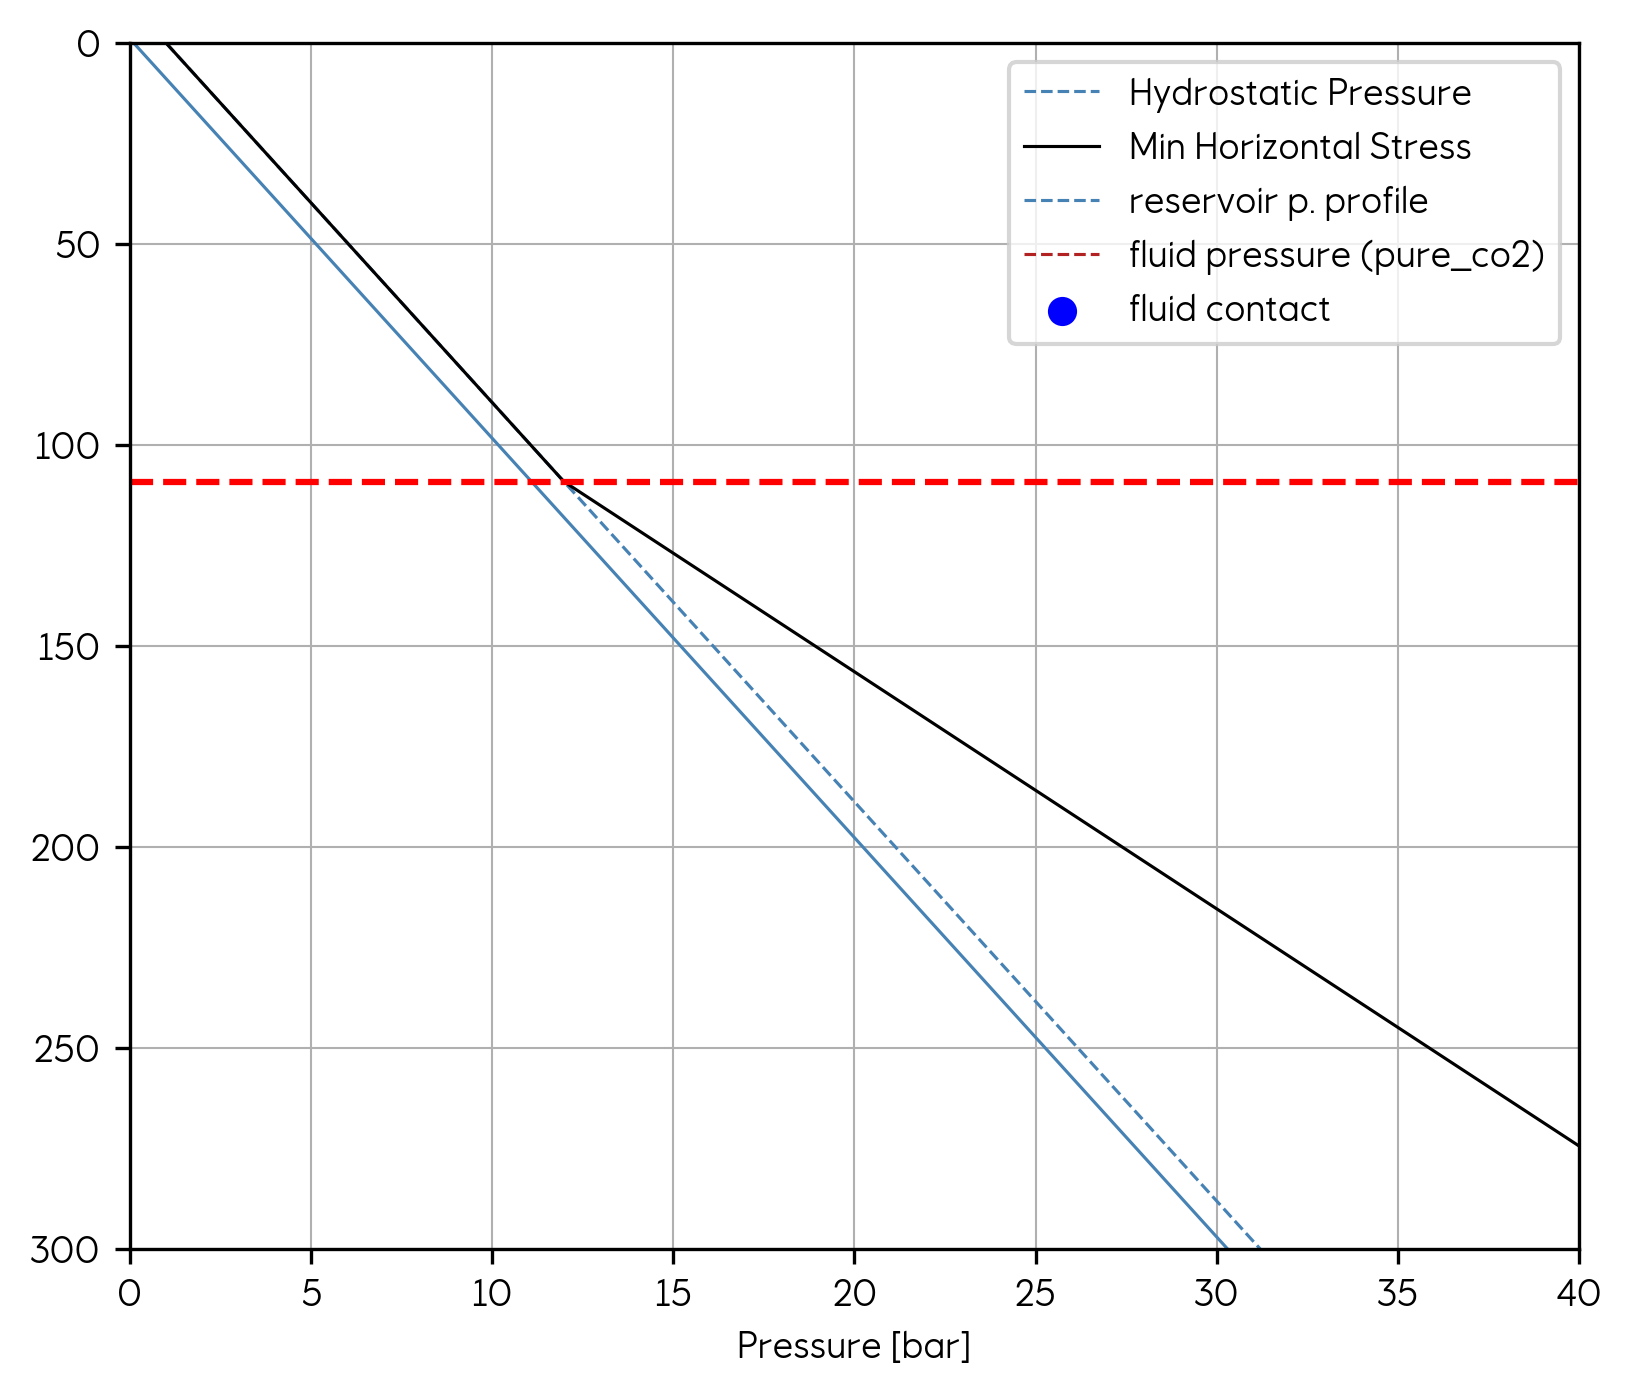

In [37]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

# ax.plot(my_pressure.init_curves['hydrostatic_pressure'], my_pressure.init_curves['depth'])
# ax.plot(my_pressure.init_curves['min_horizontal_stress'], my_pressure.init_curves['depth'], c='k')


ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')
ax.axhline(y=my_pressure.sf_depth_msl, color='red', linestyle='--', label='Fluid contact + 500 m')


# ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
ax.set_ylim(bottom=300)
ax.set_ylim(top=0)
ax.set_xlim(left=0)
ax.set_xlim(right=40)

# ax.invert_yaxis()  # Invert y-axis to have depth increasing downwards
fig.tight_layout()

In [39]:
z_shmin_test = np.array([1118.29546, 1119.03447, 1119.77361, 1120.5125 , 1121.25151,
       1121.99053, 1122.72954, 1123.46843, 1124.22283, 1125.33599,
       1126.44817, 1127.56133, 1128.67461, 1129.78667, 1130.89995,
       1132.01335, 1133.12542, 1134.24993, 1135.36321, 1136.47527])

shmin_test = np.array([2.06239873, 2.06505278, 2.06770945, 2.07036658, 2.07302585,
       2.07568674, 2.07834955, 2.08101361, 2.08373521, 2.08906597,
       2.09308826, 2.09711772, 2.1011516 , 2.10518483, 2.10922646,
       2.11327218, 2.11731714, 2.12141101, 2.12546816, 2.12952463])

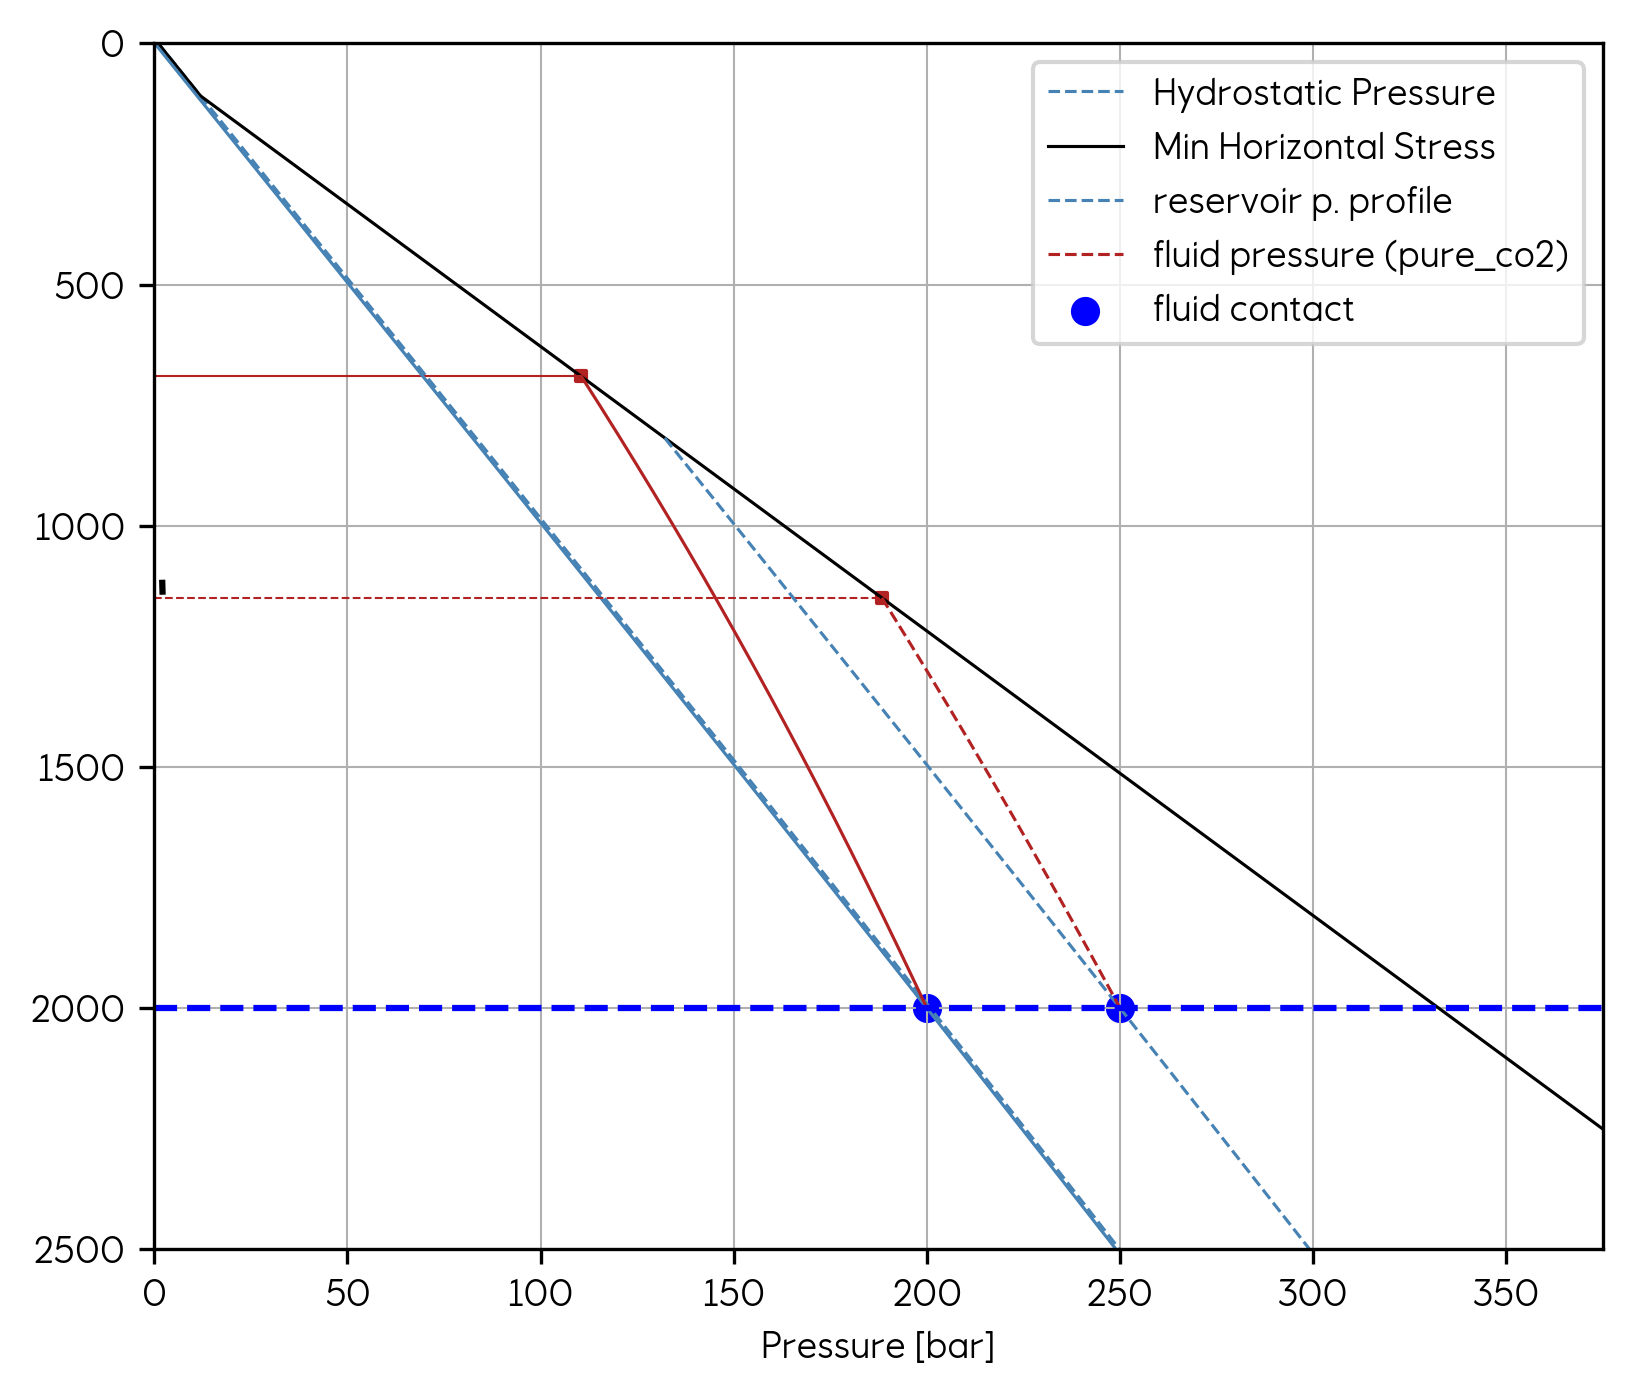

In [40]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.plot(shmin_test, z_shmin_test, c='k', label='Shmin test')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

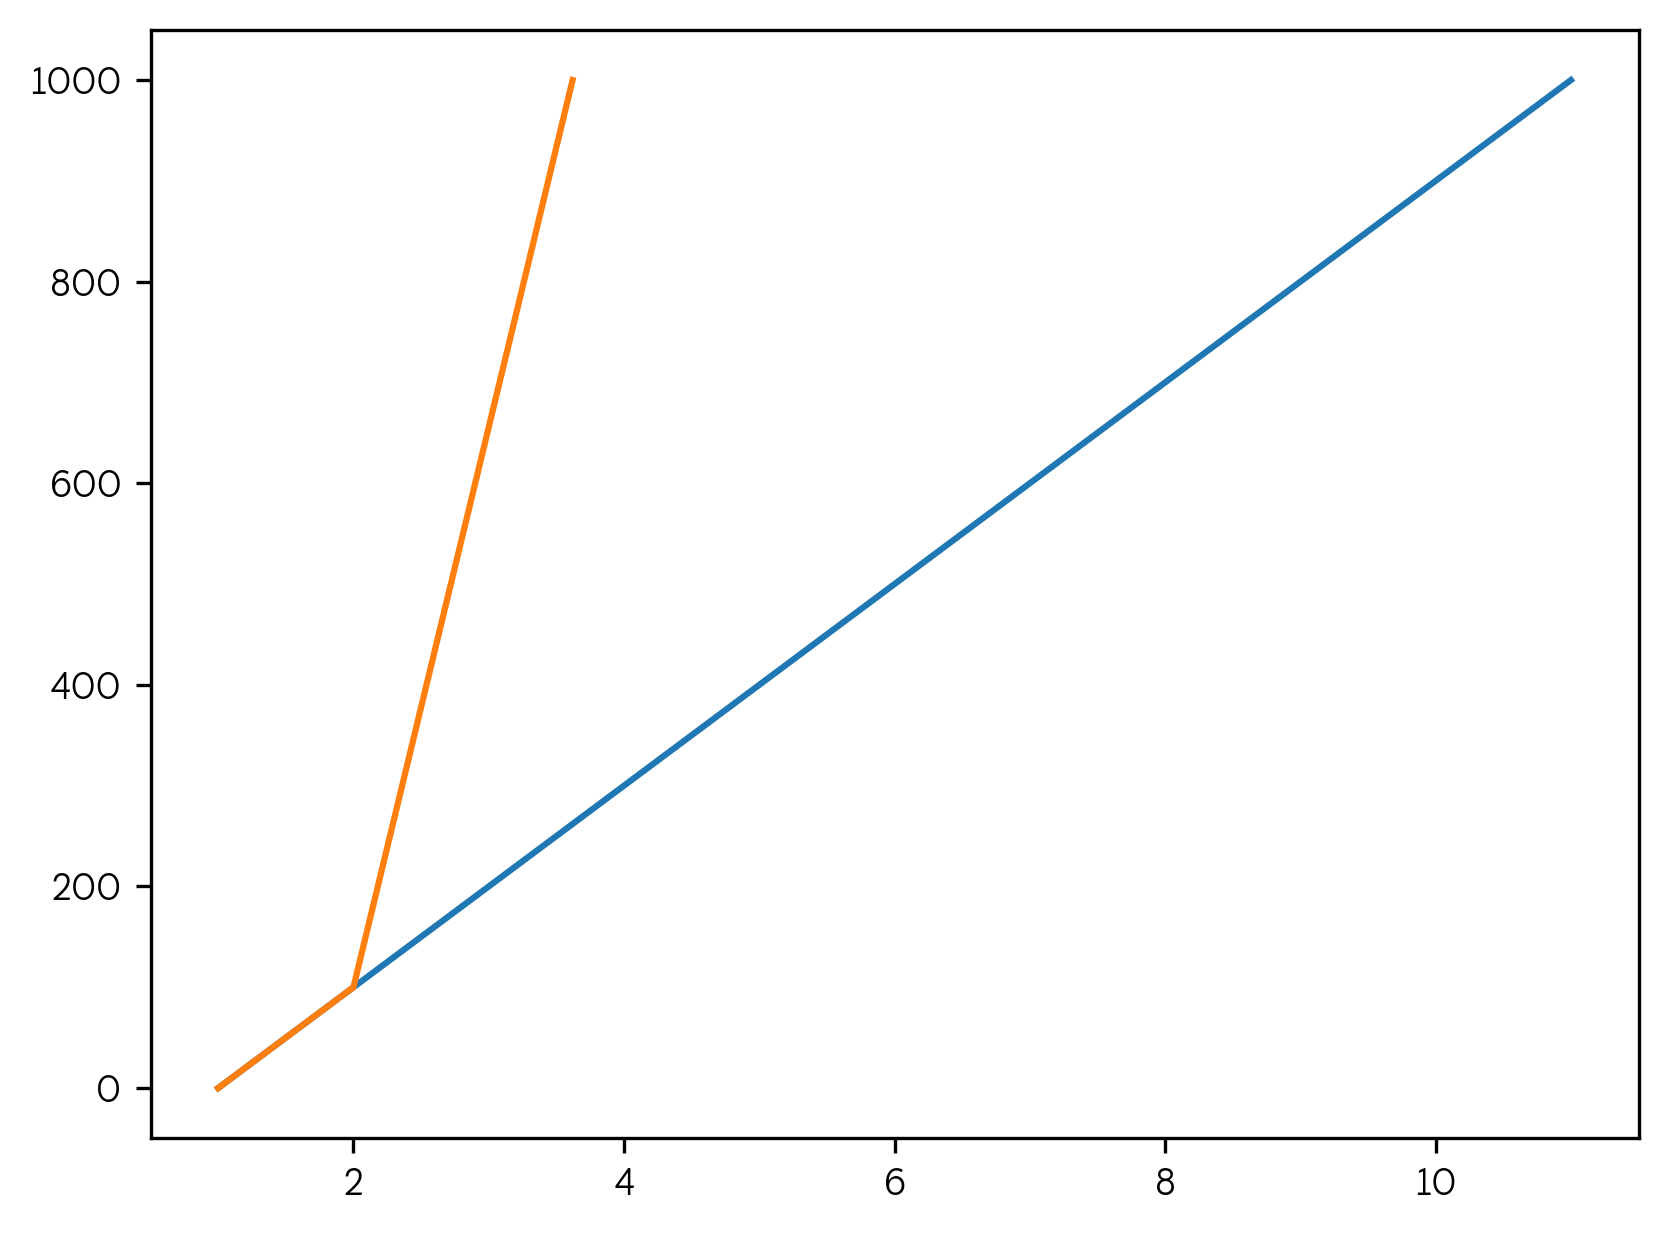

In [49]:
z = np.linspace(0, 1000, 1001)
p_hyd = 1+ 0.01 * z
p_hyd

wd = 100

p_ml = np.interp(wd, z, p_hyd)
z_ml = z - wd


shmin = p_ml + z_ml*0.0018

shmin[z < wd] = p_hyd[z < wd]

plt.plot(p_hyd, z, label='Hydrostatic pressure')
plt.plot(shmin, z, label='Shmin')

In [56]:
(shmin[z>wd] < p_hyd[z>wd]).sum() / len(shmin[z>wd])

np.float64(1.0)

In [30]:
my_pressure.scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_MSAD_brine  \
0  hydrostatic         True   690.509379  110.547154           NaN   
1            1         True  1656.111686  274.216745    817.658898   

   p_MSAD_brine  z_resrv  p_resrv  z_fluid_contact  p_fluid_contact  \
0           NaN     2000      200             2000              200   
1    132.098998     2000      250             2000              250   

     p_delta fluid_type fluid_composition specific_gravity  
0  -0.900701   pure_co2          100% CO2             None  
1  50.000000   pure_co2          100% CO2             None

### Using SG

In [229]:
field_fluid_type = 0.1

field_pressure_value = 500
field_depth_value = 3500

In [230]:
my_pressure = Pressure(sf_depth_msl=109,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=6648,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=None, 
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= field_depth_value, # depth value coming from WINC UI
                       p_fluid_contact= field_pressure_value, # pressure value coming from WINC UI
                       specific_gravity=0.05, # specific gravity of the fluid from WINC UI
                       ) 

{'from_resrvr': True}
Computing pressure profile for scenario: base_case None
None
fluid is None
z_fluid_contact: Input value used.
p_fluid_contact: Input value used.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
153.95455112116395


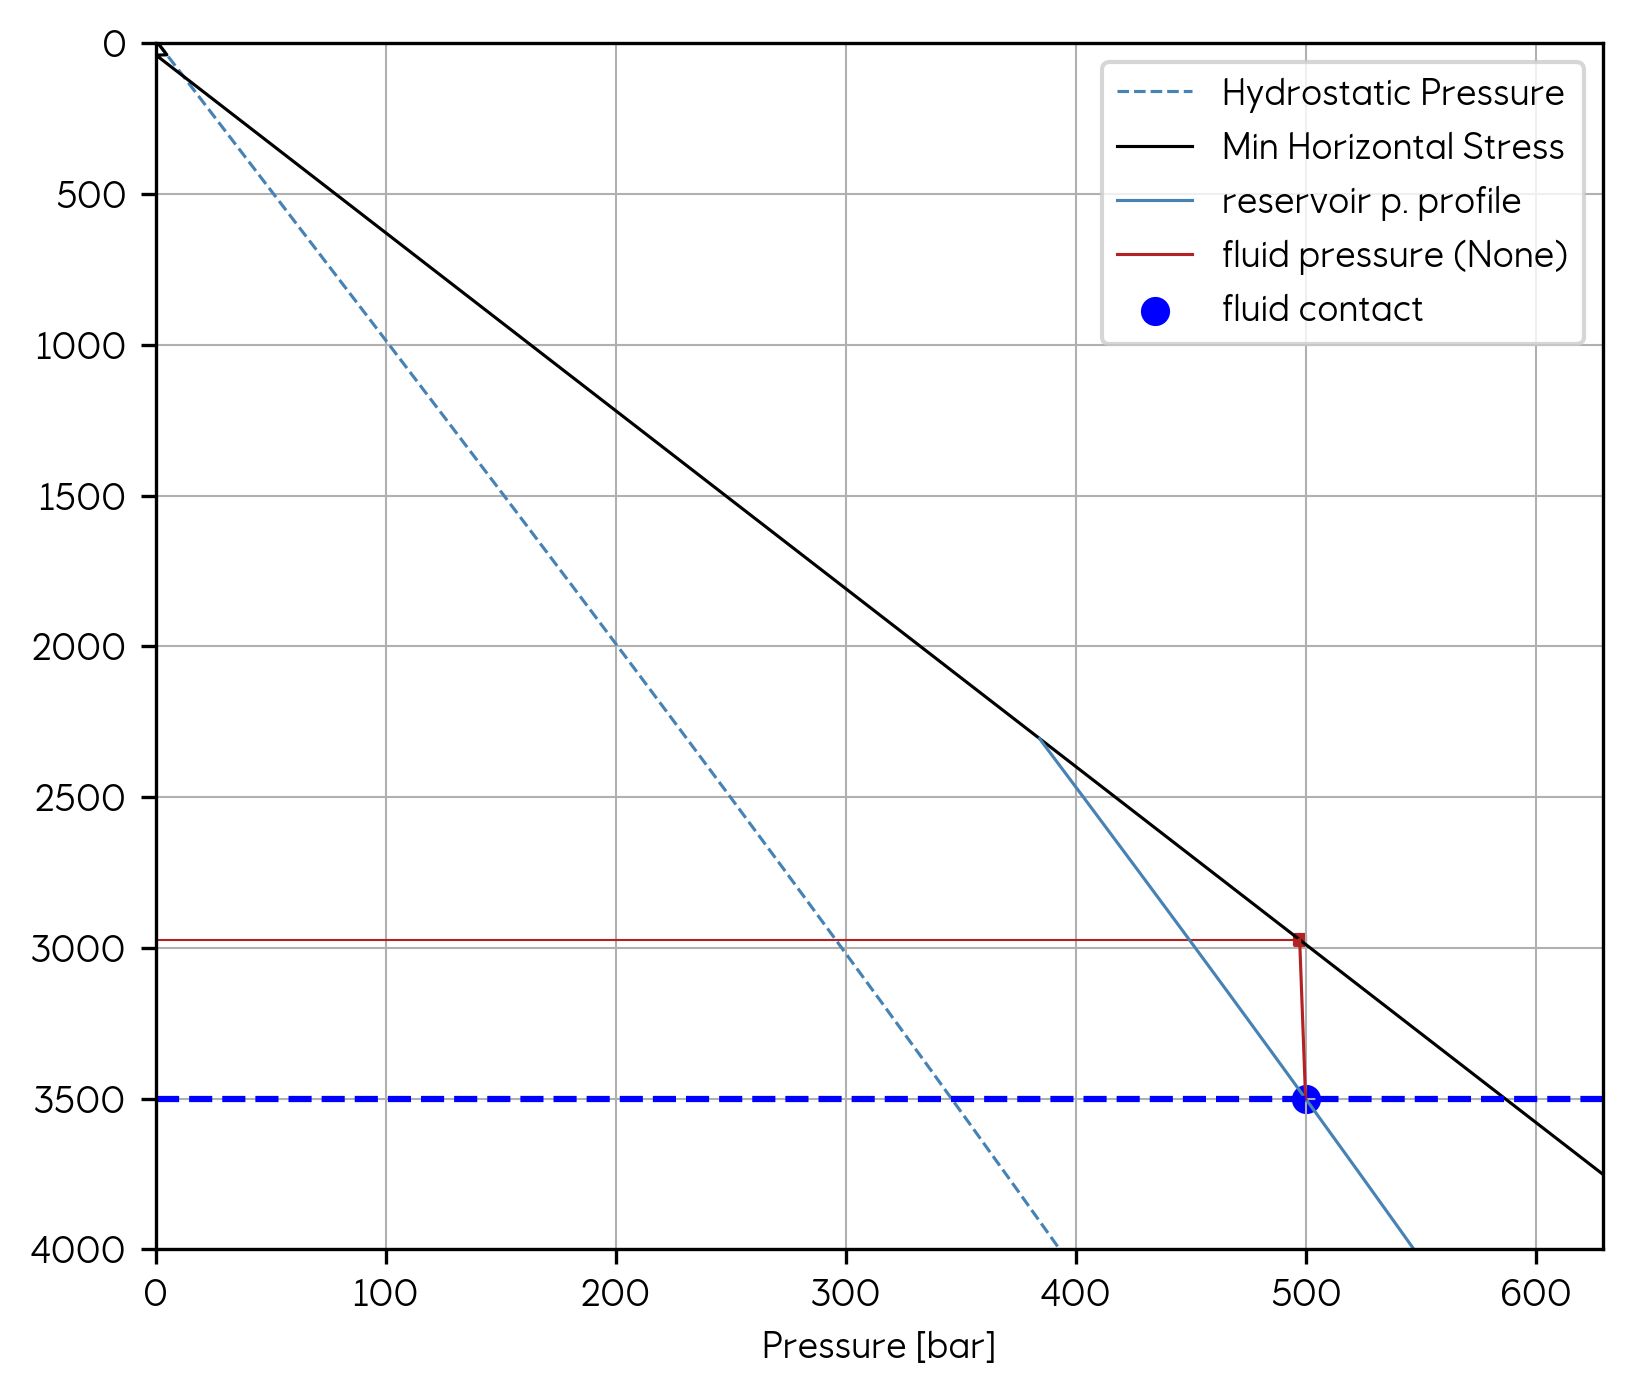

In [231]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

### In Well Builder > Add Data Window

In [22]:
field_fluid_type = 'pure_co2'
field_pressure_value = 500
field_depth_value = 3500

reservoir_pressure_values = [-25, 25, 50]

In [45]:
my_pressure = Pressure(sf_depth_msl=109,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=6648,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=field_fluid_type,  # fluid type name, should match the filename in the pvt_constants folder
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= field_depth_value, # depth value coming from WINC UI
                       p_fluid_contact= field_pressure_value # pressure value coming from WINC UI
                       ) 

Computing pressure profile for scenario: base_case
z_fluid_contact: Input value used.
p_fluid_contact: Input value used.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
153.95455112116395


In [46]:
for idx, dp_value in enumerate(reservoir_pressure_values):
    print(dp_value)

    my_pressure.add_scenario(f'my_sc{1+idx:.0f}', p_delta=dp_value, z_fluid_contact= my_pressure.z_fluid_contact,   from_resrvr = True)

-25
Computing pressure profile for scenario: my_sc1
z_fluid_contact: Input value used.
p_fluid_contact: Input value 500.0 overriden by 321.04544887883605.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
-25
25
Computing pressure profile for scenario: my_sc2
z_fluid_contact: Input value used.
p_fluid_contact: Input value 500.0 overriden by 371.04544887883605.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
25
50
Computing pressure profile for scenario: my_sc3
z_fluid_contact: Input value used.
p_fluid_contact: Input value 500.0 overriden by 396.04544887883605.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
50


In [47]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None
1     my_sc1         True  ...           100% CO2              None
2     my_sc2         True  ...           100% CO2              None
3     my_sc3         True  ...           100% CO2              None

[4 rows x 14 columns]

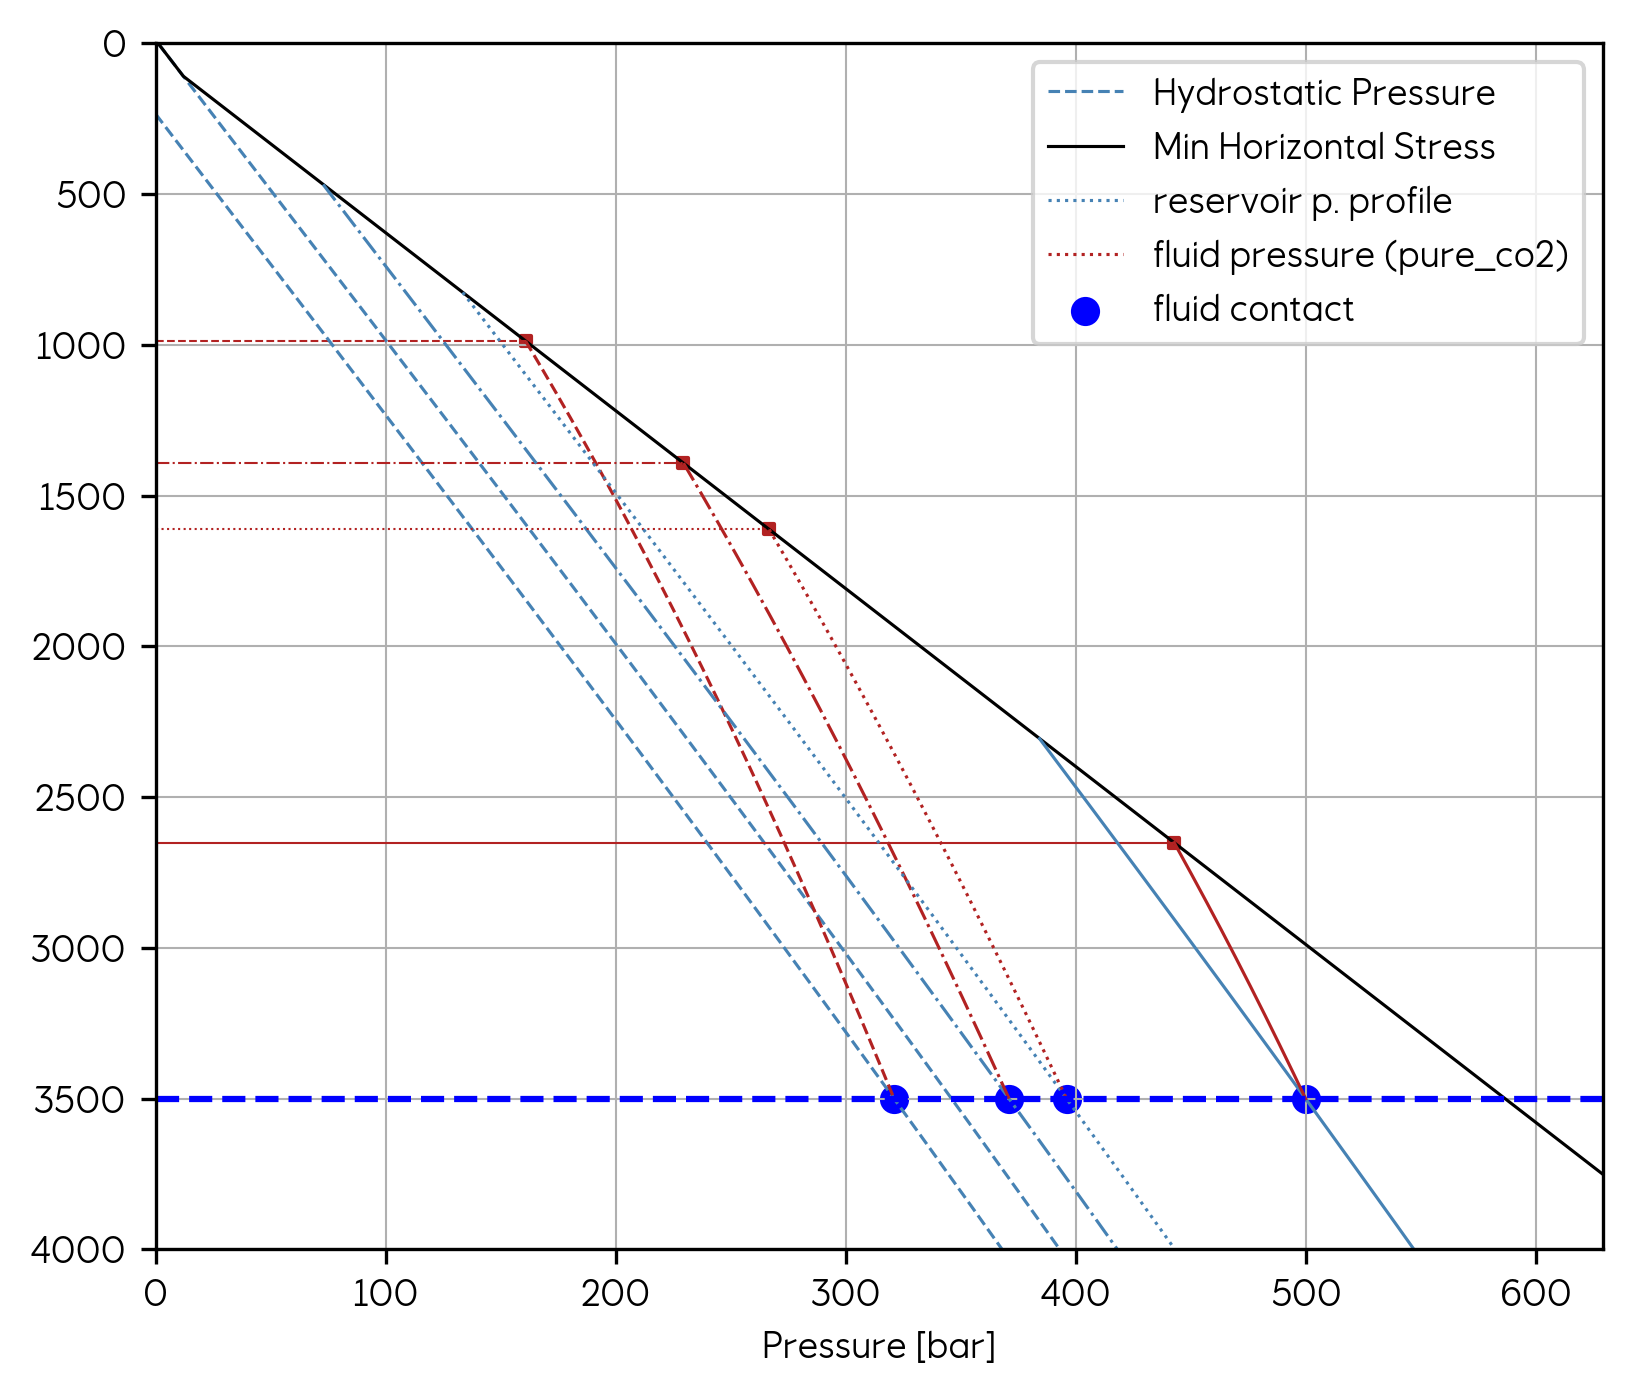

In [48]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

## Retrieving data for plotting

1. Retrieving control points

In [49]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None
1     my_sc1         True  ...           100% CO2              None
2     my_sc2         True  ...           100% CO2              None
3     my_sc3         True  ...           100% CO2              None

[4 rows x 14 columns]

2. Retrieving curves for my_sc2

In [50]:
sc_name = 'my_sc2'

my_pressure.scenario_manager.scenarios[sc_name].init_curves

depth  temperature  ...  fluid_pressure  brine_pressure
0.0        0.0         4.00  ...             NaN             NaN
1.0        1.0         4.00  ...             NaN             NaN
2.0        2.0         4.00  ...             NaN             NaN
3.0        3.0         4.00  ...             NaN             NaN
4.0        4.0         4.00  ...             NaN             NaN
...        ...          ...  ...             ...             ...
7080.0  7080.0       282.84  ...             NaN      686.650419
7081.0  7081.0       282.88  ...             NaN      686.730173
7082.0  7082.0       282.92  ...             NaN      686.809921
7083.0  7083.0       282.96  ...             NaN      686.889663
7084.0  7084.0       283.00  ...             NaN      686.969400

[7086 rows x 6 columns]

## Example 1: Minimum input (only fluid contact)

In [236]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3500.)

{'from_resrvr': True}
Computing pressure profile for scenario: base_case pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
0.0


In [237]:
my_pressure.scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None

[1 rows x 14 columns]

In [238]:
my_pressure.add_scenario('methane', fluid_type='methane', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact)
my_pressure.add_scenario('other', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact, p_delta=50, specific_gravity=0.05)

{'fluid_type': 'methane', 'from_resrvr': True, 'z_fluid_contact': 3500.0}
Computing pressure profile for scenario: methane methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
0.0
{'from_resrvr': True, 'z_fluid_contact': 3500.0, 'p_delta': 50, 'specific_gravity': 0.05}
Computing pressure profile for scenario: other None
None
fluid is None
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
50


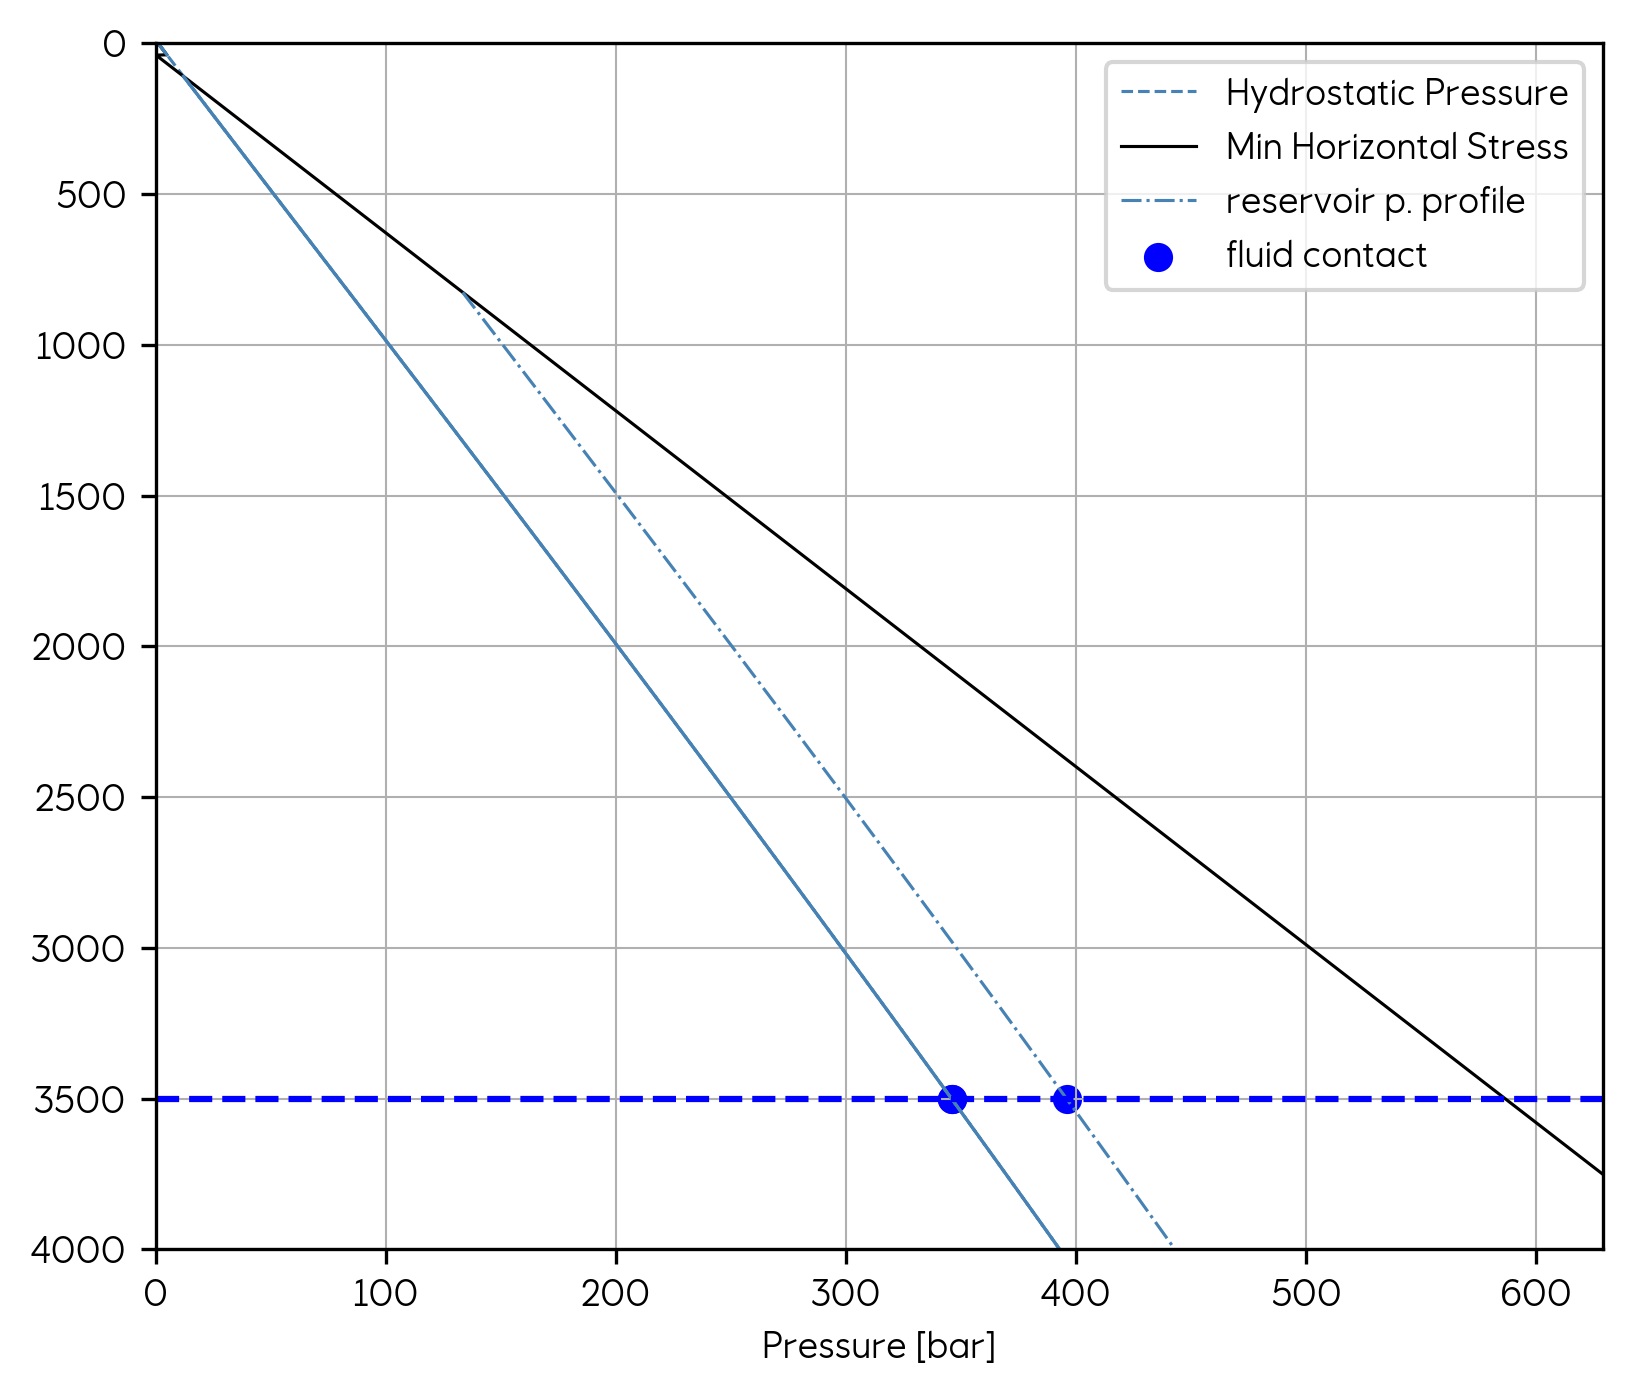

In [239]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

In [81]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None
1    methane         True  ...           100% CH4              None

[2 rows x 14 columns]

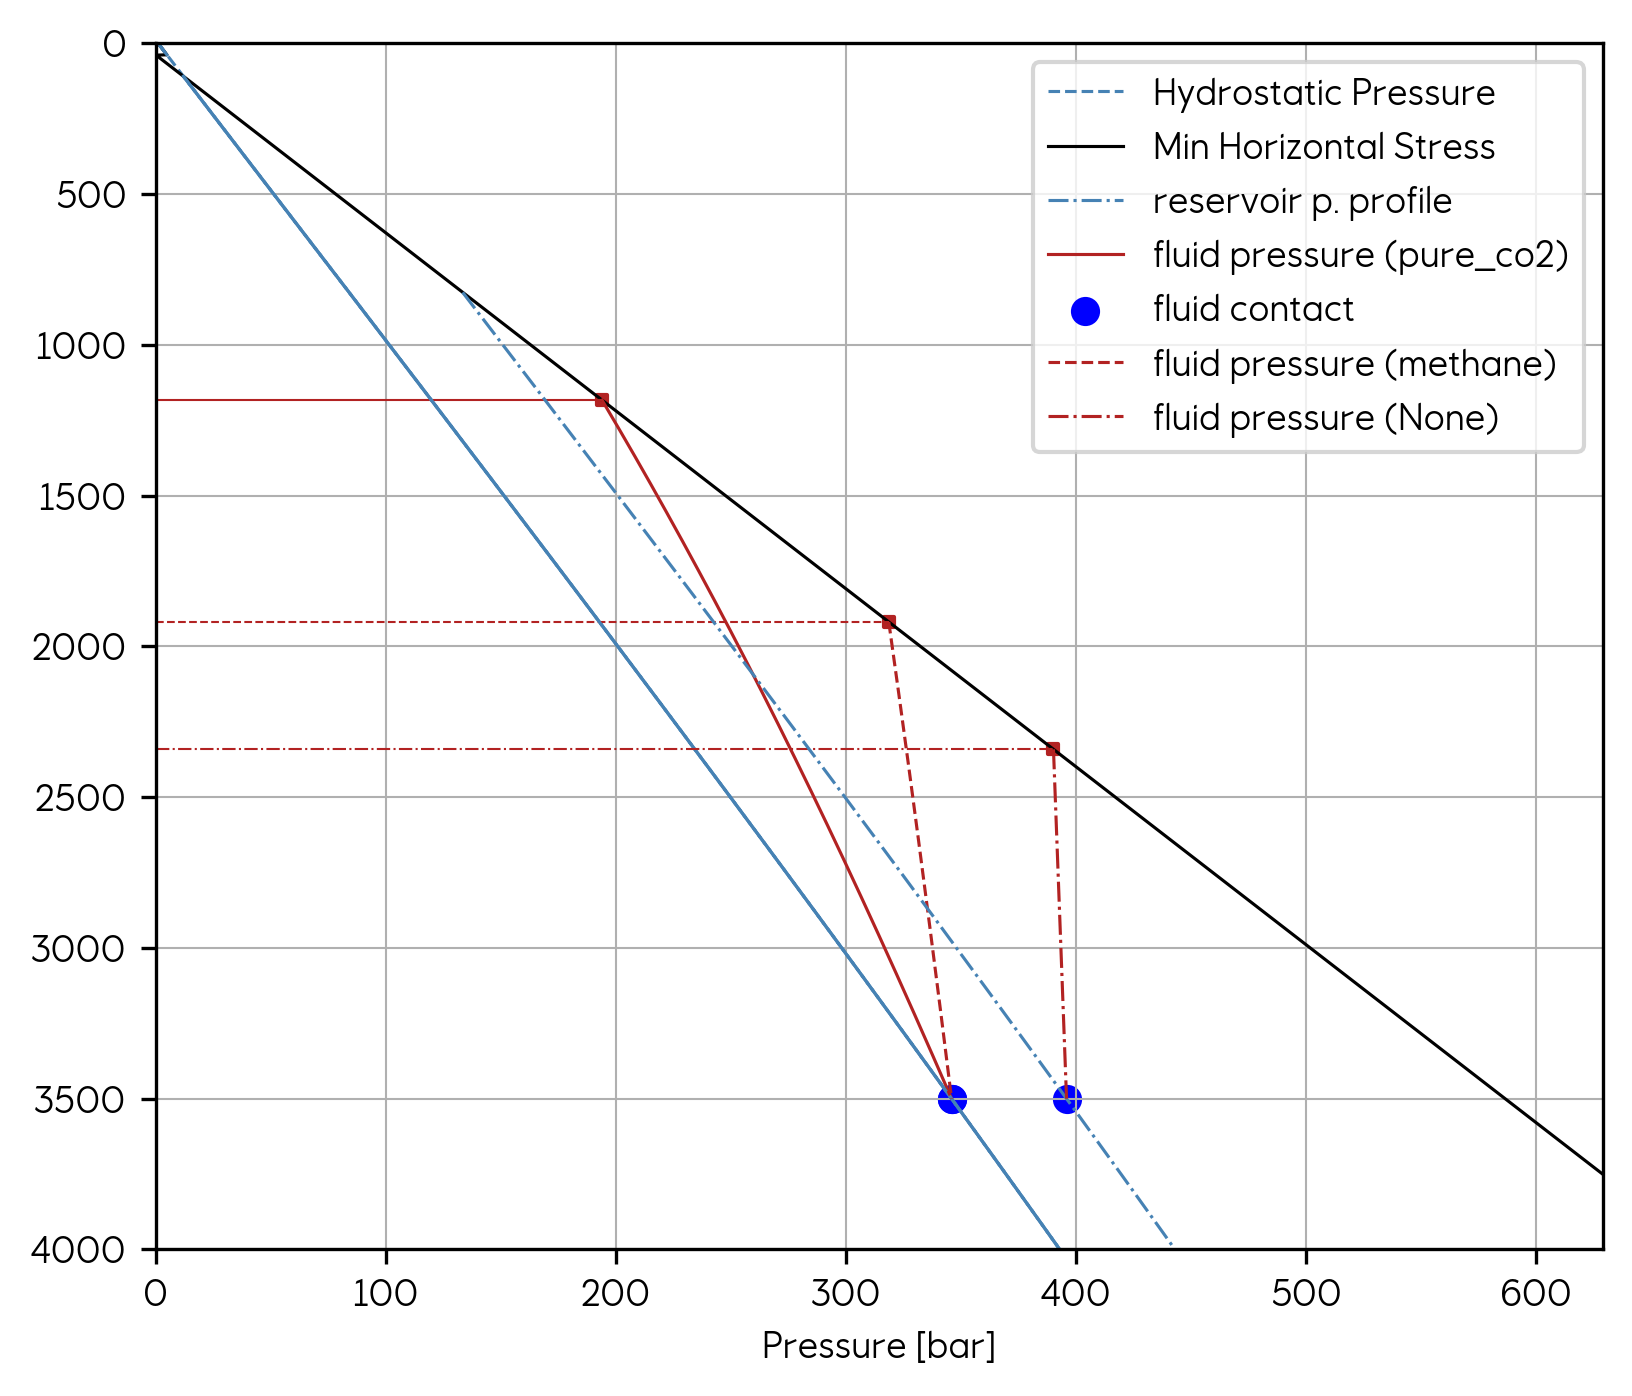

In [240]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)

fig.tight_layout()


## Example 2: Fluid contact + Delta P

In [83]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3700.)

{'from_resrvr': True}
Computing pressure profile for scenario: base_case pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
0.0


In [84]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact=3500, p_delta=50)

{'fluid_type': 'pure_co2', 'from_resrvr': True, 'z_fluid_contact': 3500, 'p_delta': 50}
Computing pressure profile for scenario: pure_co2 pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
50


In [85]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None
1   pure_co2         True  ...           100% CO2              None

[2 rows x 14 columns]

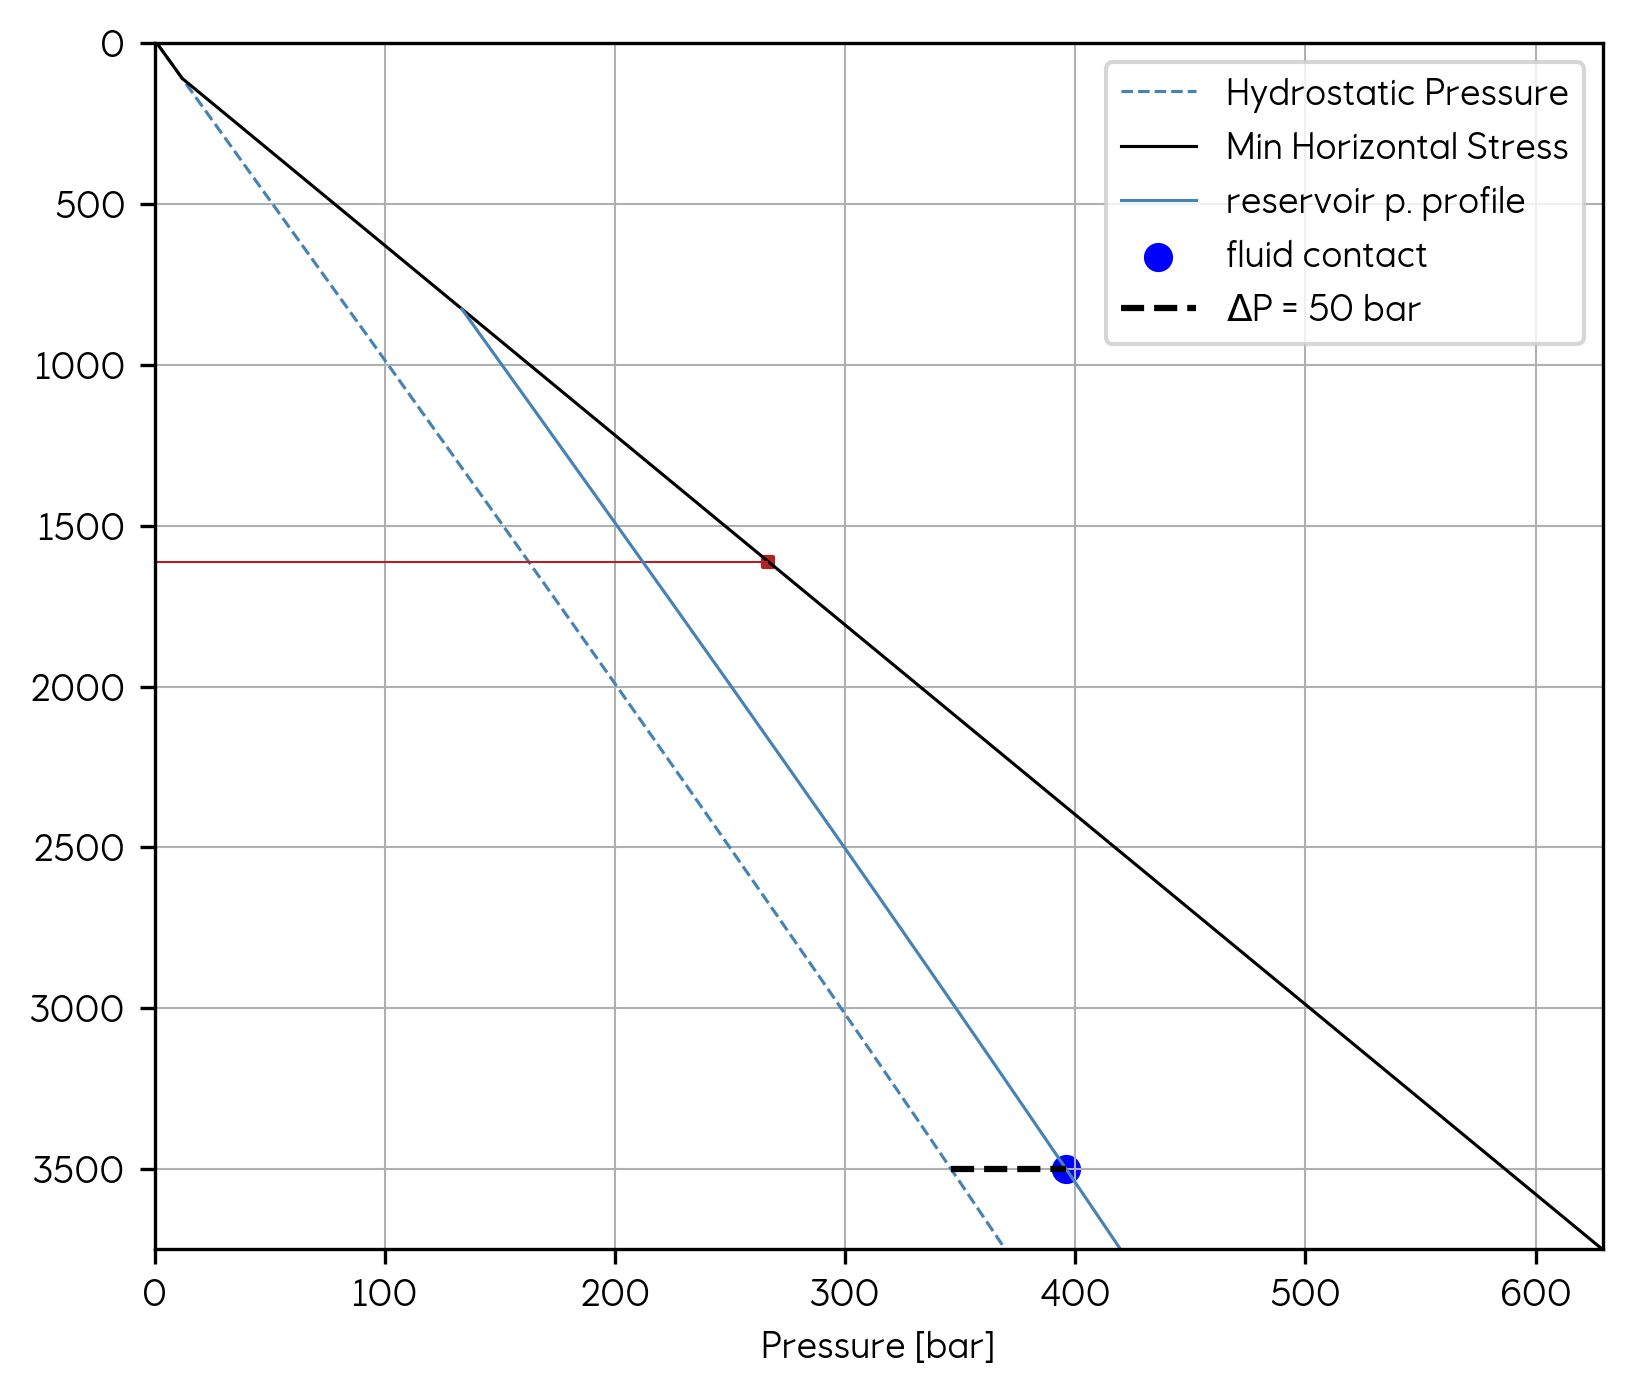

In [86]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,
              plot_selected_scenarios=['pure_co2'])



fig.tight_layout()


## Example 3: Reservoir Pressure

In [87]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [88]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_resrv=3400, p_resrv=380)  

{'fluid_type': 'pure_co2', 'from_resrvr': True, 'z_resrv': 3400, 'p_resrv': 380}
Computing pressure profile for scenario: pure_co2 pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: value computed and updated.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: Input value used.
z_resrv: Input value used.
43.45339408276044


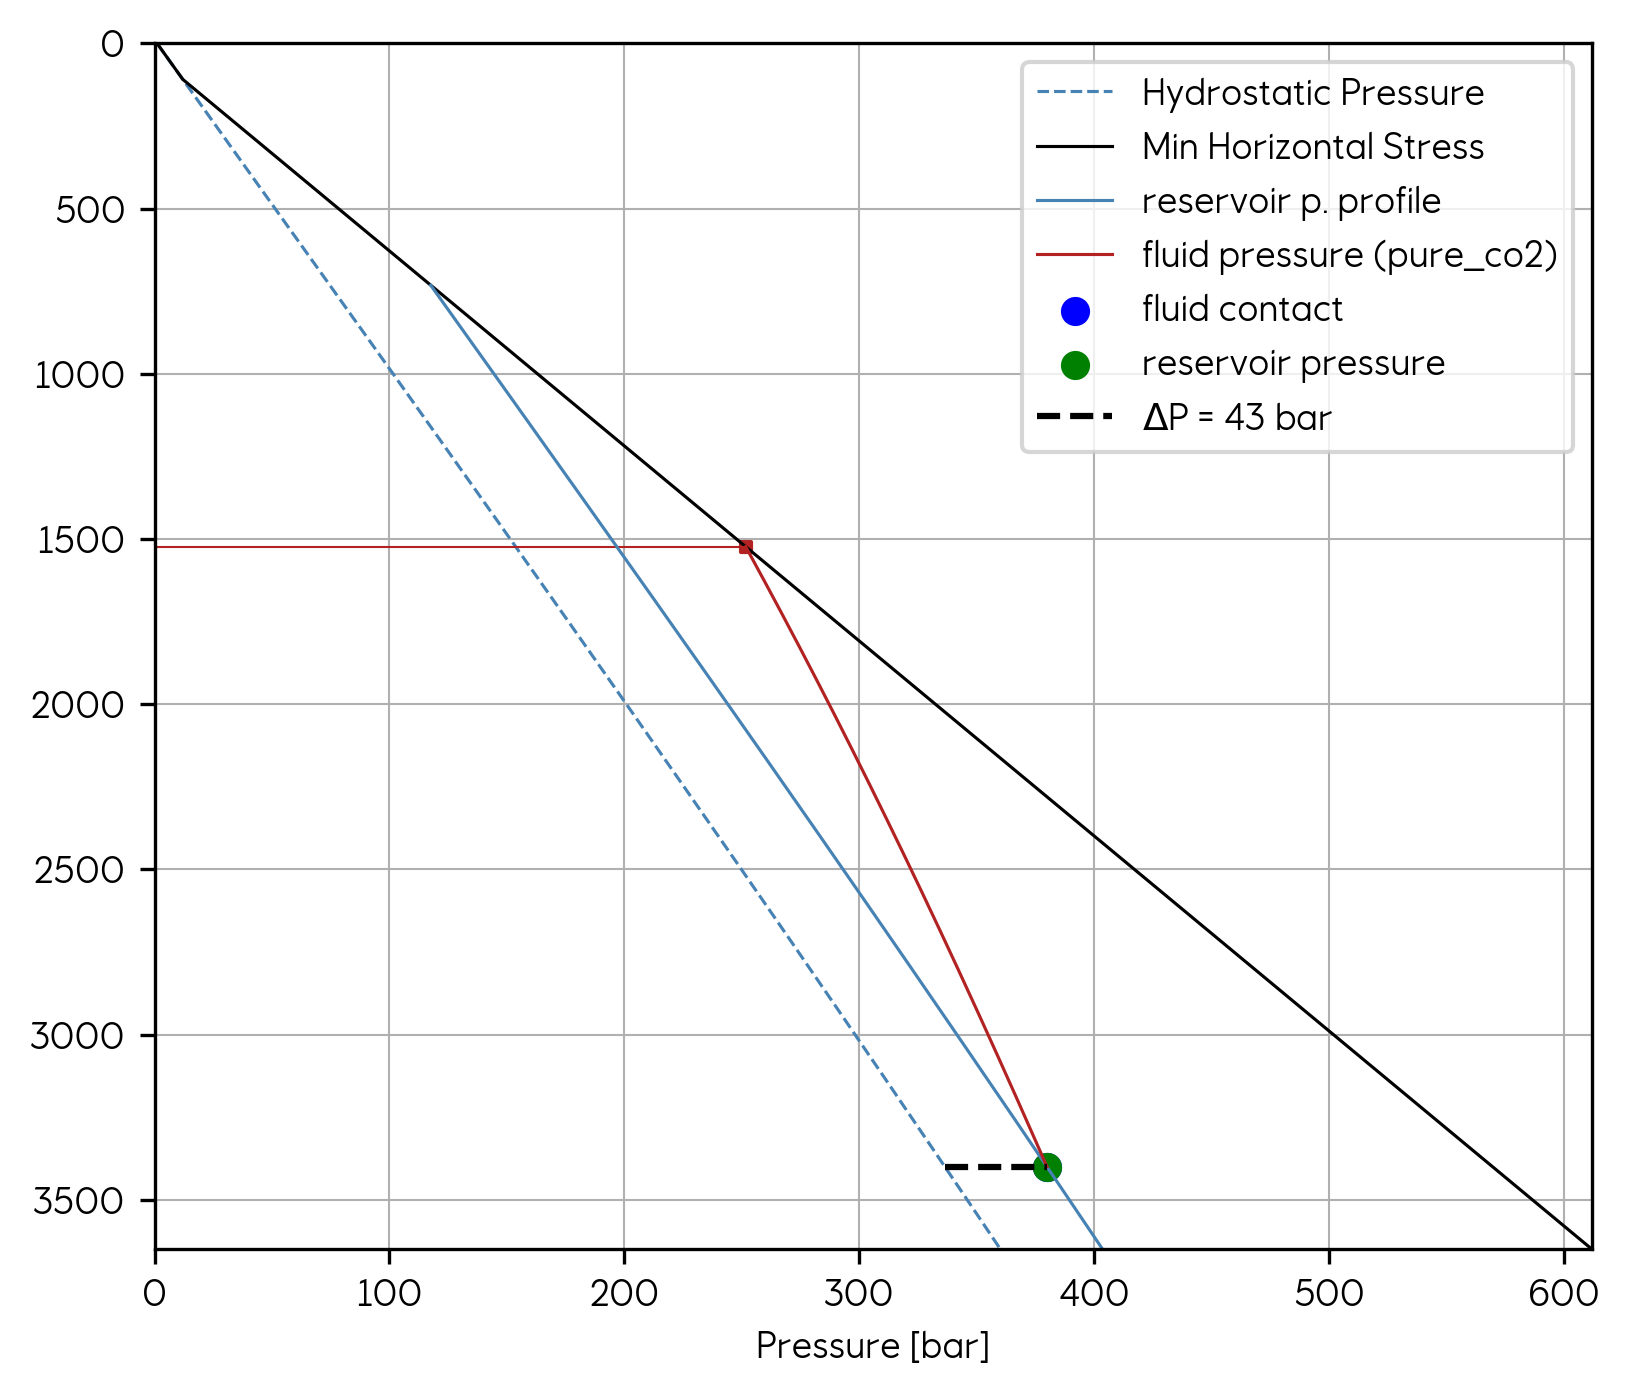

In [89]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)


fig.tight_layout()


## Example 4: Reservoir Pressure + fluid contact


In [90]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [91]:
my_pressure.add_scenario('C1', fluid_type='methane', from_resrvr=True, z_resrv=3100, p_resrv=320, z_fluid_contact=3700)  

{'fluid_type': 'methane', 'from_resrvr': True, 'z_resrv': 3100, 'p_resrv': 320, 'z_fluid_contact': 3700}
Computing pressure profile for scenario: C1 methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: Input value used.
z_resrv: Input value used.
-35.56346491226185


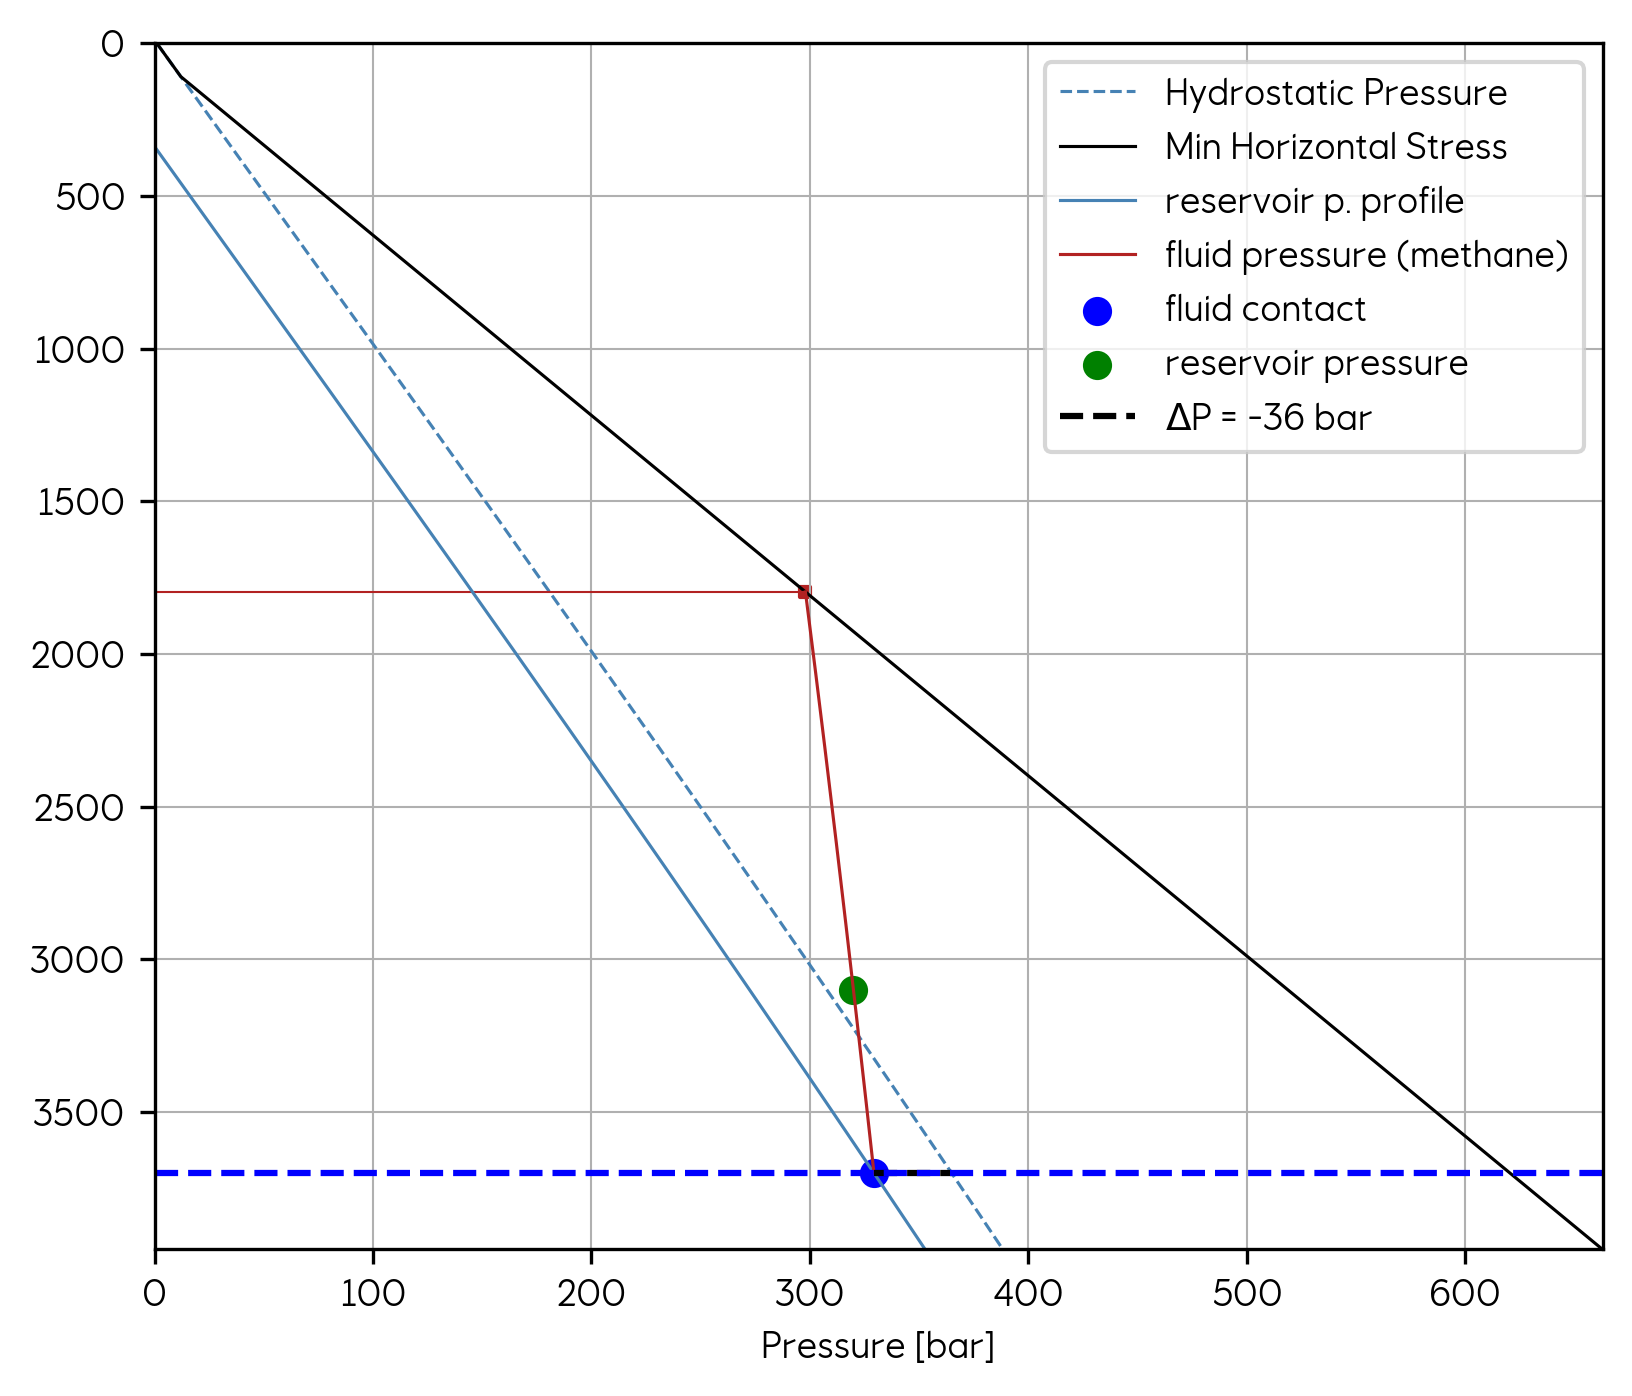

In [92]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 5: Multiple reservoirs


In [93]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [94]:
my_pressure.add_scenario('top r', fluid_type='methane', from_resrvr=True, z_resrv=3000, p_resrv=310, z_fluid_contact=3200)  
my_pressure.add_scenario('bottom r', fluid_type='methane', from_resrvr=True, z_fluid_contact=3700, p_delta=50)  

{'fluid_type': 'methane', 'from_resrvr': True, 'z_resrv': 3000, 'p_resrv': 310, 'z_fluid_contact': 3200}
Computing pressure profile for scenario: top r methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: Input value used.
z_resrv: Input value used.
-4.33123023767223
{'fluid_type': 'methane', 'from_resrvr': True, 'z_fluid_contact': 3700, 'p_delta': 50}
Computing pressure profile for scenario: bottom r methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
50


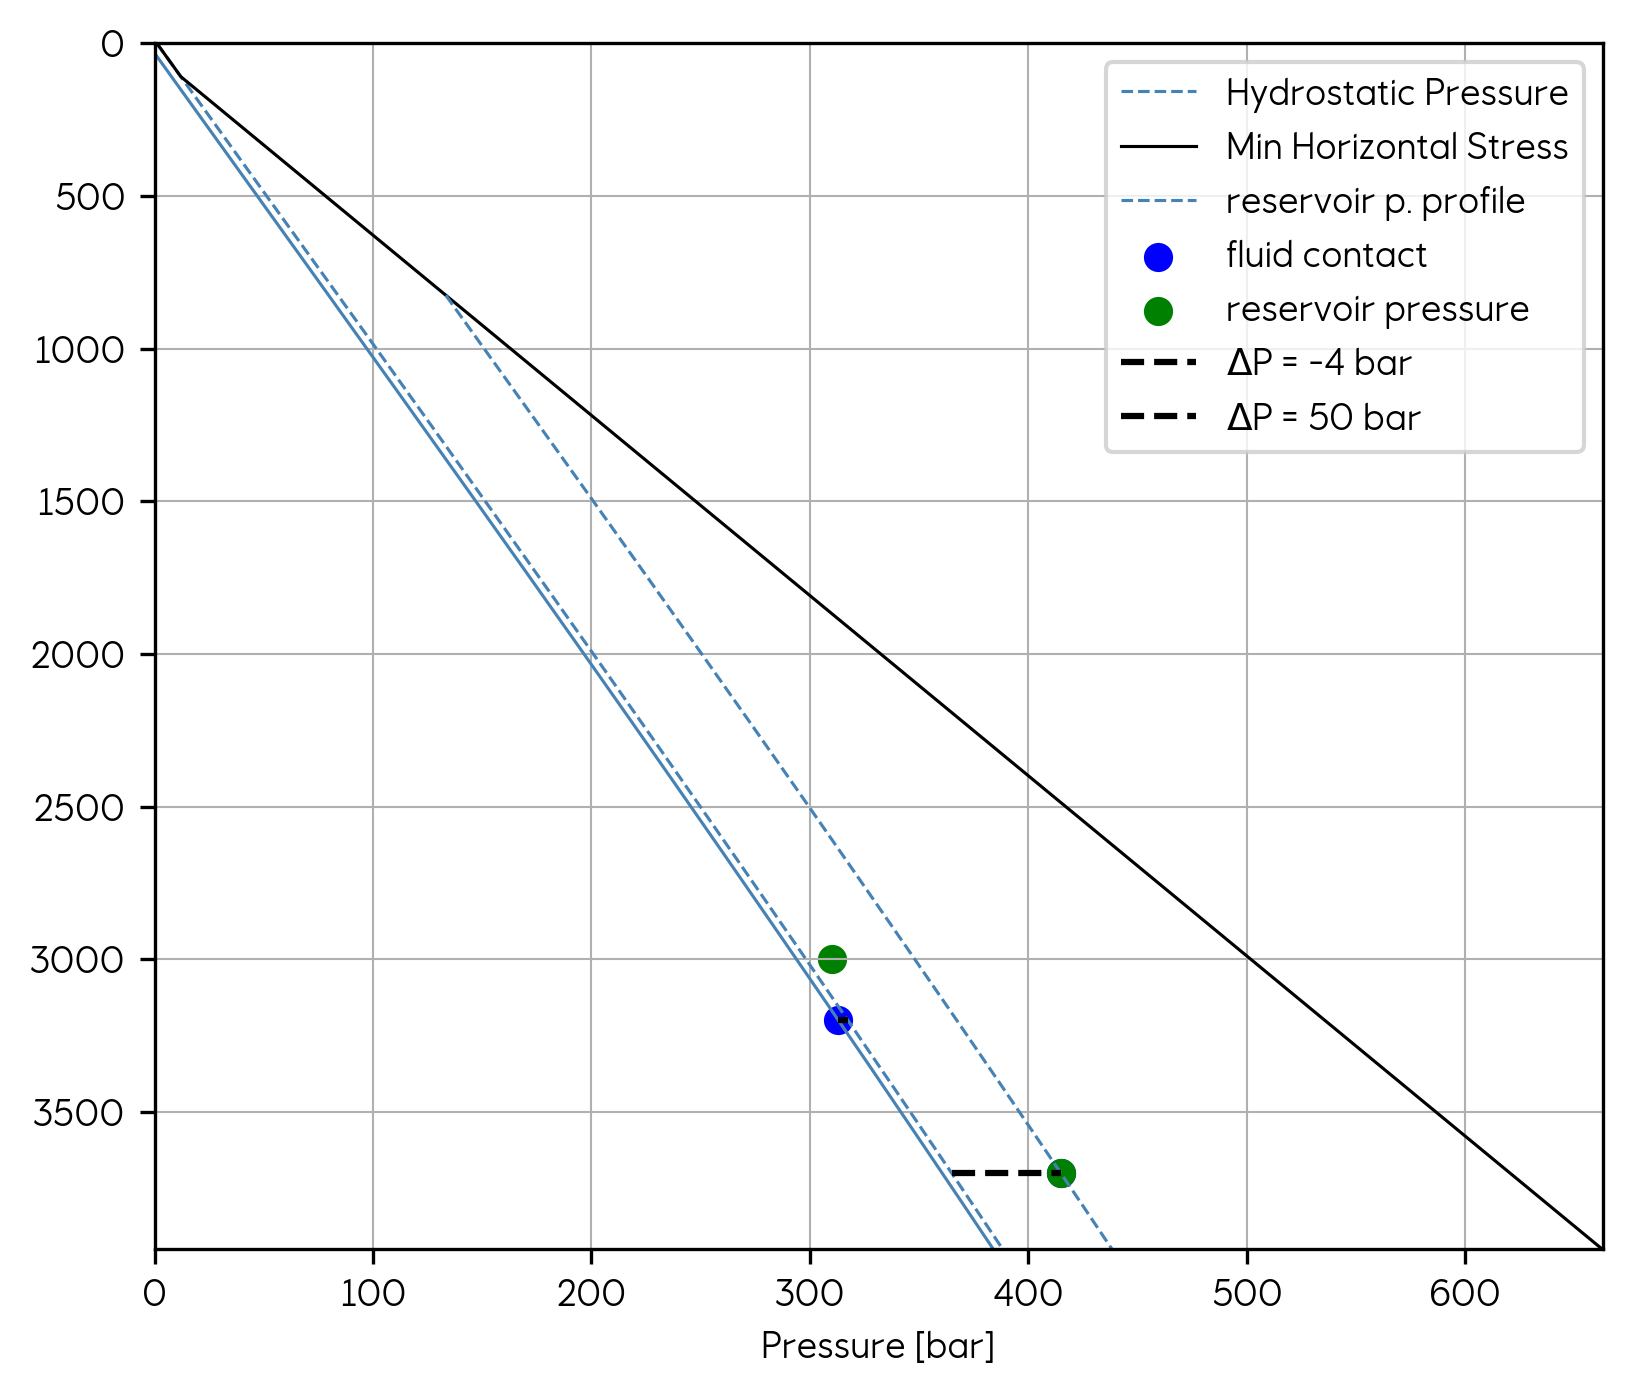

In [95]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)


fig.tight_layout()


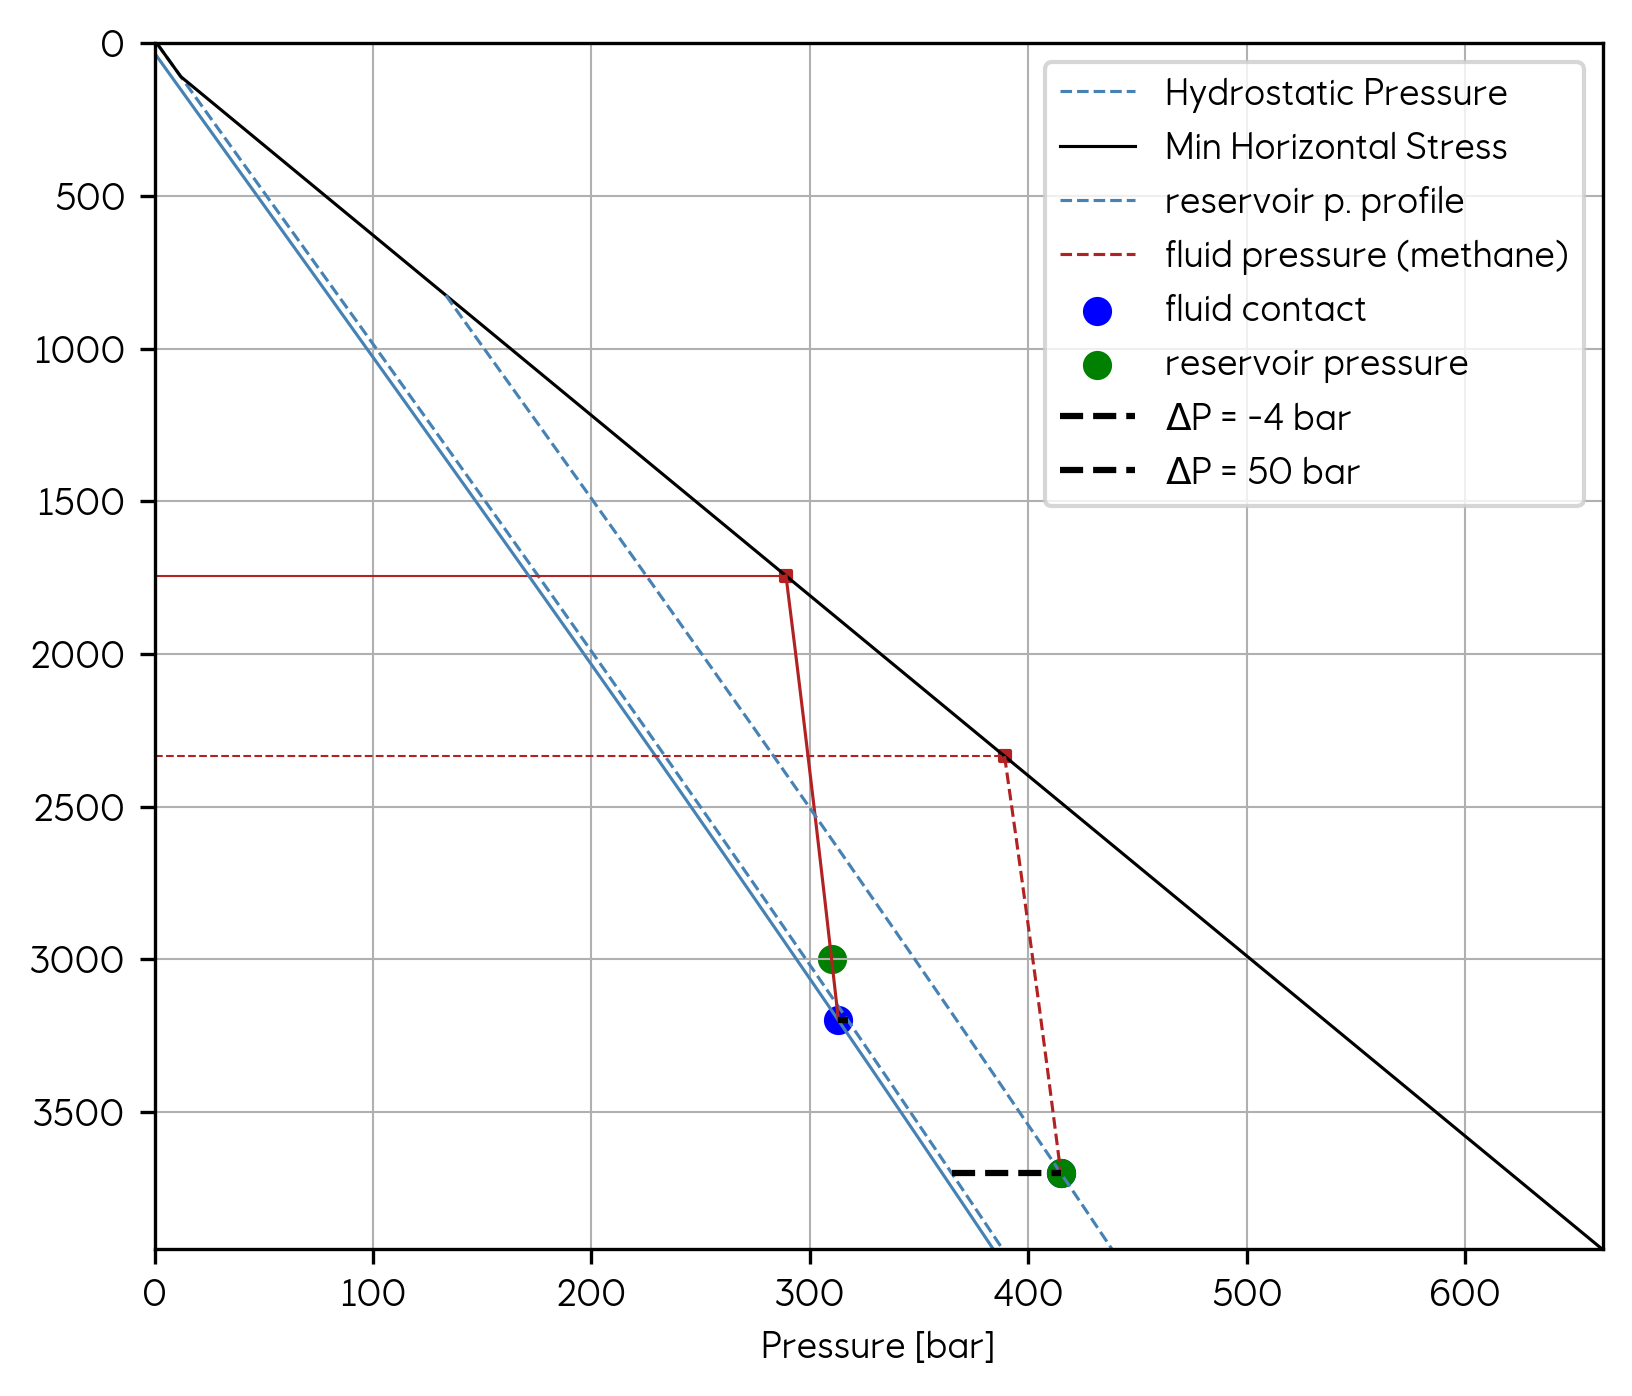

In [96]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 6: Compute pressure profile downwards from MSAD


In [97]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [98]:
my_pressure.add_scenario('Plug1', fluid_type='methane', from_resrvr=False,  z_MSAD=1800, z_fluid_contact=4000)    
my_pressure.add_scenario('Plug2', fluid_type='methane', from_resrvr=False,  z_MSAD=2500, z_fluid_contact=4000)  


{'fluid_type': 'methane', 'from_resrvr': False, 'z_MSAD': 1800, 'z_fluid_contact': 4000}
Computing pressure profile for scenario: Plug1 methane
fluid is methane
-58.55383178322944
{'fluid_type': 'methane', 'from_resrvr': False, 'z_MSAD': 2500, 'z_fluid_contact': 4000}
Computing pressure profile for scenario: Plug2 methane
fluid is methane
51.90562500651623


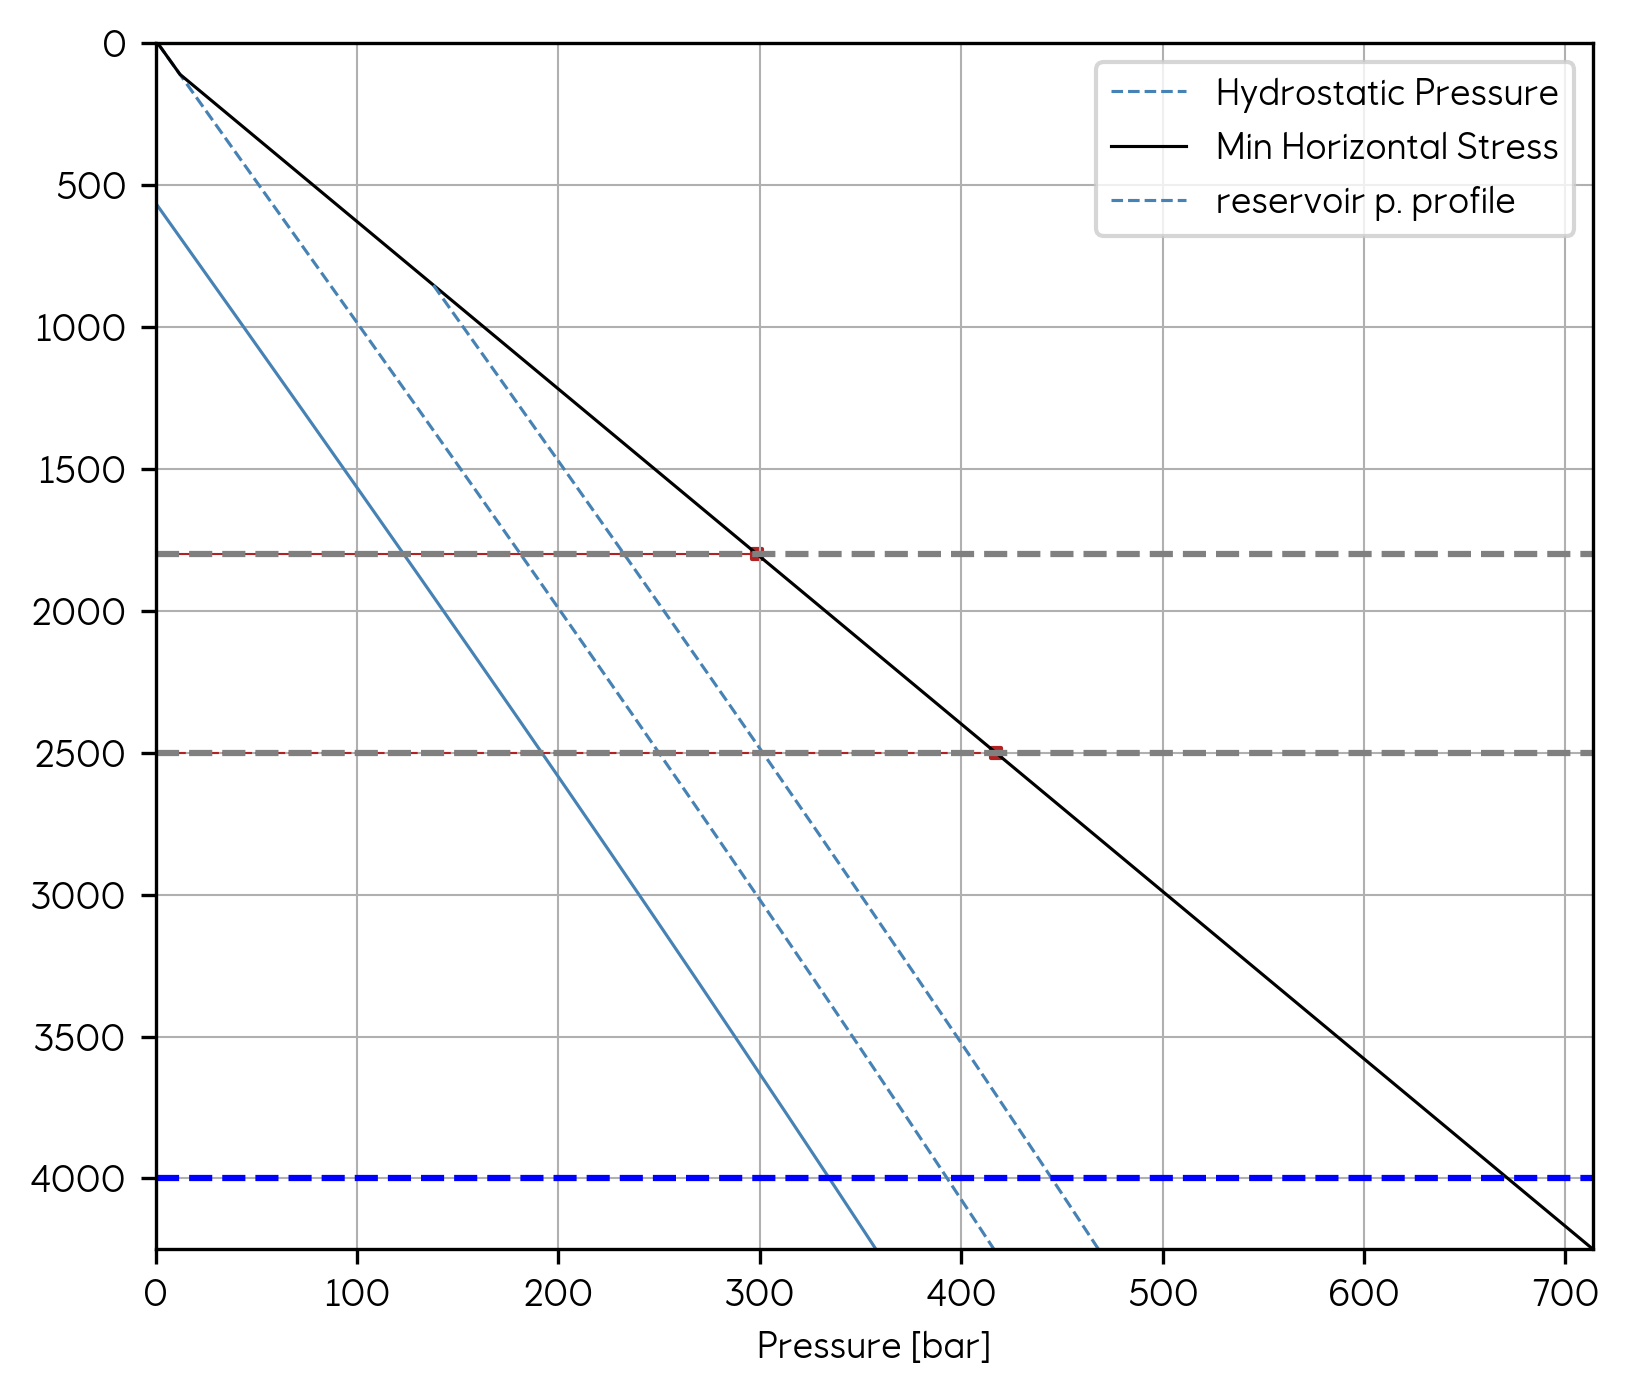

In [99]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False,)

ax.axhline(y=1800, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=2500, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=4000, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


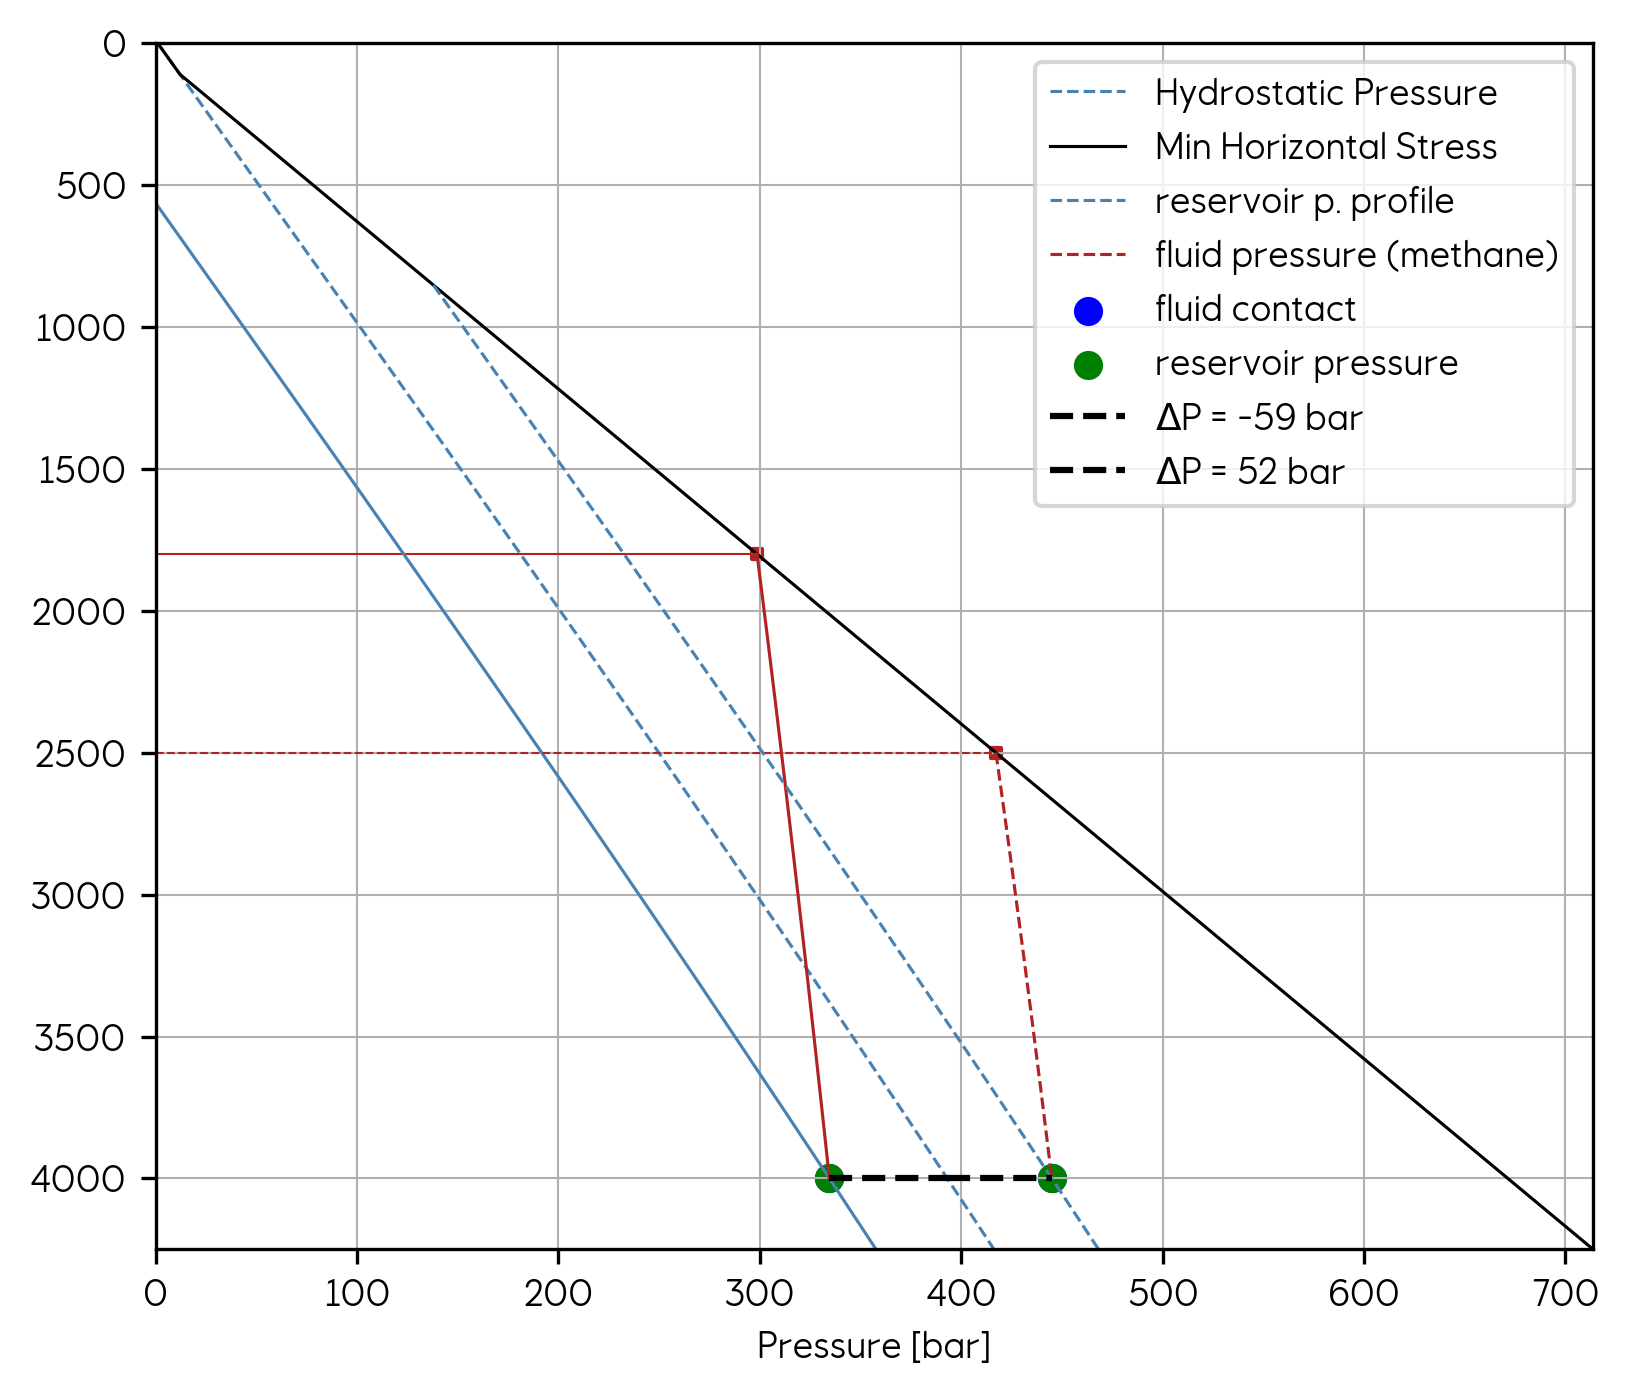

In [100]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 1: Minimum input (only fluid contact)

In [101]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3500.)

{'from_resrvr': True}
Computing pressure profile for scenario: base_case pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
0.0


In [103]:
my_pressure.scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None

[1 rows x 14 columns]

In [104]:
my_pressure.add_scenario('methane', fluid_type='methane', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact)

{'fluid_type': 'methane', 'from_resrvr': True, 'z_fluid_contact': 3500.0}
Computing pressure profile for scenario: methane methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
0.0


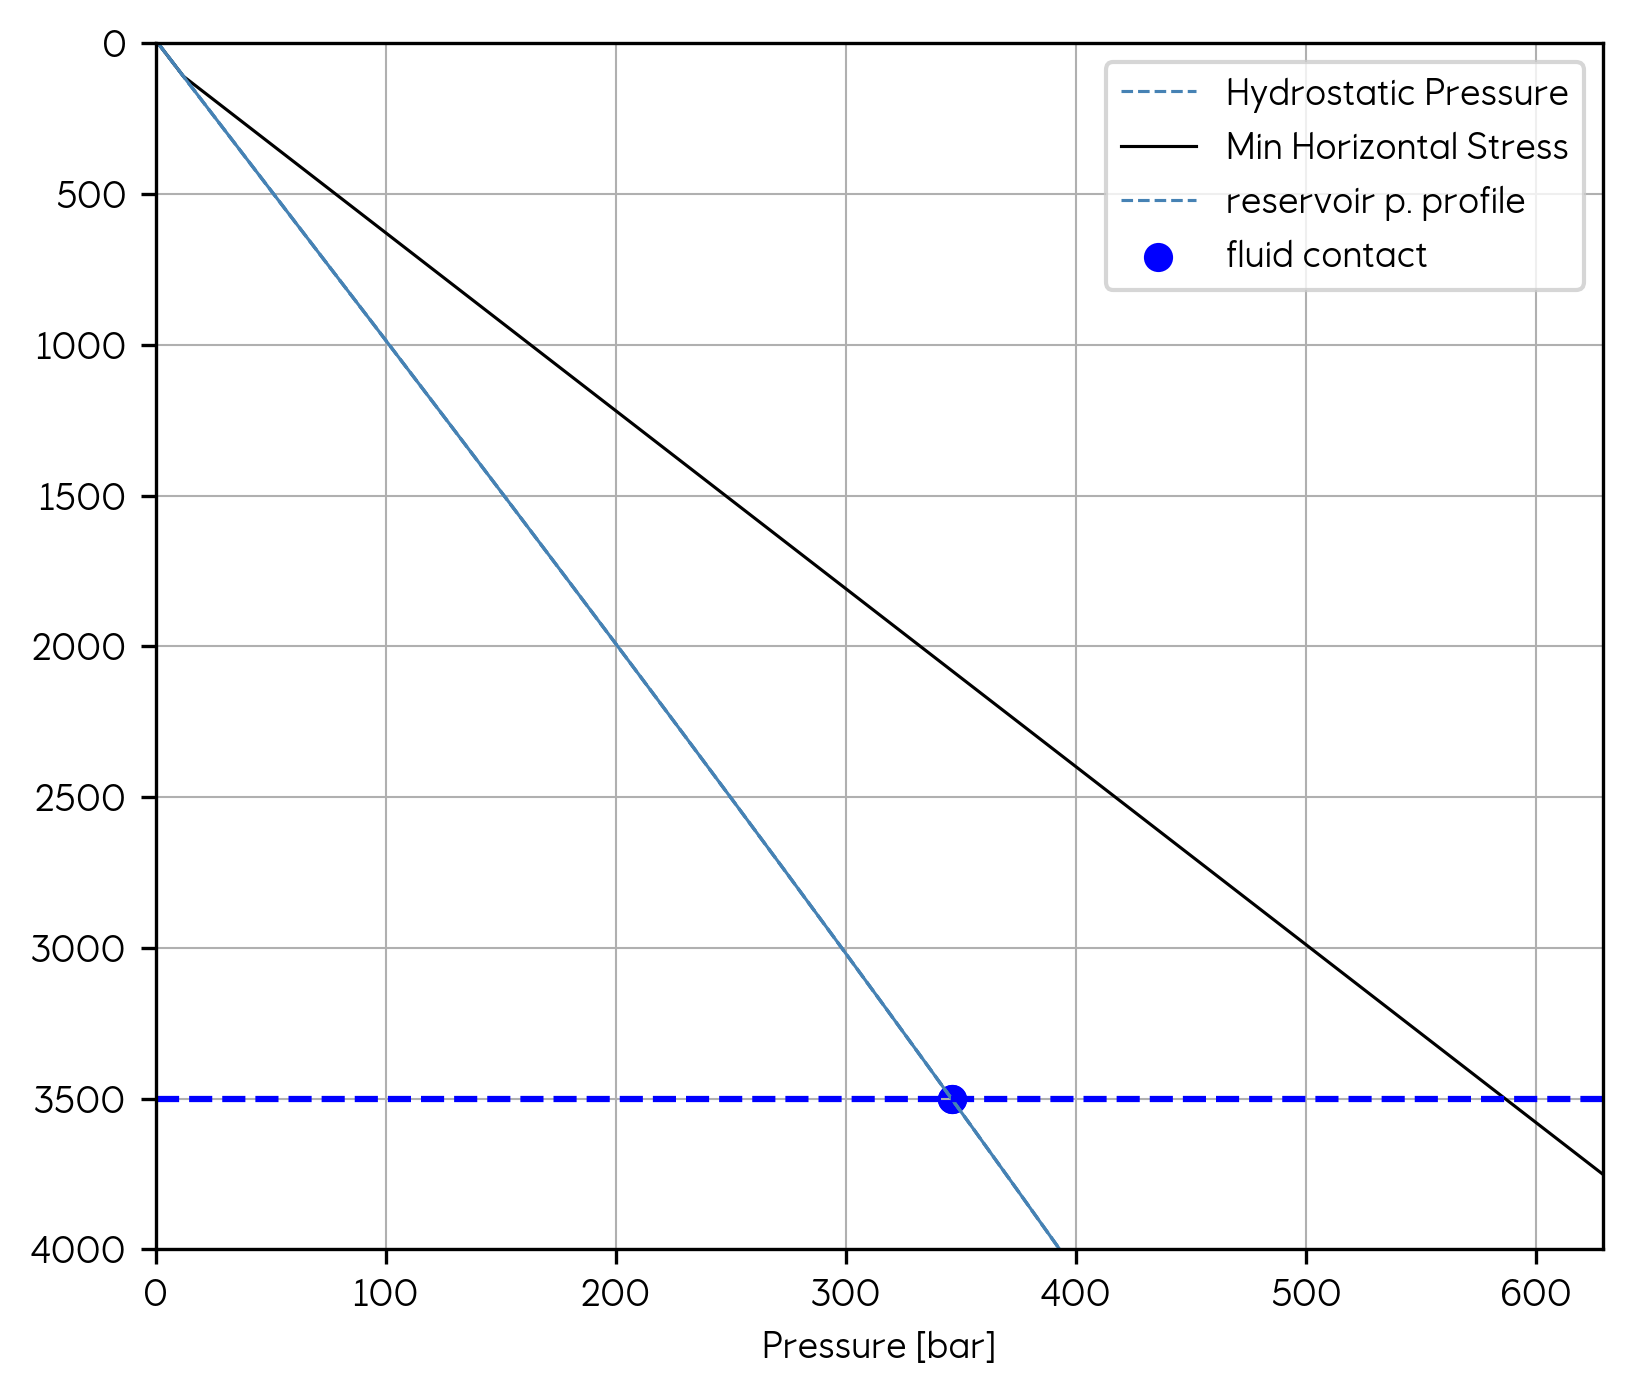

In [105]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

In [106]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None
1    methane         True  ...           100% CH4              None

[2 rows x 14 columns]

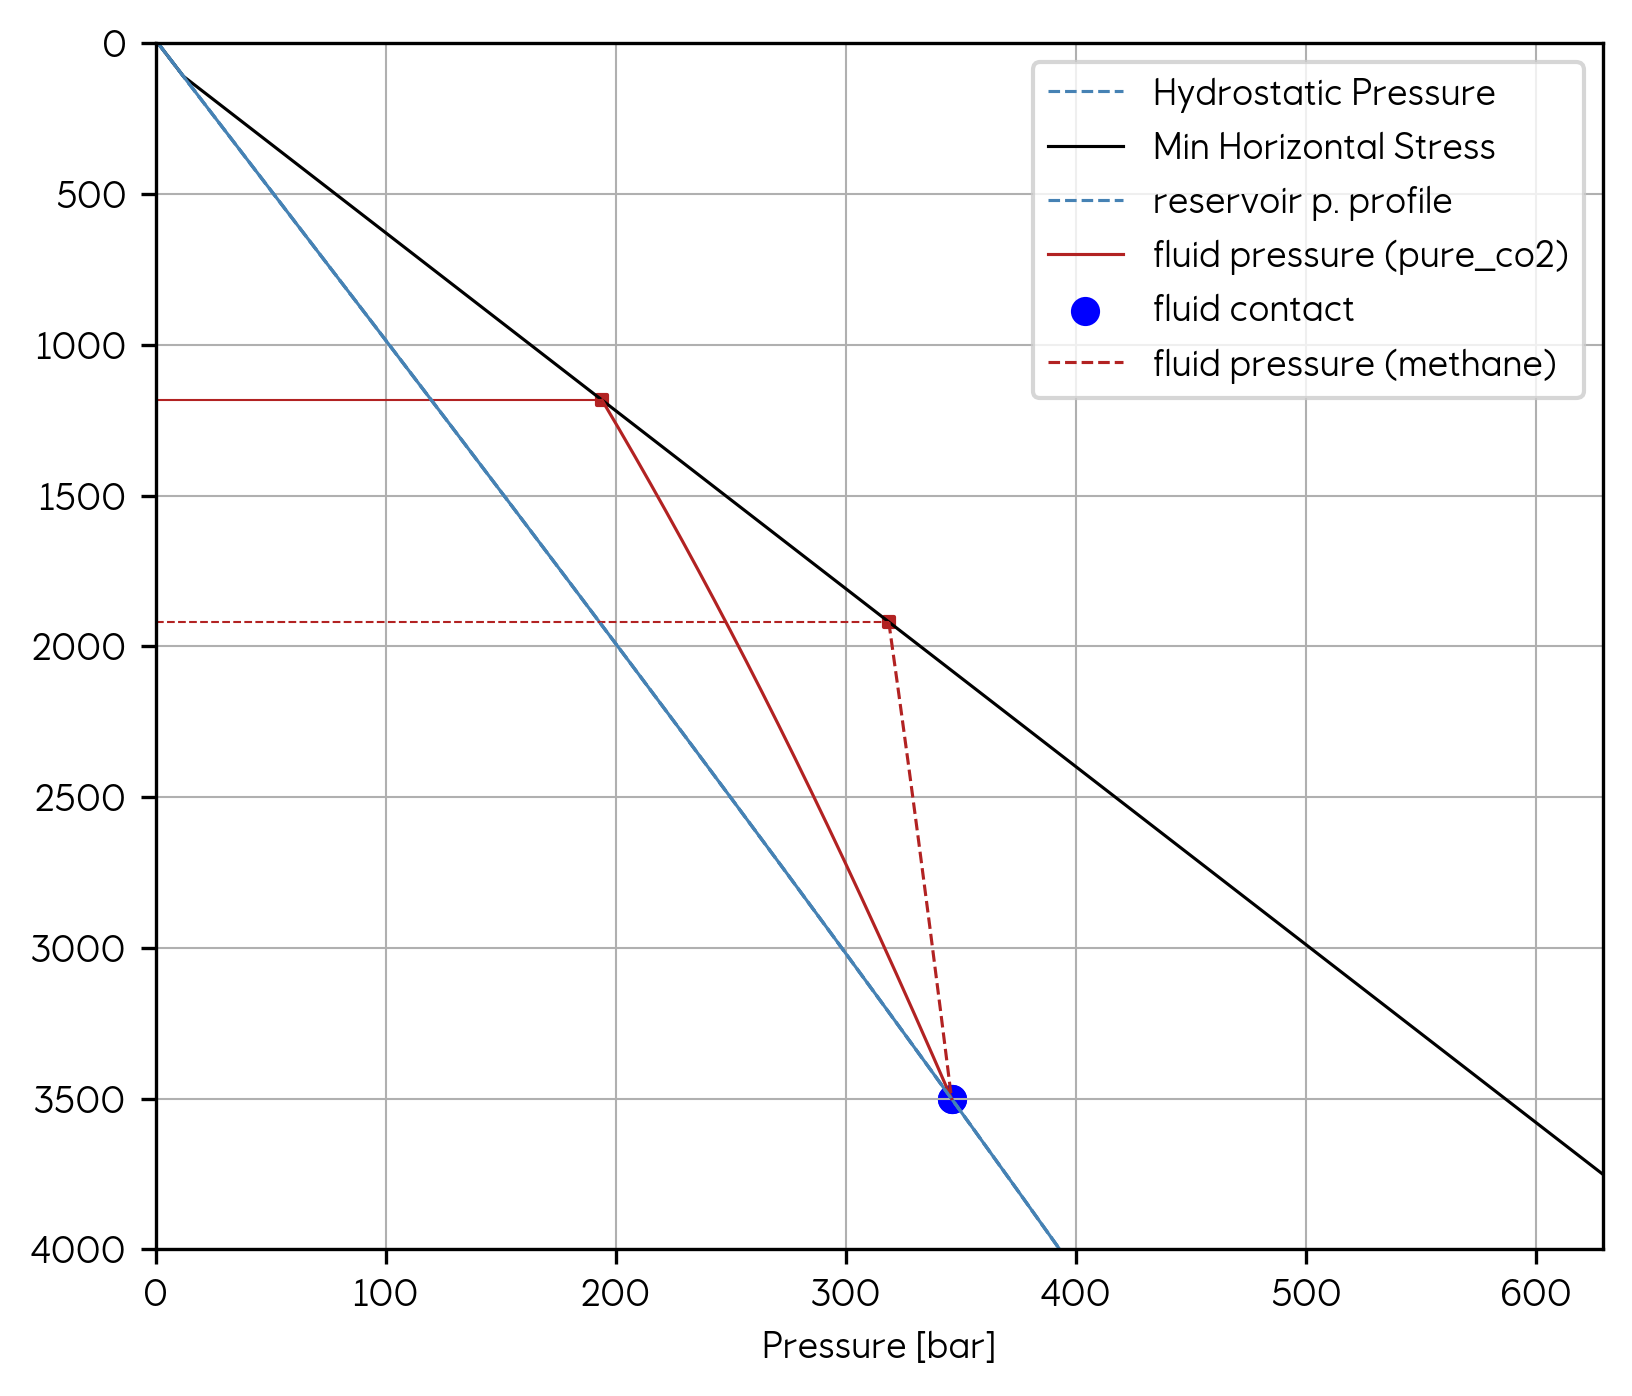

In [107]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)

fig.tight_layout()


## Example 2: Fluid contact + Delta P

In [108]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3700.)

{'from_resrvr': True}
Computing pressure profile for scenario: base_case pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
0.0


In [109]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact=3500, p_delta=50)

{'fluid_type': 'pure_co2', 'from_resrvr': True, 'z_fluid_contact': 3500, 'p_delta': 50}
Computing pressure profile for scenario: pure_co2 pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
50


In [110]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr  ...  fluid_composition  specific_gravity
0  base_case         True  ...           100% CO2              None
1   pure_co2         True  ...           100% CO2              None

[2 rows x 14 columns]

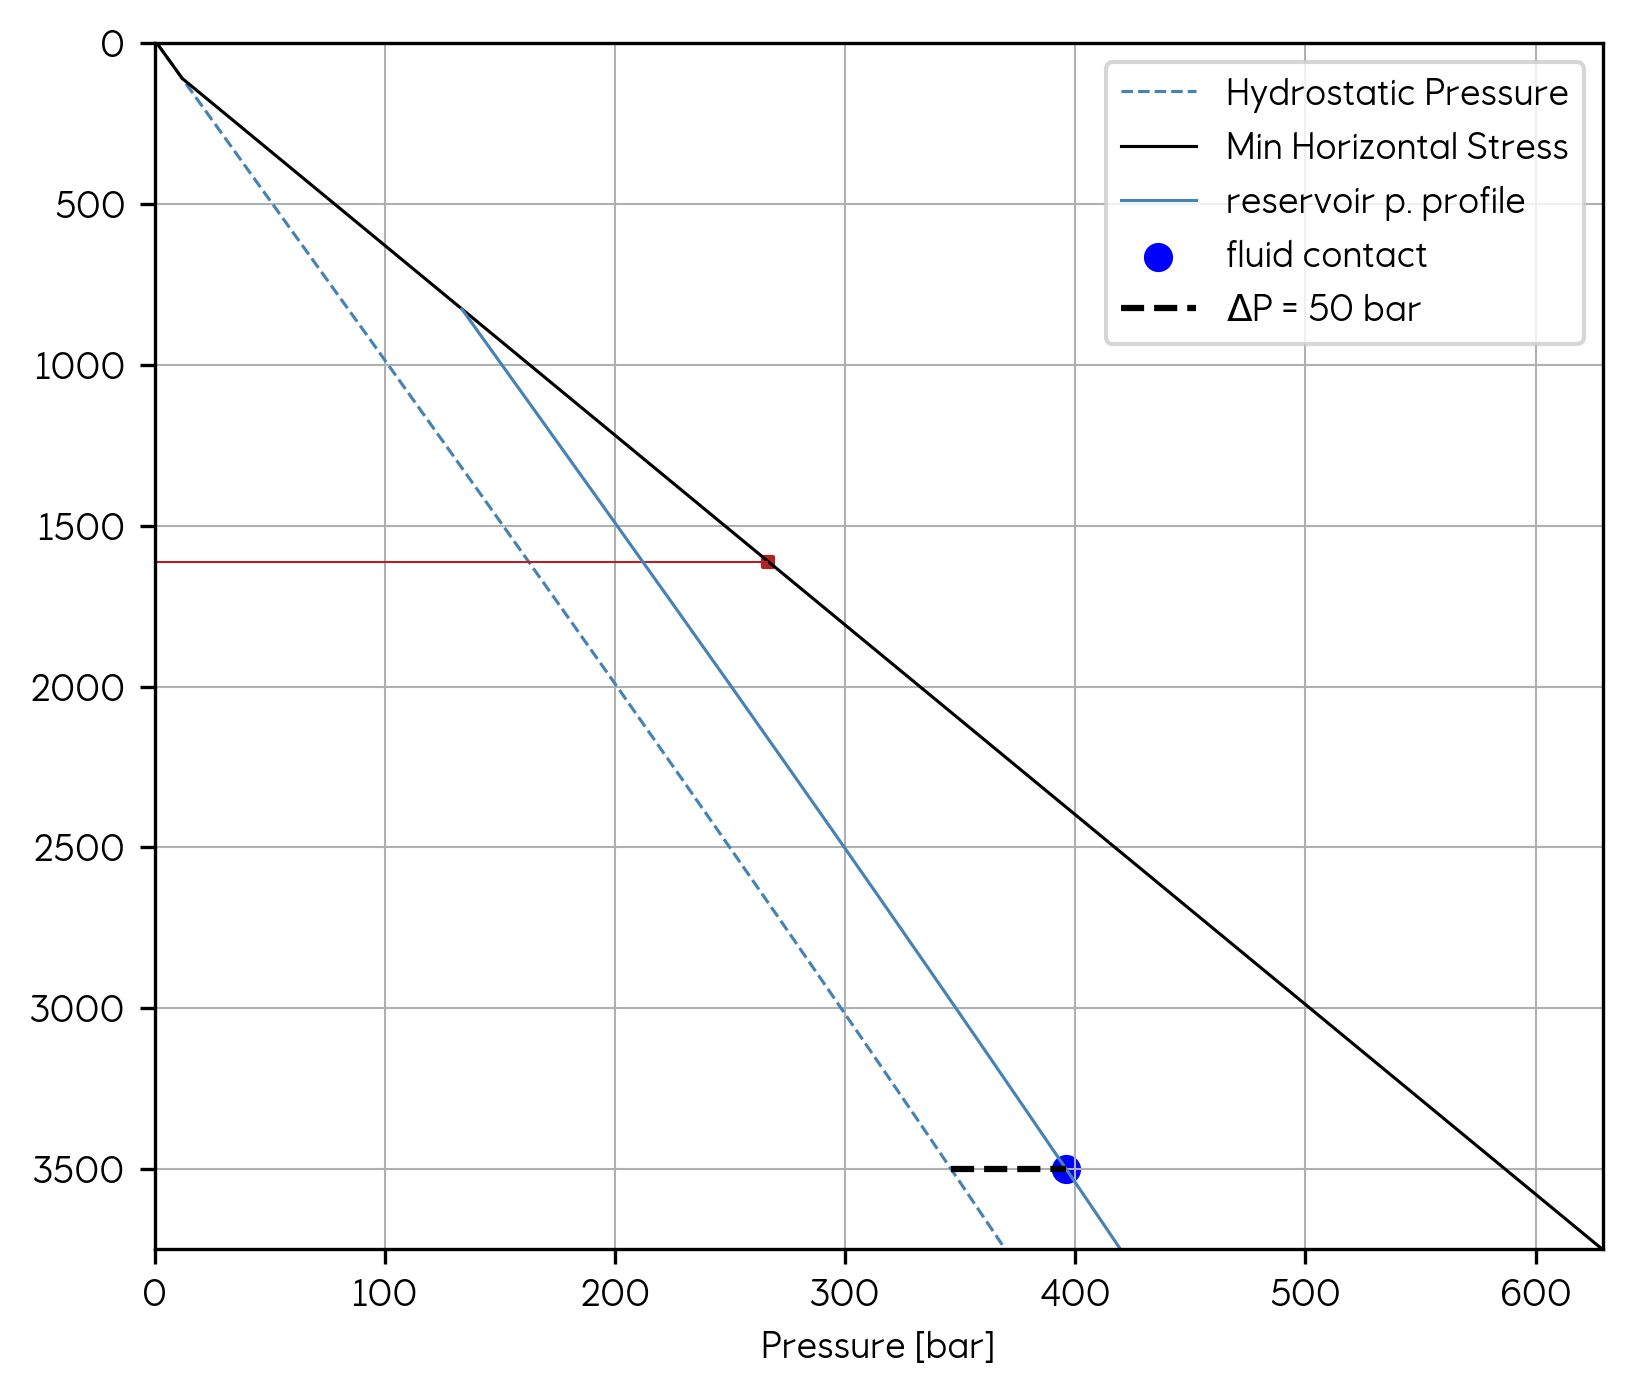

In [111]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,
              plot_selected_scenarios=['pure_co2'])



fig.tight_layout()


## Example 3: Reservoir Pressure

In [112]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [113]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_resrv=3400, p_resrv=380)  

{'fluid_type': 'pure_co2', 'from_resrvr': True, 'z_resrv': 3400, 'p_resrv': 380}
Computing pressure profile for scenario: pure_co2 pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: value computed and updated.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: Input value used.
z_resrv: Input value used.
43.45339408276044


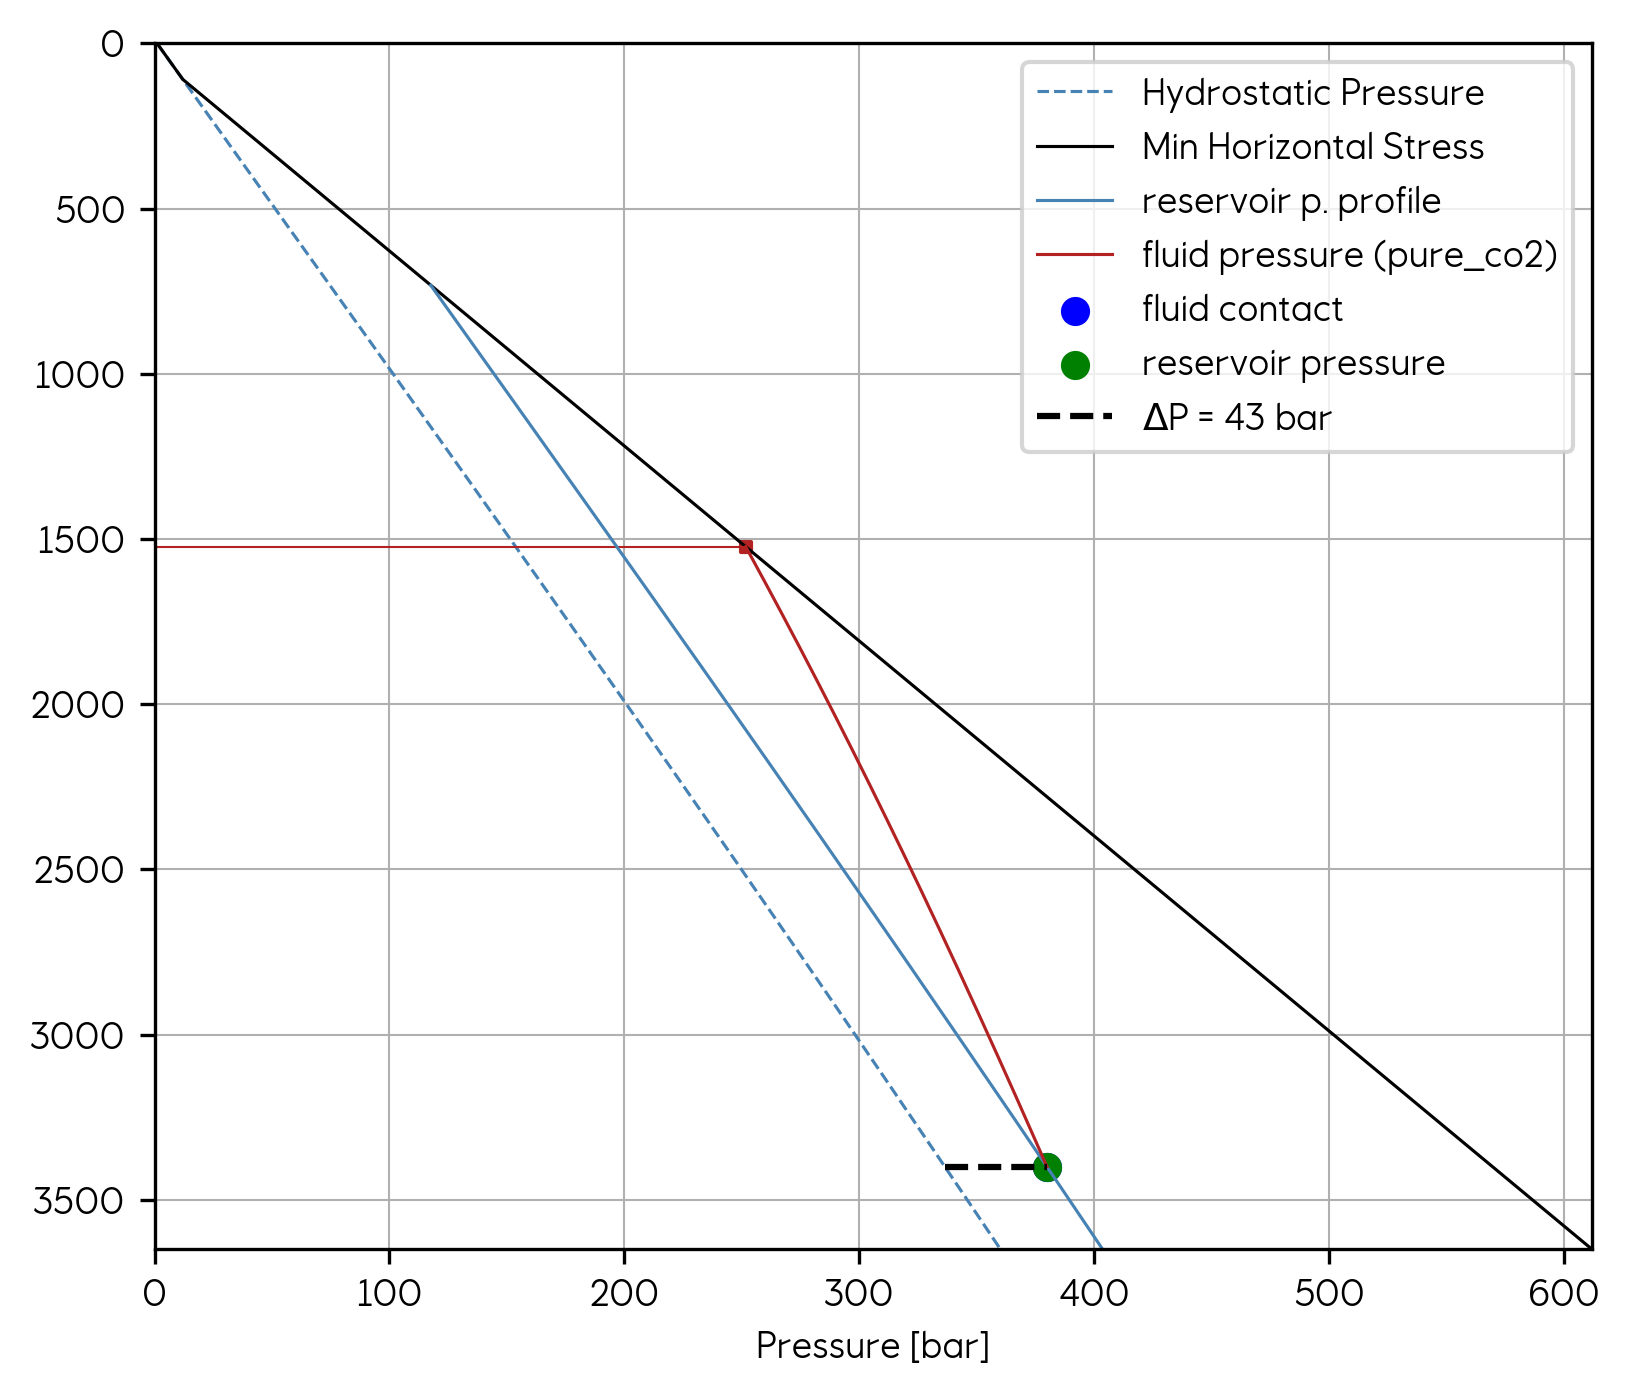

In [114]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)


fig.tight_layout()


## Example 4: Reservoir Pressure + fluid contact


In [115]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [116]:
my_pressure.add_scenario('C1', fluid_type='methane', from_resrvr=True, z_resrv=3100, p_resrv=320, z_fluid_contact=3700)  

{'fluid_type': 'methane', 'from_resrvr': True, 'z_resrv': 3100, 'p_resrv': 320, 'z_fluid_contact': 3700}
Computing pressure profile for scenario: C1 methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: Input value used.
z_resrv: Input value used.
-35.56346491226185


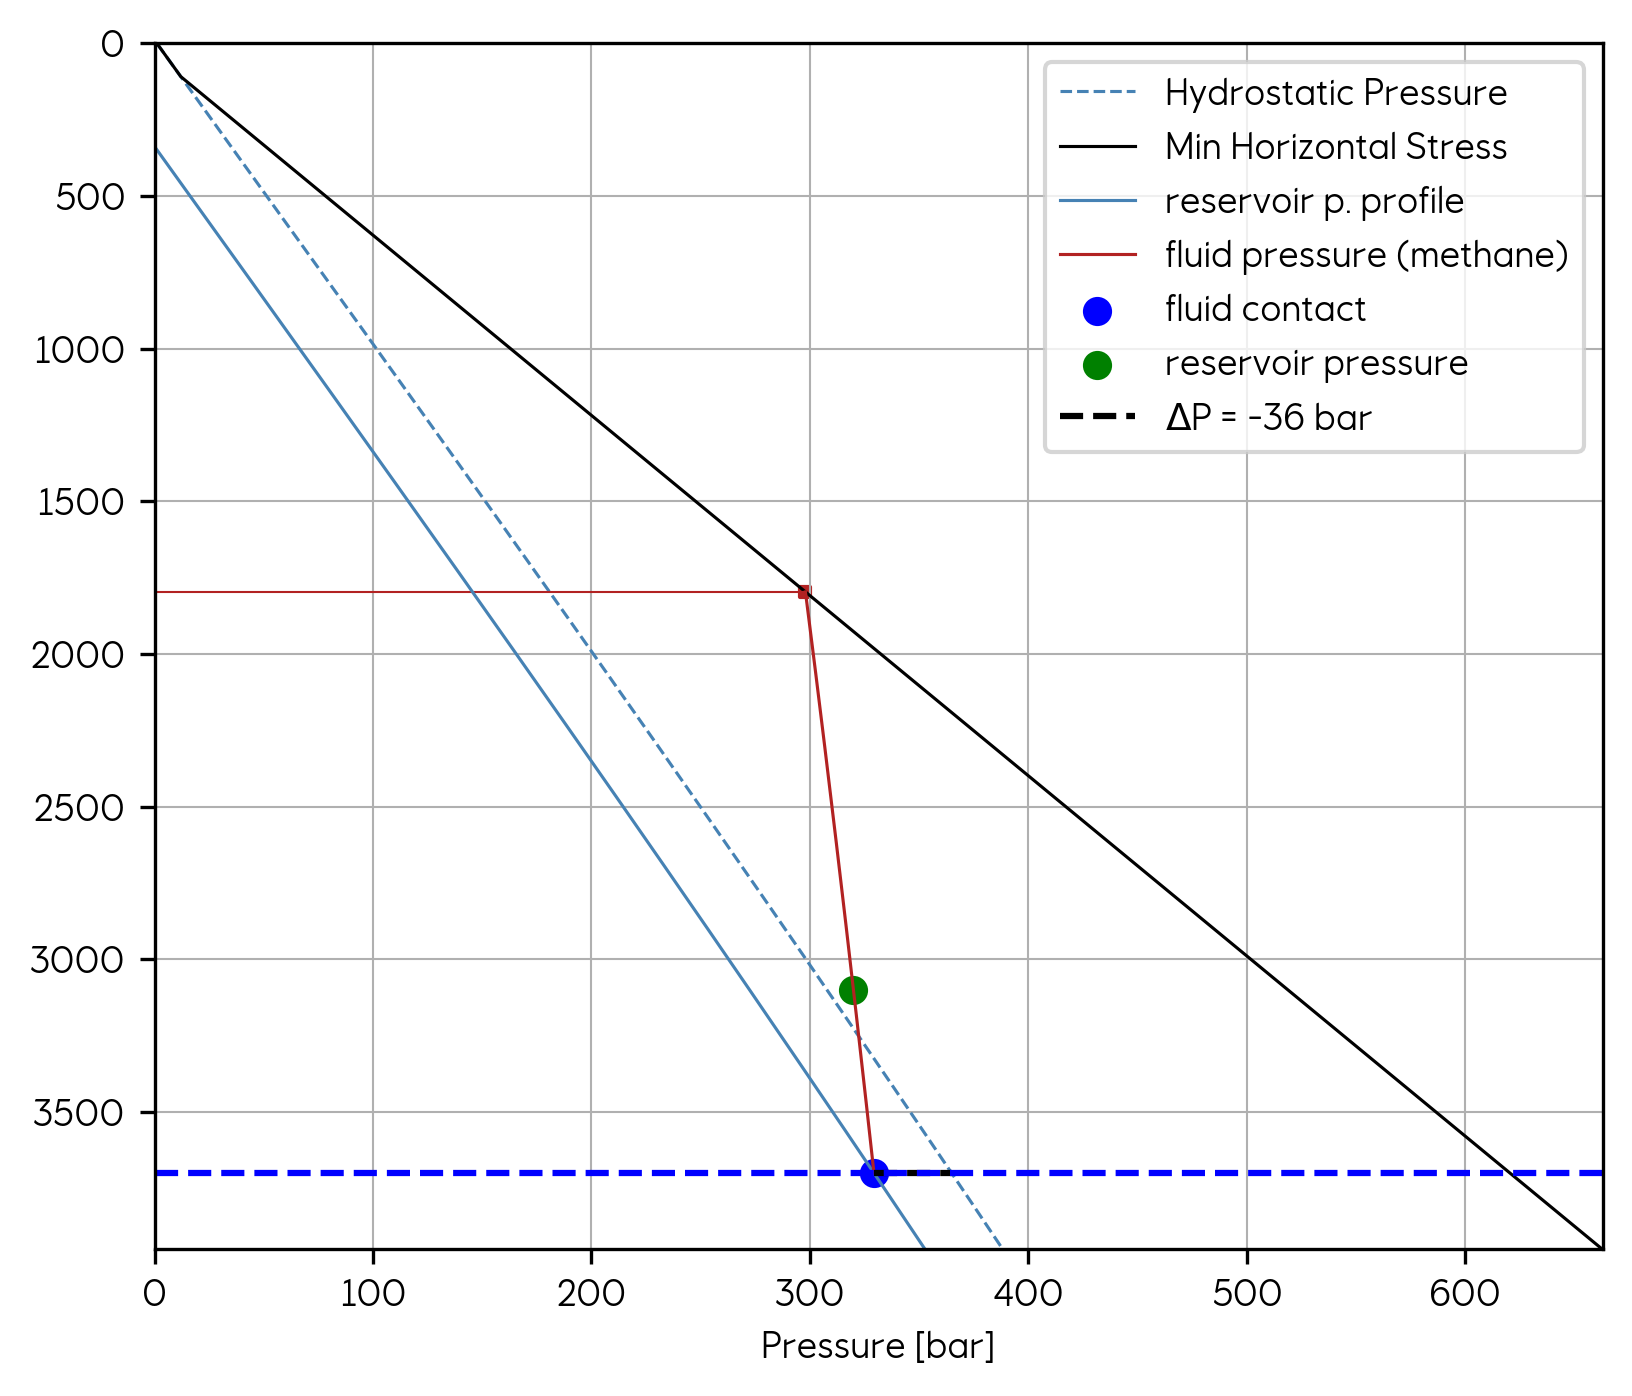

In [117]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 5: Multiple reservoirs


In [118]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [119]:
my_pressure.add_scenario('top r', fluid_type='methane', from_resrvr=True, z_resrv=3000, p_resrv=310, z_fluid_contact=3200)  
my_pressure.add_scenario('bottom r', fluid_type='methane', from_resrvr=True, z_fluid_contact=3700, p_delta=50)  

{'fluid_type': 'methane', 'from_resrvr': True, 'z_resrv': 3000, 'p_resrv': 310, 'z_fluid_contact': 3200}
Computing pressure profile for scenario: top r methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: value computed and updated.
p_resrv: Input value used.
z_resrv: Input value used.
-4.33123023767223
{'fluid_type': 'methane', 'from_resrvr': True, 'z_fluid_contact': 3700, 'p_delta': 50}
Computing pressure profile for scenario: bottom r methane
methane
fluid is methane
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
50


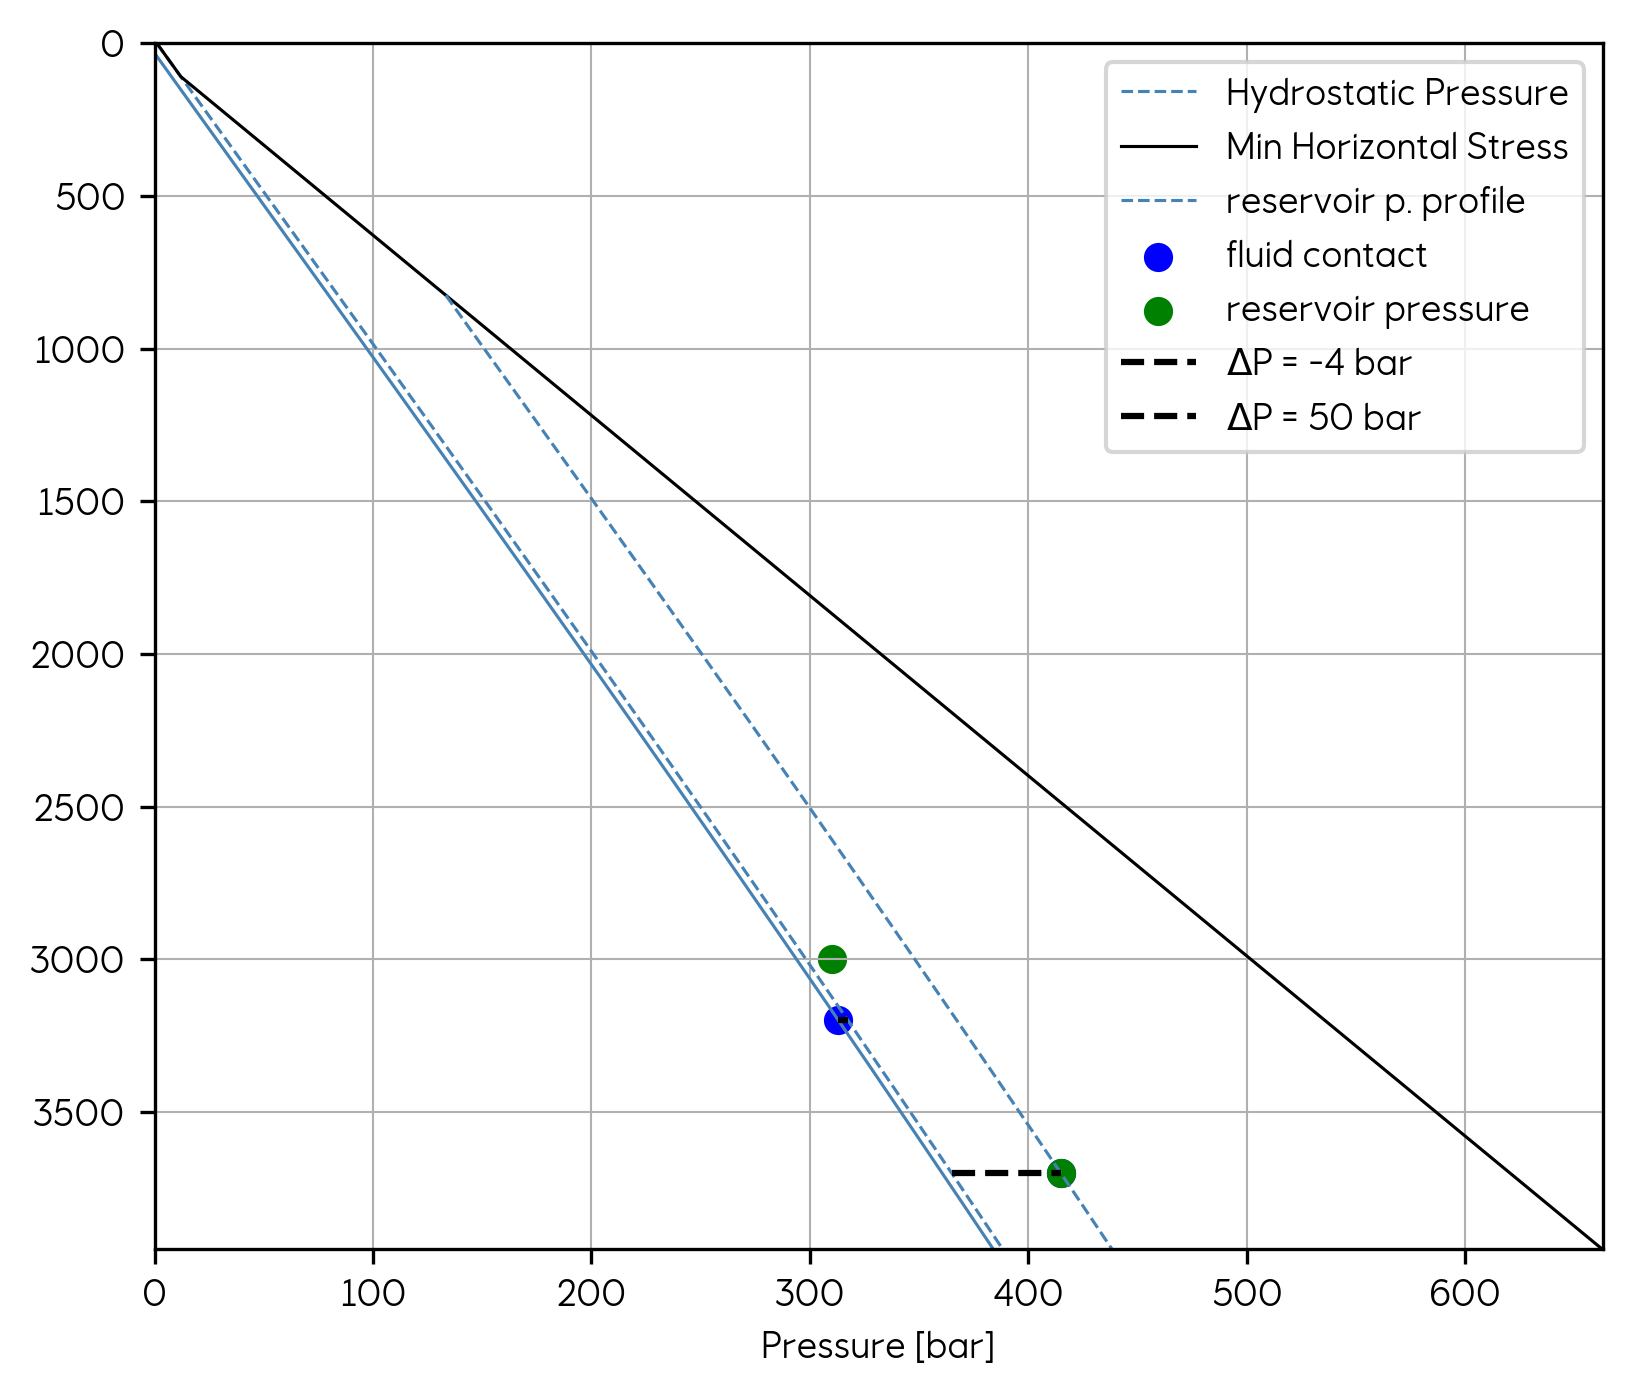

In [120]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)


fig.tight_layout()


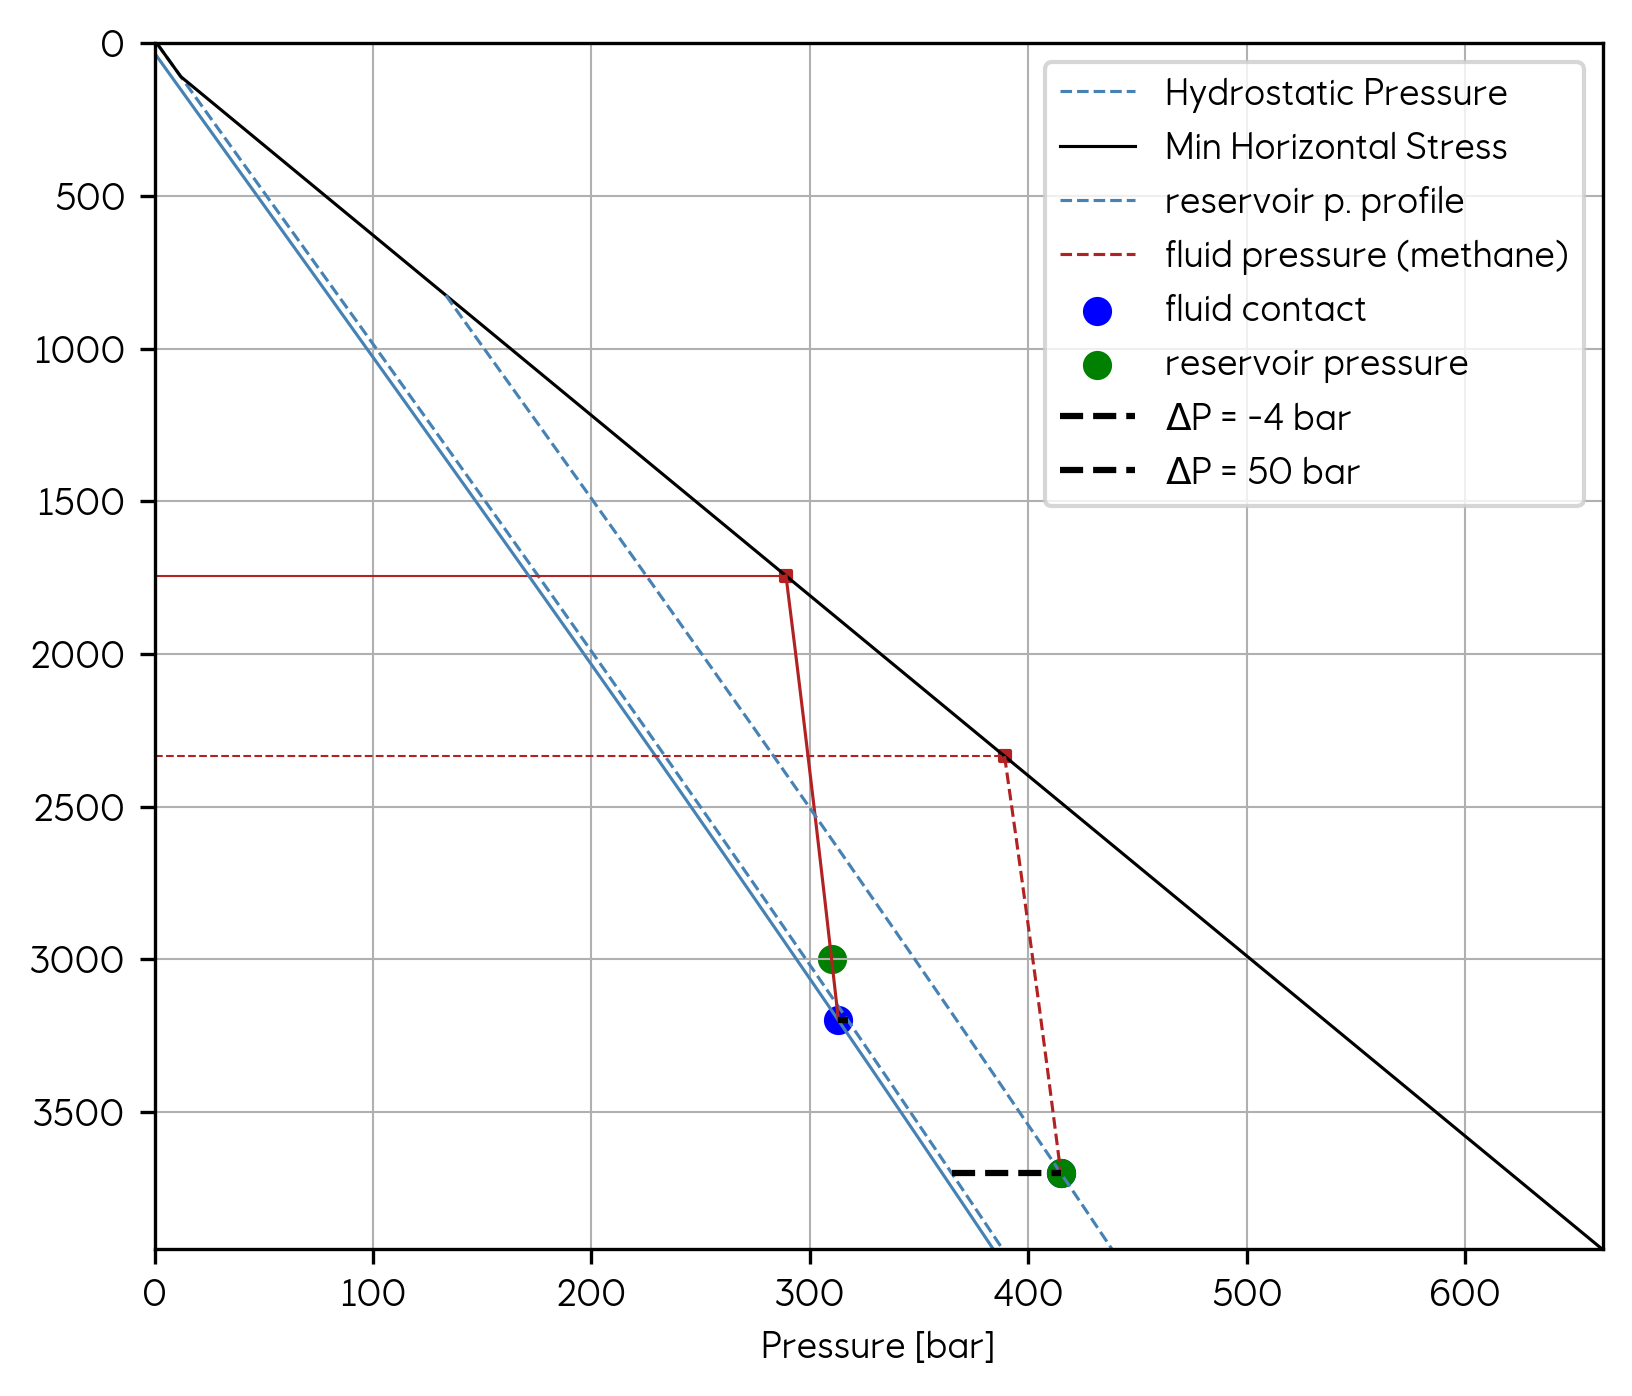

In [121]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 6: Compute pressure profile downwards from MSAD


In [122]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [123]:
my_pressure.add_scenario('Plug1', fluid_type='methane', from_resrvr=False,  z_MSAD=1800, z_fluid_contact=4000)    
my_pressure.add_scenario('Plug2', fluid_type='methane', from_resrvr=False,  z_MSAD=2500, z_fluid_contact=4000)  


{'fluid_type': 'methane', 'from_resrvr': False, 'z_MSAD': 1800, 'z_fluid_contact': 4000}
Computing pressure profile for scenario: Plug1 methane
fluid is methane
-58.55383178322944
{'fluid_type': 'methane', 'from_resrvr': False, 'z_MSAD': 2500, 'z_fluid_contact': 4000}
Computing pressure profile for scenario: Plug2 methane
fluid is methane
51.90562500651623


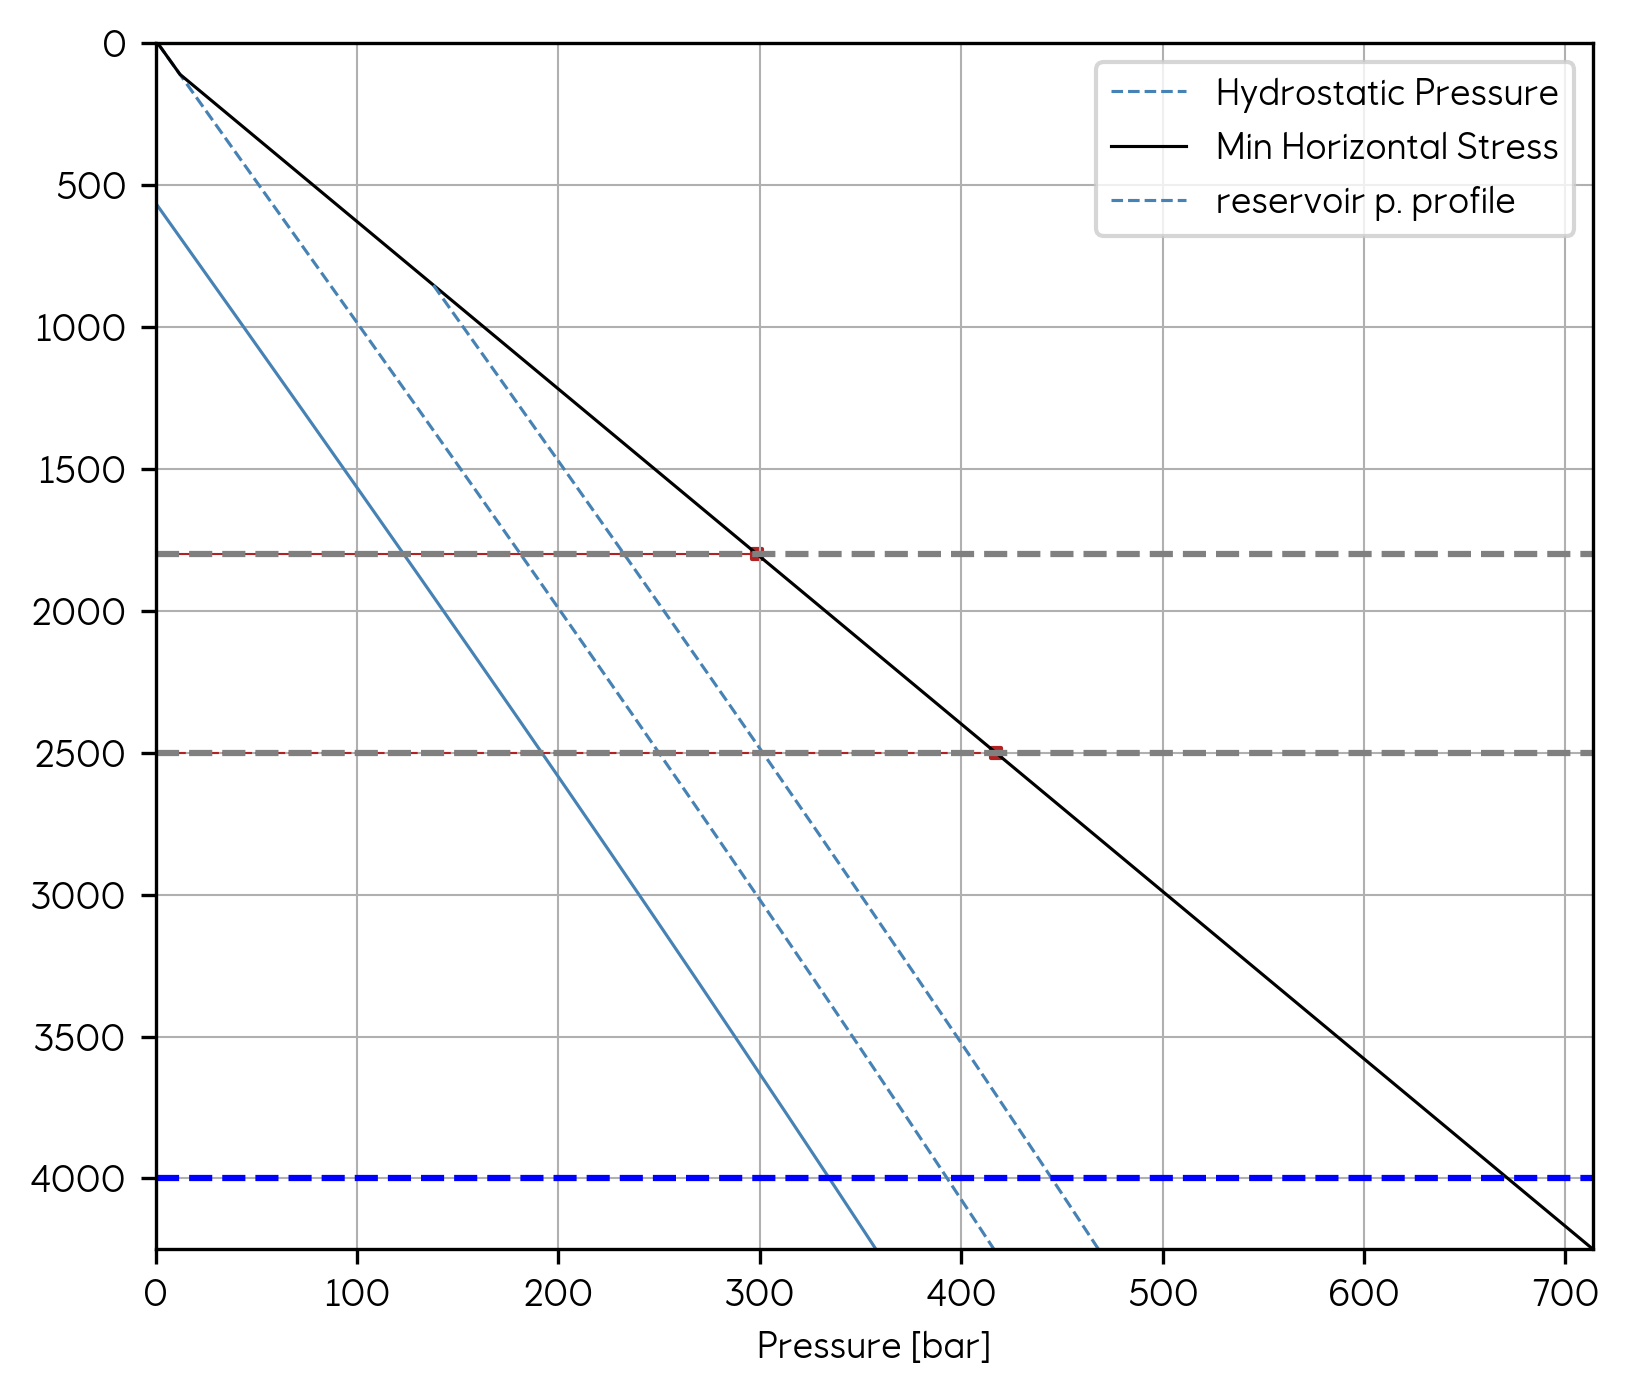

In [124]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False,)

ax.axhline(y=1800, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=2500, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=4000, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


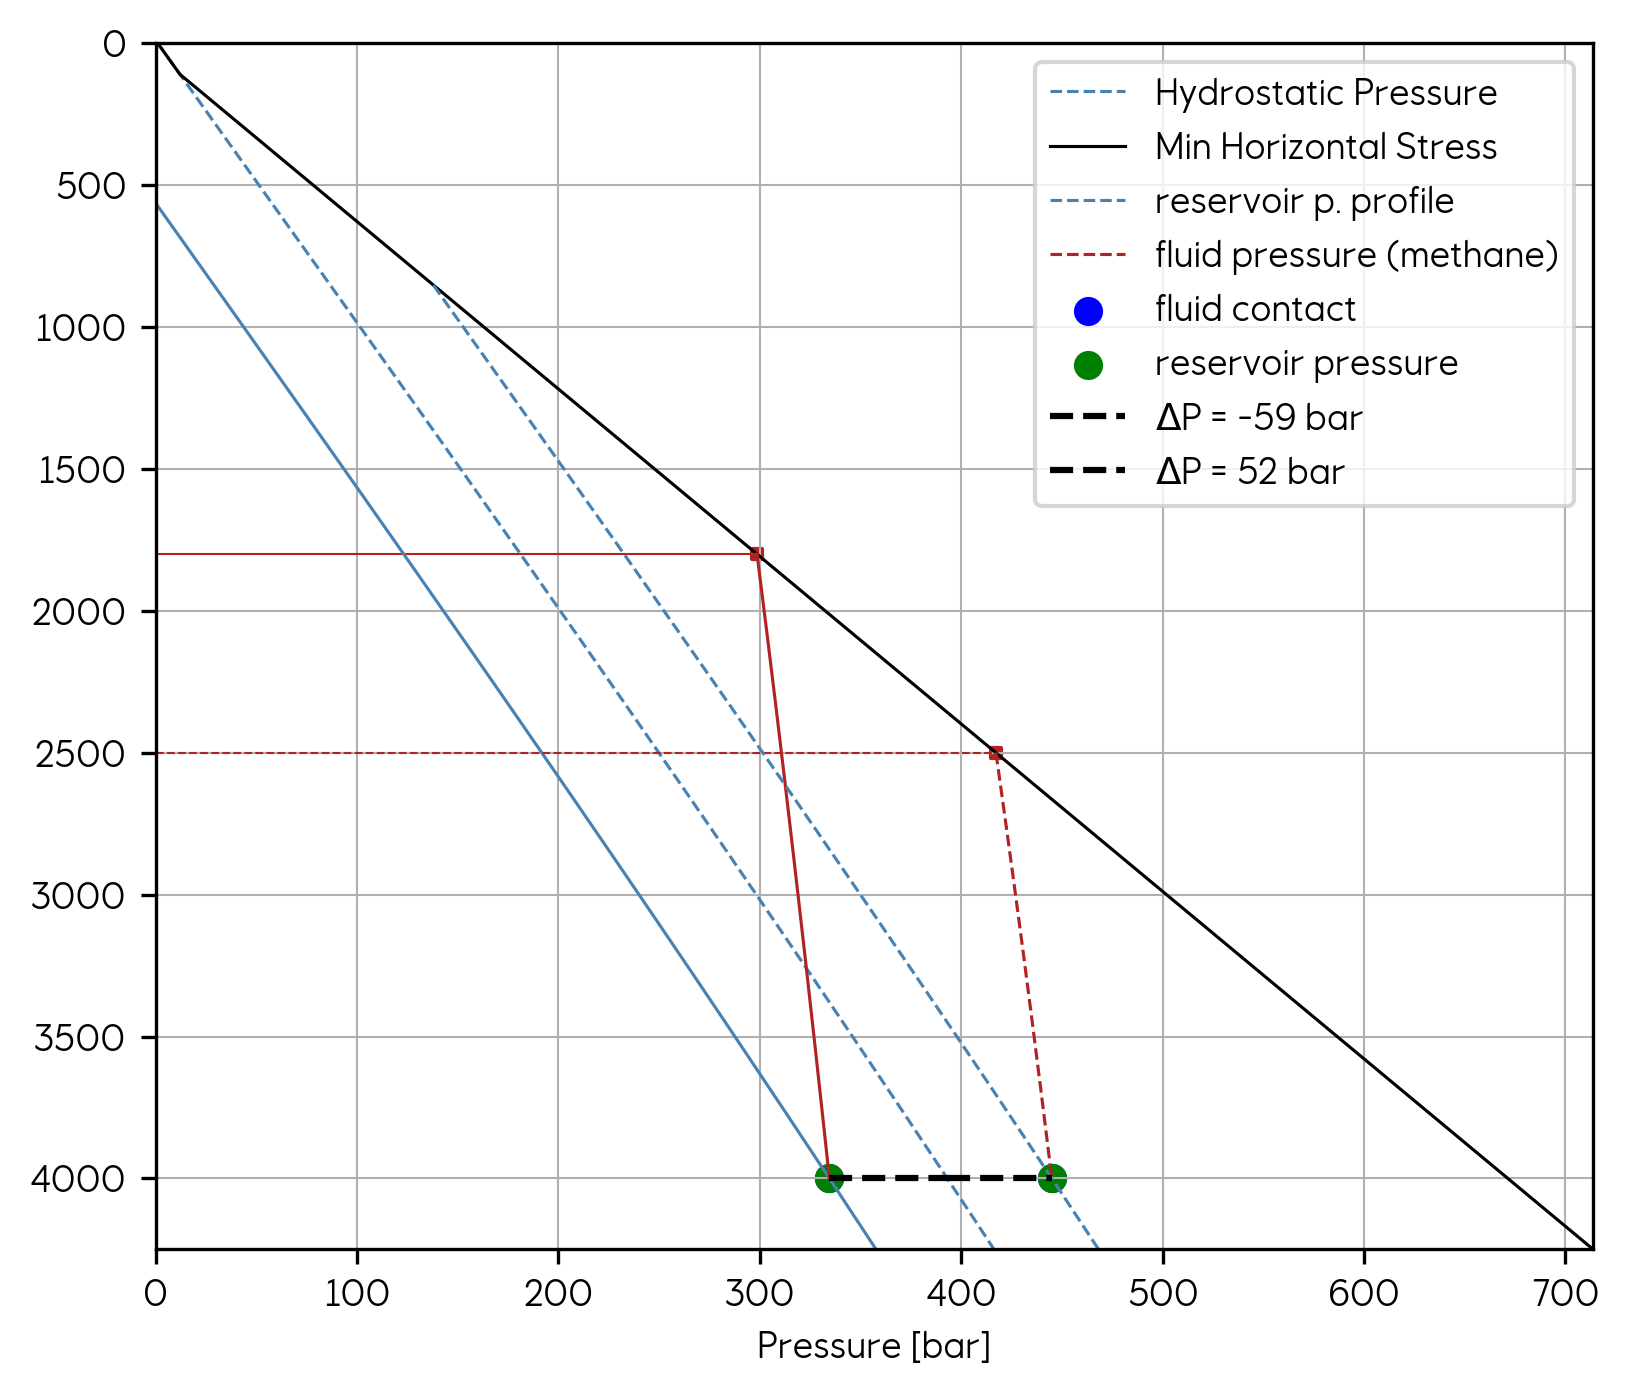

In [125]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


{'fluid_type': 'pure_co2', 'from_resrvr': True, 'z_fluid_contact': 3700, 'p_delta': 0}
Computing pressure profile for scenario: saline1 pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
0
{'fluid_type': 'pure_co2', 'from_resrvr': True, 'z_fluid_contact': 3700, 'p_delta': 100}
Computing pressure profile for scenario: saline2 pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
100
{'fluid_type': 'pure_co2', 'from_resrvr': True, 'z_fluid_contact': 3700, 'p_delta': -80}
Computing pressure profile for scenario: depleted pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: value computed and updated.
p_delta: Input value used.
p_re

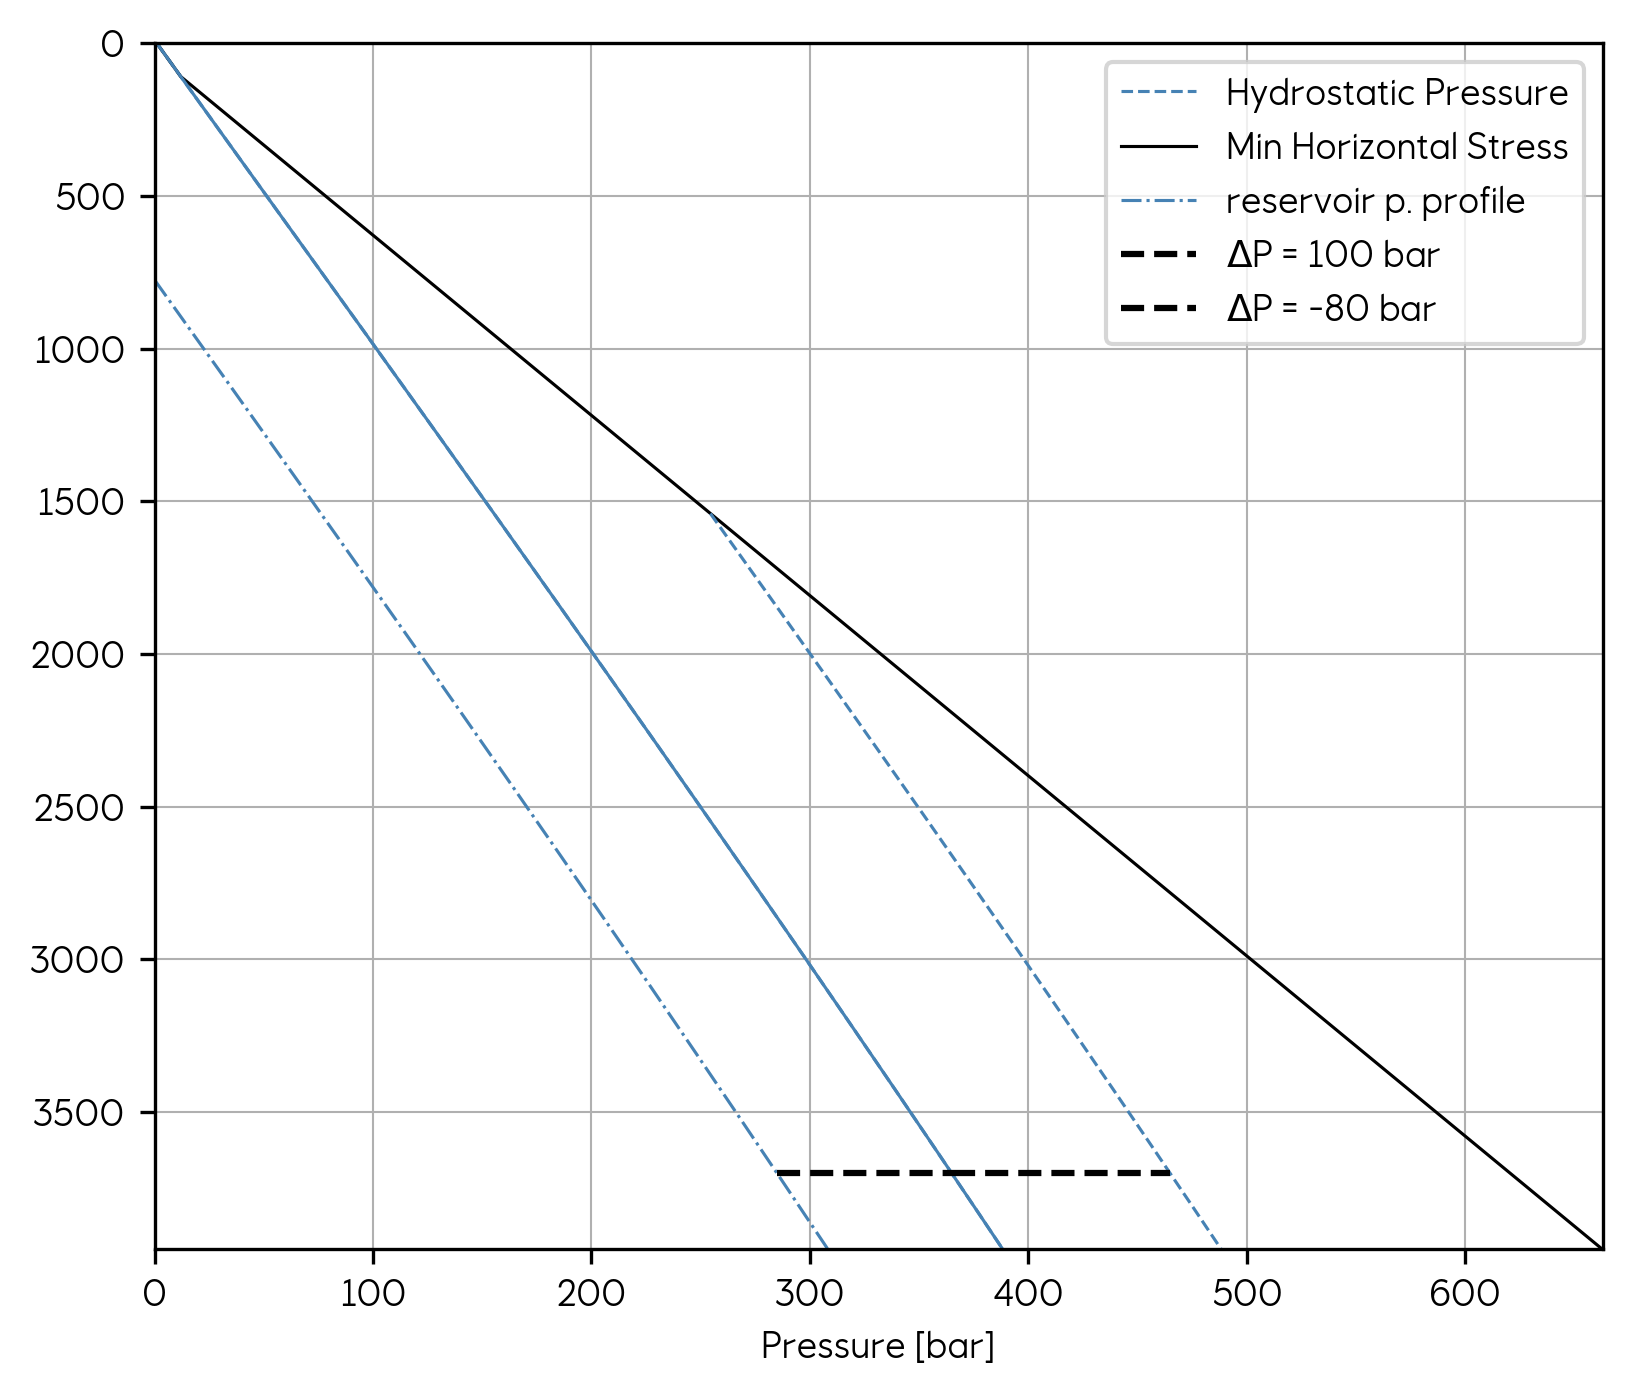

In [126]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)


my_pressure.add_scenario('saline1', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 0)    
my_pressure.add_scenario('saline2', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 100)  
my_pressure.add_scenario('depleted', fluid_type='pure_co2', from_resrvr=True,  z_fluid_contact=3700, p_delta= -80)  

rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 7: Compute pressure profile with input Shmin curve


In [127]:

winc_file_path = r'../test_data/examples/winc/gradients.json'

with open(winc_file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python object that contains the data from your JSON file
data[0].keys()

dict_keys(['curveType', 'curveName', 'depthType', 'curveUnits', 'depthUnits', 'wellboreName', 'depthMsl', 'curveValue'])

In [132]:
my_pressure = Pressure(sf_depth_msl=171.8-62.8,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=4369,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=field_fluid_type,  # fluid type name, should match the filename in the pvt_constants folder
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= 2000, # depth value coming from WINC UI
                       p_fluid_contact= 200 # pressure value coming from WINC UI
                       ) 

{'from_resrvr': True}
Computing pressure profile for scenario: base_case pure_co2
pure_co2
fluid is pure_co2
z_fluid_contact: Input value used.
p_fluid_contact: Input value used.
p_delta: value computed and updated.
p_resrv: value computed and updated.
z_resrv: value computed and updated.
-0.9007010673006732


In [141]:
import pandas as pd
gudrun_shmin = pd.read_csv('/workspaces/WINC_OnePager/notebooks/Gudrun_SHMIN.txt', 
                 sep='\t',
                 header=None, 
                 names=['depth', 'shmin_sg', 'shmin_psi'])


gudrun_shmin_exp = pd.read_csv('/workspaces/WINC_OnePager/notebooks/Gudrun_SHMIN_exp.txt', 
                 sep='\t',
                 header=None, 
                 names=['depth', 'shmin_sg', 'shmin_psi'])

gudrun_shmin_init = pd.read_csv('/workspaces/WINC_OnePager/notebooks/Gudrun_SHMIN_init.txt', 
                 sep='\t',
                 header=None, 
                 names=['depth', 'shmin_sg', 'shmin_psi'])

gudrun_shmin_low = pd.read_csv('/workspaces/WINC_OnePager/notebooks/Gudrun_SHMIN_low.txt', 
                 sep='\t',
                 header=None, 
                 names=['depth', 'shmin_sg', 'shmin_psi'])

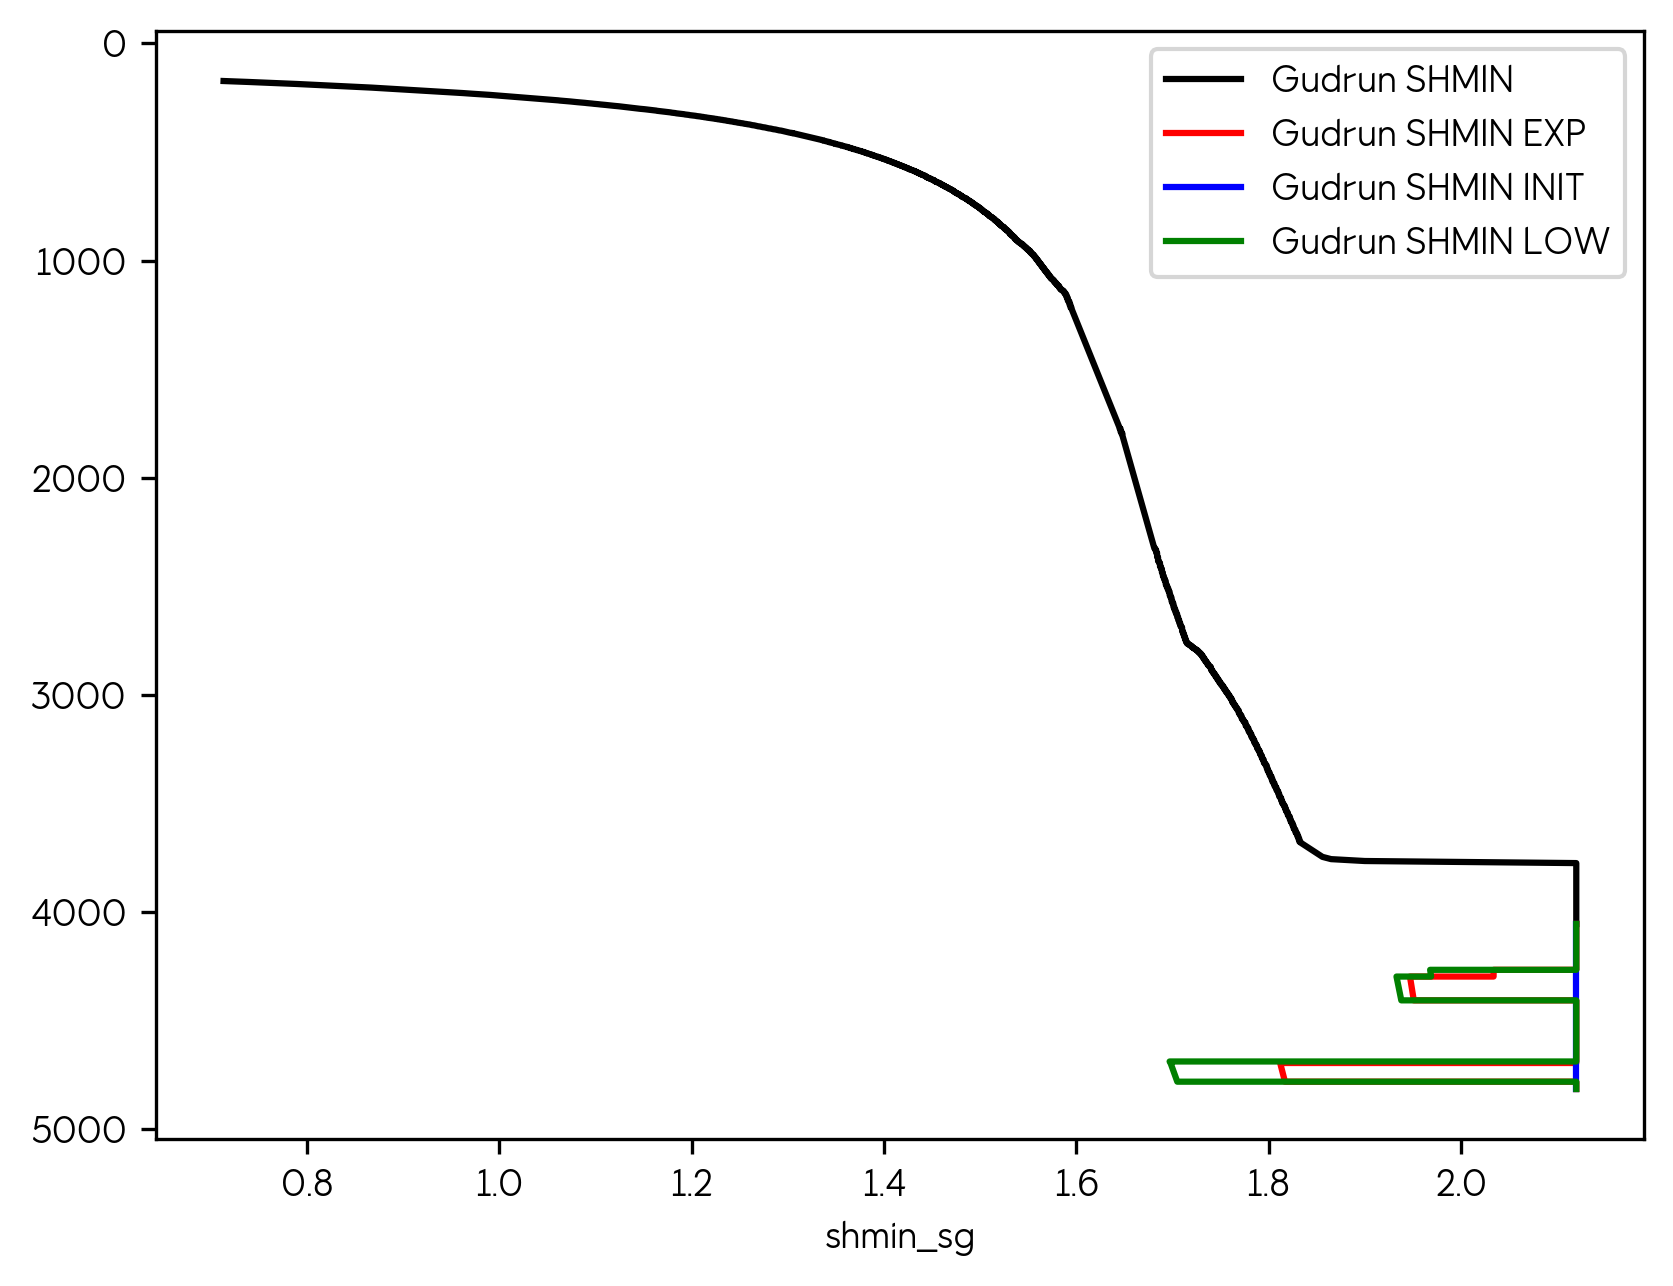

In [203]:
fig, ax = plt.subplots()

gudrun_shmin.plot(x='shmin_sg', y='depth', ax=ax, label='Gudrun SHMIN', color='black')
gudrun_shmin_exp.plot(x='shmin_sg', y='depth', ax=ax, label='Gudrun SHMIN EXP', color='red')
gudrun_shmin_init.plot(x='shmin_sg', y='depth', ax=ax, label='Gudrun SHMIN INIT', color='blue')
gudrun_shmin_low.plot(x='shmin_sg', y='depth', ax=ax, label='Gudrun SHMIN LOW', color='green')


# manual_shmin_z= np.array(data[3]['depthMsl'])
# manual_shmin_sg= np.array(data[3]['curveValue'])
# manual_shmin_pg= manual_shmin_sg * 1e3 * const.g / const.bar
# manual_shmin_p = manual_shmin_pg * manual_shmin_z


gudrun_shmin['shmin_p'] = (gudrun_shmin['shmin_sg'] * 1e3 * const.g / const.bar)*(gudrun_shmin['depth'] - 62.8)
gudrun_shmin_exp['shmin_p'] = (gudrun_shmin_exp['shmin_sg'] * 1e3 * const.g / const.bar)*(gudrun_shmin_exp['depth'] - 62.8)
gudrun_shmin_init['shmin_p'] = (gudrun_shmin_init['shmin_sg'] * 1e3 * const.g / const.bar)*(gudrun_shmin_init['depth'] - 62.8)
gudrun_shmin_low['shmin_p'] = (gudrun_shmin_low['shmin_sg'] * 1e3 * const.g / const.bar)*(gudrun_shmin_low['depth'] - 62.8)




ax.invert_yaxis()



In [197]:
const.bar

100000.0

TypeError: string indices must be integers, not 'str'

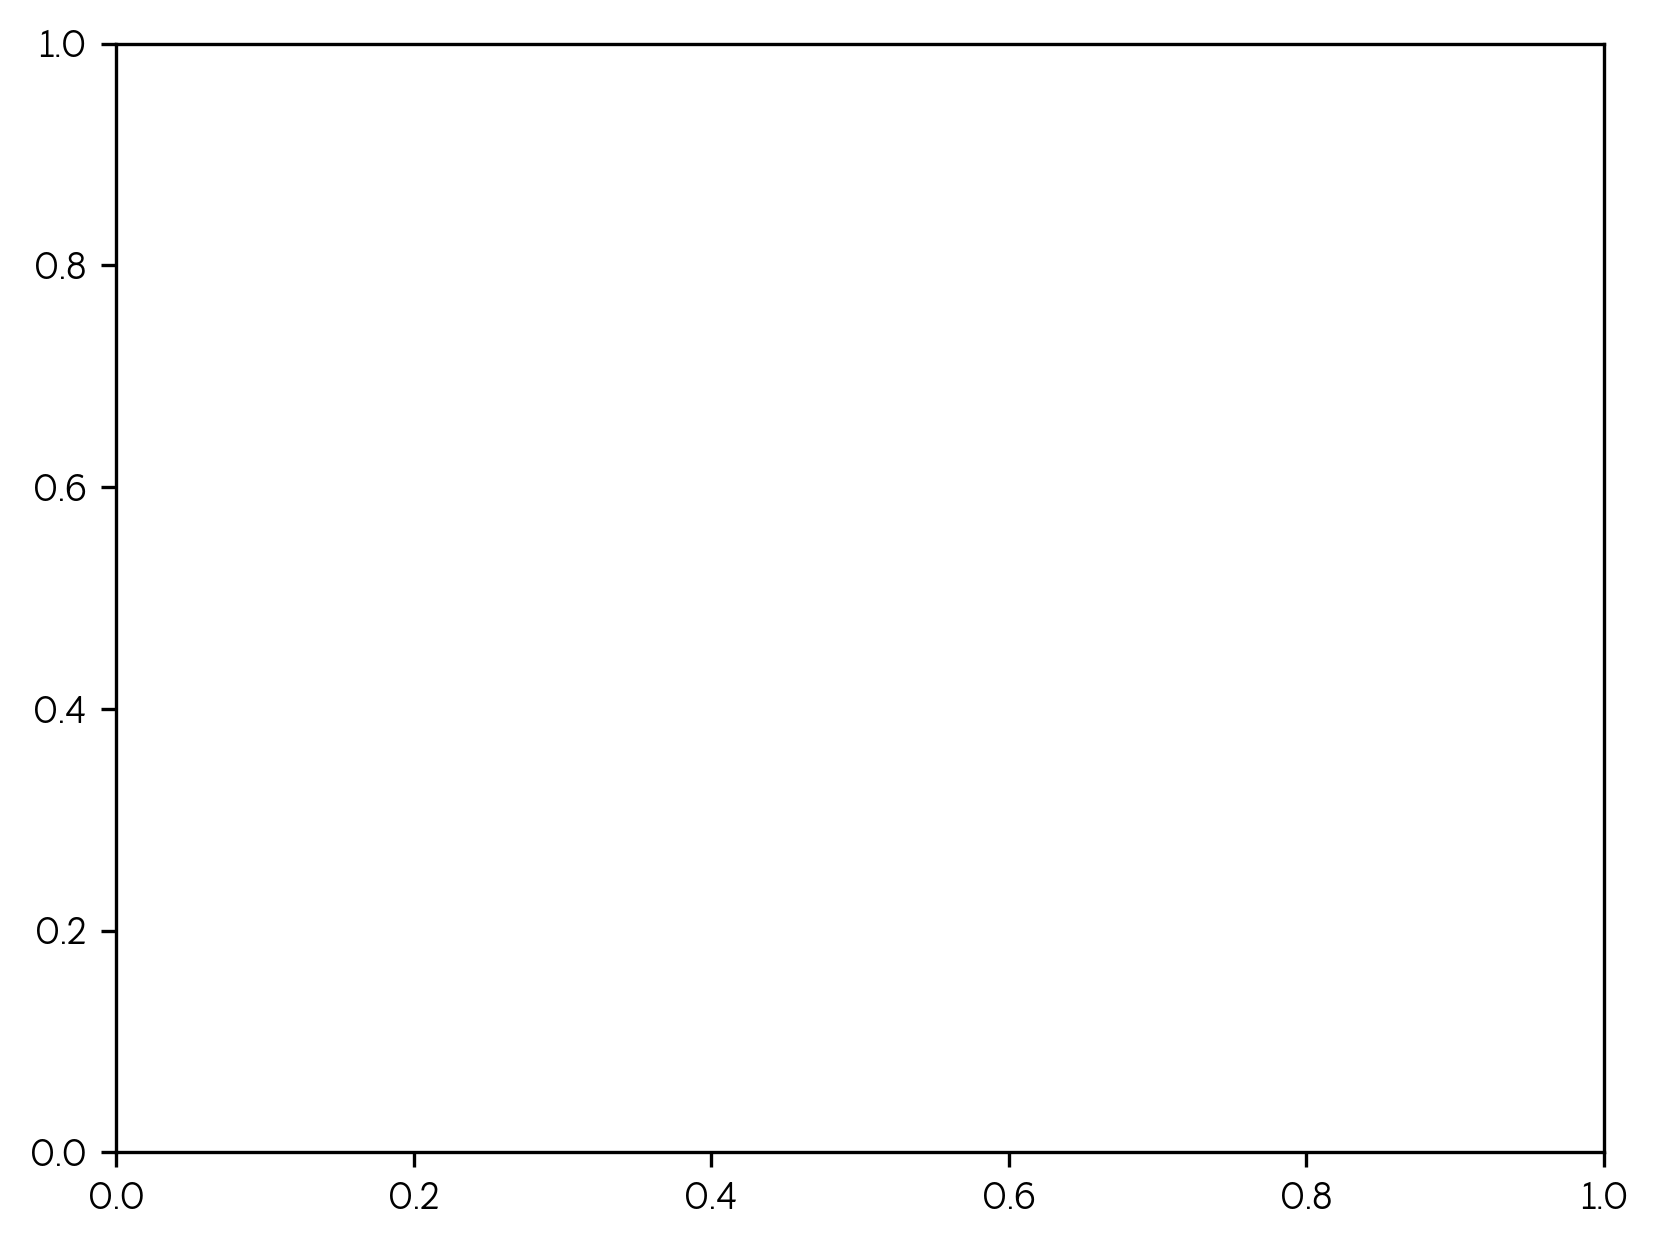

In [199]:

fig, ax = plt.subplots()

for curve in data:
    depth = curve['depthMsl']
    gradient = curve['curveValue'] 
    gradient_name = curve['curveName']
    gradient_units = curve['curveUnits']
    ax.plot(gradient, depth, label = f'{gradient_name} [{gradient_units}]')

ax.invert_yaxis()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()

manual_shmin_z= np.array(data[3]['depthMsl'])
manual_shmin_sg= np.array(data[3]['curveValue'])
manual_shmin_pg= manual_shmin_sg * 1e3 * const.g / const.bar
manual_shmin_p = manual_shmin_pg * manual_shmin_z



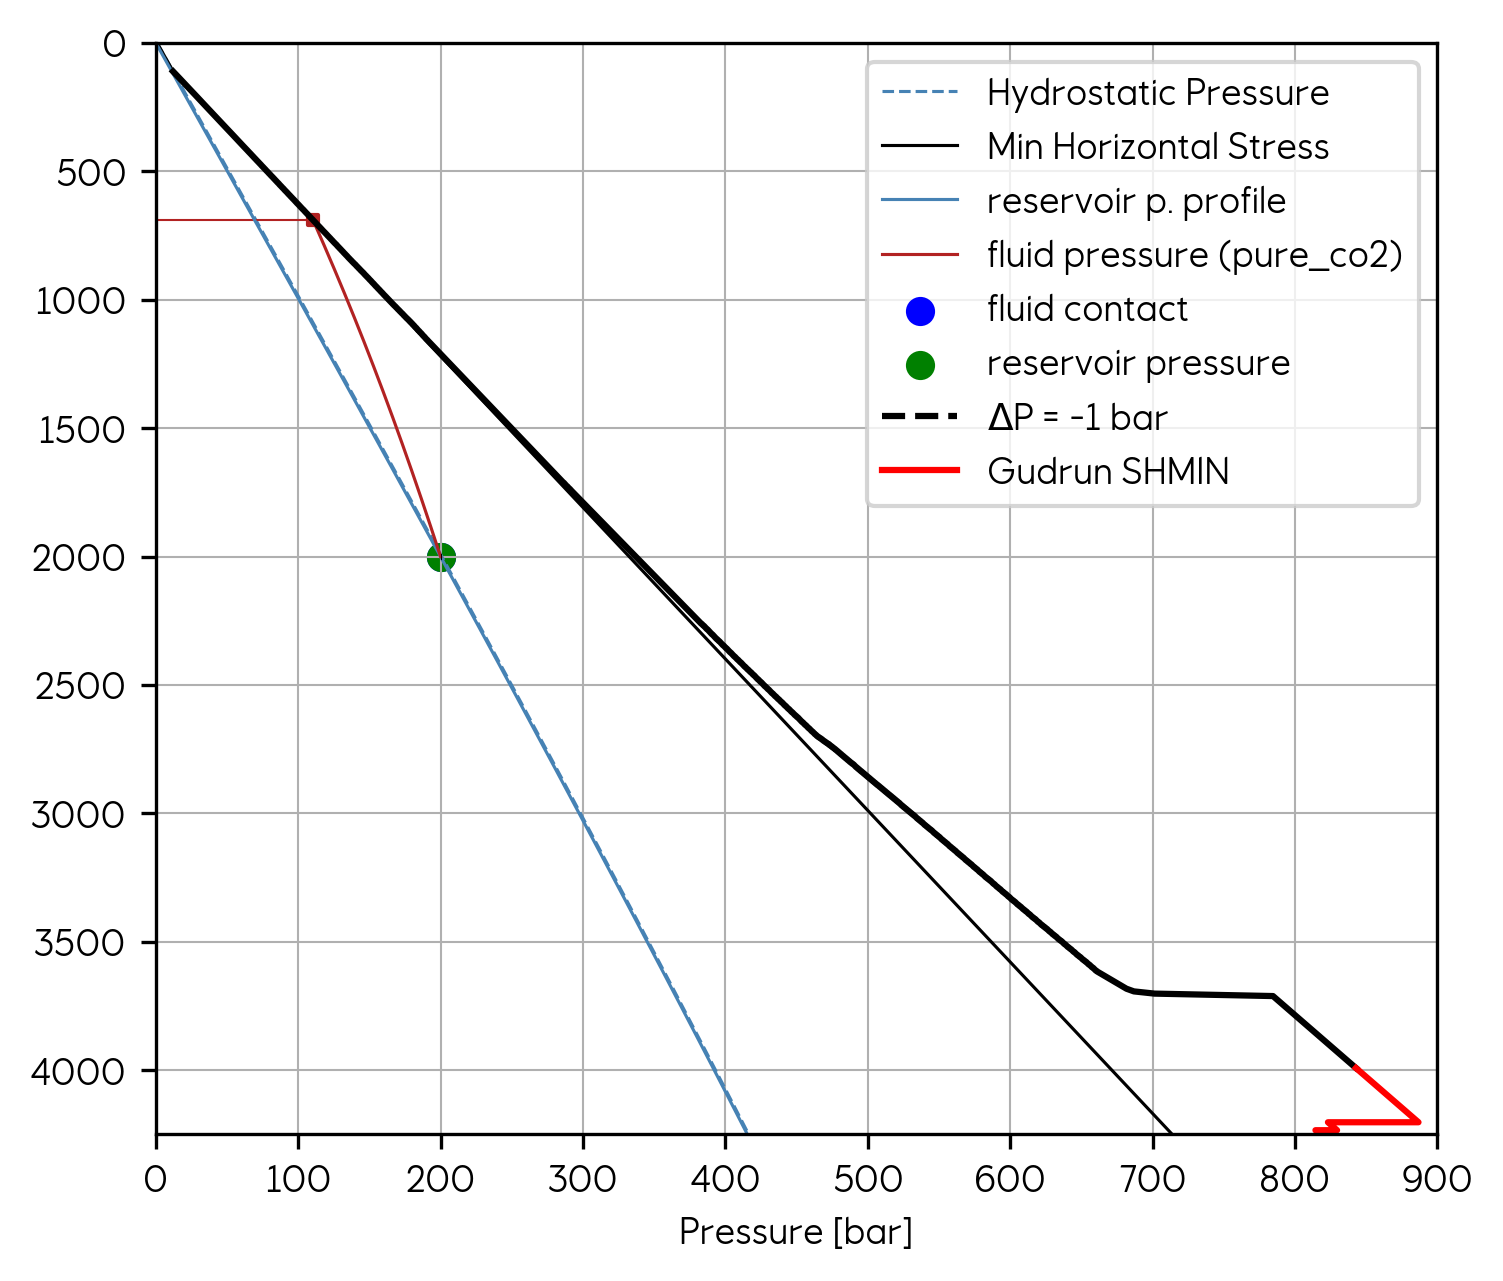

In [178]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )
# ax.plot(manual_shmin_p, manual_shmin_z, label='Manual Shmin')
ax.plot(gudrun_shmin['shmin_p'], gudrun_shmin['depth']-62.8, label='Gudrun SHMIN', color='black')
ax.plot(gudrun_shmin_low['shmin_p'], gudrun_shmin_low['depth']-62.8, label='Gudrun SHMIN', color='red')
ax.set_ylim(bottom=4250)
ax.set_xlim(right=900)


ax.legend()
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
ax.legend(lgd.values(), lgd.keys())
# ax.set_ylim(bottom=my_pressure.well_td_rkb - 500)

fig.show()

In [177]:
gudrun_shmin_low

depth  shmin_sg     shmin_psi      shmin_p
0   4054.270020     2.120  12227.082031   842.886665
1   4054.300049     2.120  12227.172852   842.892908
2   4115.330078     2.120  12411.229492   855.581110
3   4115.339844     2.120  12411.259766   855.583140
4   4149.250000     2.120  12513.527344   862.633095
5   4149.259766     2.120  12513.556641   862.635125
6   4192.259766     2.120  12643.238281   871.574867
7   4192.270020     2.120  12643.269531   871.576998
8   4203.600098     2.120  12677.439453   873.932533
9   4203.609863     2.120  12677.468750   873.934563
10  4239.500000     2.120  12785.708008   881.396157
11  4239.509766     2.120  12785.737305   881.398187
12  4265.439941     2.120  12863.939453   886.789096
13  4265.450195     1.968  11941.648438   823.210037
14  4296.430176     1.969  12034.492188   829.610320
15  4296.439941     1.933  11814.488281   814.444074
16  4406.020020     1.938  12147.154297   837.376765
17  4406.029785     2.120  13287.937500   916.017861
18  4458.270020     2.120  13445.486328   926.878656
19  4458.279785     2.120  13445.515625   926.880686
20  4464.790039     2.120  13465.149414   928.234175
21  4464.799805     2.120  13465.179688   928.236205
22  4470.919922     2.120  13483.636719   929.508583
23  4470.930176     2.120  13483.667969   929.510715
24  4475.759766     2.120  13498.232422   930.514791
25  4475.770020     2.120  13498.263672   930.516923
26  4481.890137     2.120  13516.720703   931.789301
27  4481.899902     2.120  13516.750977   931.791332
28  4488.580078     2.120  13536.897461   933.180147
29  4488.589844     2.120  13536.926758   933.182177
30  4494.740234     2.120  13555.475586   934.460849
31  4494.750000     2.120  13555.504883   934.462879
32  4532.470215     2.120  13669.263672   942.304949
33  4532.479980     2.120  13669.292969   942.306979
34  4617.689941     2.120  13926.273438   960.022212
35  4617.700195     2.120  13926.304688   960.024344
36  4627.680176     2.120  13956.402344   962.099192
37  4627.689941     2.120  13956.431641   962.101222
38  4639.350098     2.120  13991.597656   964.525380
39  4639.359863     2.120  13991.626953   964.527410
40  4670.970215     2.120  14086.958984   971.099233
41  4670.979980     2.120  14086.988281   971.101263
42  4687.439941     2.120  14136.628906   974.523305
43  4687.450195     1.697  11315.997070   780.080086
44  4694.439941     1.698  11339.548828   781.703645
45  4694.450195     1.698  11339.573242   781.705352
46  4780.459961     1.705  11594.936523   799.309095
47  4780.470215     2.120  14417.194336   993.864389
48  4791.379883     2.120  14450.096680   996.132519
49  4791.390137     2.120  14450.127930   996.134651
50  4814.220215     2.120  14518.979492  1000.881047
51  4814.229980     2.120  14519.008789  1000.883077

In [166]:
gudrun_shmin_low

depth  shmin_sg     shmin_psi      shmin_p
0   4054.270020     2.120  12227.082031   842.886665
1   4054.300049     2.120  12227.172852   842.892908
2   4115.330078     2.120  12411.229492   855.581110
3   4115.339844     2.120  12411.259766   855.583140
4   4149.250000     2.120  12513.527344   862.633095
5   4149.259766     2.120  12513.556641   862.635125
6   4192.259766     2.120  12643.238281   871.574867
7   4192.270020     2.120  12643.269531   871.576998
8   4203.600098     2.120  12677.439453   873.932533
9   4203.609863     2.120  12677.468750   873.934563
10  4239.500000     2.120  12785.708008   881.396157
11  4239.509766     2.120  12785.737305   881.398187
12  4265.439941     2.120  12863.939453   886.789096
13  4265.450195     1.968  11941.648438   823.210037
14  4296.430176     1.969  12034.492188   829.610320
15  4296.439941     1.933  11814.488281   814.444074
16  4406.020020     1.938  12147.154297   837.376765
17  4406.029785     2.120  13287.937500   916.017861
18  4458.270020     2.120  13445.486328   926.878656
19  4458.279785     2.120  13445.515625   926.880686
20  4464.790039     2.120  13465.149414   928.234175
21  4464.799805     2.120  13465.179688   928.236205
22  4470.919922     2.120  13483.636719   929.508583
23  4470.930176     2.120  13483.667969   929.510715
24  4475.759766     2.120  13498.232422   930.514791
25  4475.770020     2.120  13498.263672   930.516923
26  4481.890137     2.120  13516.720703   931.789301
27  4481.899902     2.120  13516.750977   931.791332
28  4488.580078     2.120  13536.897461   933.180147
29  4488.589844     2.120  13536.926758   933.182177
30  4494.740234     2.120  13555.475586   934.460849
31  4494.750000     2.120  13555.504883   934.462879
32  4532.470215     2.120  13669.263672   942.304949
33  4532.479980     2.120  13669.292969   942.306979
34  4617.689941     2.120  13926.273438   960.022212
35  4617.700195     2.120  13926.304688   960.024344
36  4627.680176     2.120  13956.402344   962.099192
37  4627.689941     2.120  13956.431641   962.101222
38  4639.350098     2.120  13991.597656   964.525380
39  4639.359863     2.120  13991.626953   964.527410
40  4670.970215     2.120  14086.958984   971.099233
41  4670.979980     2.120  14086.988281   971.101263
42  4687.439941     2.120  14136.628906   974.523305
43  4687.450195     1.697  11315.997070   780.080086
44  4694.439941     1.698  11339.548828   781.703645
45  4694.450195     1.698  11339.573242   781.705352
46  4780.459961     1.705  11594.936523   799.309095
47  4780.470215     2.120  14417.194336   993.864389
48  4791.379883     2.120  14450.096680   996.132519
49  4791.390137     2.120  14450.127930   996.134651
50  4814.220215     2.120  14518.979492  1000.881047
51  4814.229980     2.120  14519.008789  1000.883077

In [ ]:

# Combine the lists into a 2D array where each sublist is a pair of [depth, Shmin].
ip_shmin_data = np.column_stack((depth_list, shmin_list))

ip_shmin_data

[autoreload of src.WellClass.libs.well_pressure.Pressure failed: Traceback (most recent call last):
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 483, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/local/python/current/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1133, in get_code
  File "<frozen importlib._bootstrap_external>", line 1063, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/workspaces/WINC_OnePager/notebooks/../src/WellCl

array([[3991.47001953,  829.83048391],
       [3991.50004883,  829.83672703],
       [4052.53007812,  842.52492924],
       [4052.53984375,  842.52695952],
       [4086.45      ,  849.57691386],
       [4086.45976562,  849.57894414],
       [4129.45976562,  858.5186858 ],
       [4129.47001953,  858.5208176 ],
       [4140.80009766,  860.87635182],
       [4140.80986328,  860.8783821 ],
       [4176.7       ,  868.33997629],
       [4176.70976562,  868.34200657],
       [4202.63994141,  873.73291524],
       [4202.65019531,  811.08995891],
       [4233.63017578,  817.48408364],
       [4233.63994141,  802.53954672],
       [4343.22001953,  825.44144472],
       [4343.22978516,  902.96167996],
       [4395.47001953,  913.82247529],
       [4395.47978516,  913.82450557],
       [4401.99003906,  915.17799367],
       [4401.99980469,  915.18002395],
       [4408.11992187,  916.45240224],
       [4408.13017578,  916.45453404],
       [4412.95976562,  917.45861045],
       [4412.97001953,  9

In [180]:
my_pressure.init_curves

depth  temperature  hydrostatic_pressure  min_horizontal_stress
0        0.0         4.00              1.013250               1.013250
1        1.0         4.00              1.113848               1.113848
2        2.0         4.00              1.214446               1.214446
3        3.0         4.00              1.315045               1.315045
4        4.0         4.00              1.415644               1.415644
...      ...          ...                   ...                    ...
4801  4801.0       191.68            466.852961             807.275315
4802  4802.0       191.72            466.943462             807.444815
4803  4803.0       191.76            467.033959             807.614315
4804  4804.0       191.80            467.124452             807.783815
4805  4805.0       191.84            467.214940             807.953315

[4806 rows x 4 columns]

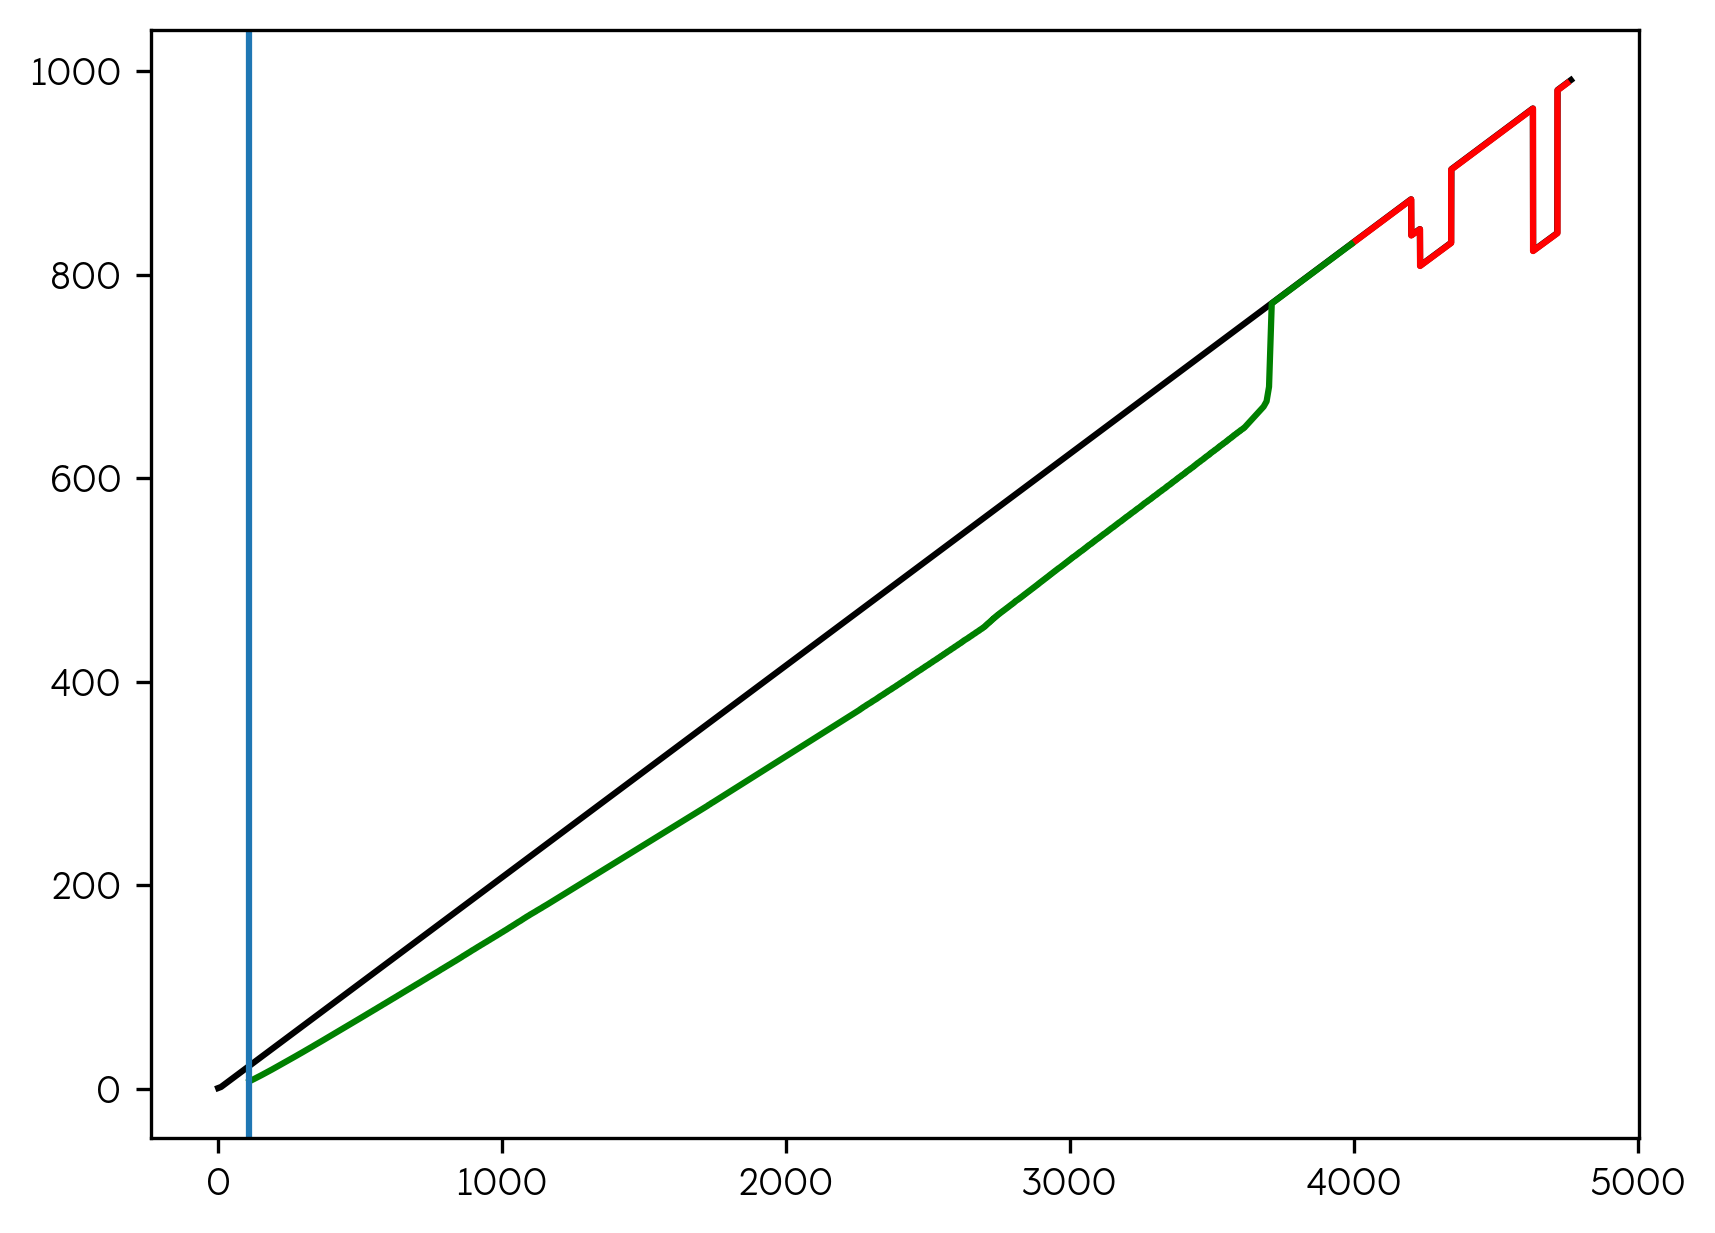

In [204]:
import json

# Read the JSON data from the file
file_path = '/workspaces/WINC_OnePager/notebooks/file.json'
with open(file_path, 'r') as file:
    data = json.load(file)

data.keys()

fig, ax = plt.subplots()

ax.plot(data['depthAxis'], data['shMin'], label='Shmin SG', color='black')
ax.plot(gudrun_shmin_exp['depth']-62.8, gudrun_shmin_exp['shmin_p'], label='Gudrun SHMIN EXP', color='red')
ax.plot(gudrun_shmin['depth']-62.8, gudrun_shmin['shmin_p'], label='Gudrun SHMIN EXP', color='green')

ax.axvline(x=171.8-62.8)

In [212]:
my_pressure2.init_curves

depth  temperature  hydrostatic_pressure  min_horizontal_stress
0        0.0         4.00              1.013250               1.013250
1        1.0         4.00              1.113848               1.113848
2        2.0         4.00              1.214446               1.214446
3        3.0         4.00              1.315045               1.315045
4        4.0         4.00              1.415644               1.415644
...      ...          ...                   ...                    ...
4801  4801.0       191.68            466.852961             998.132551
4802  4802.0       191.72            466.943462             998.340452
4803  4803.0       191.76            467.033959             998.548353
4804  4804.0       191.80            467.124452             998.756254
4805  4805.0       191.84            467.214940             998.964155

[4806 rows x 4 columns]

In [224]:
depth_list

0        110.401004
1        111.423999
2        112.478000
3        113.522006
4        114.565997
           ...     
2384    3742.602832
2385    3780.747119
2386    3863.167773
2387    3987.460986
2388    3991.460010
Name: depth, Length: 2389, dtype: float64

110.40100402832


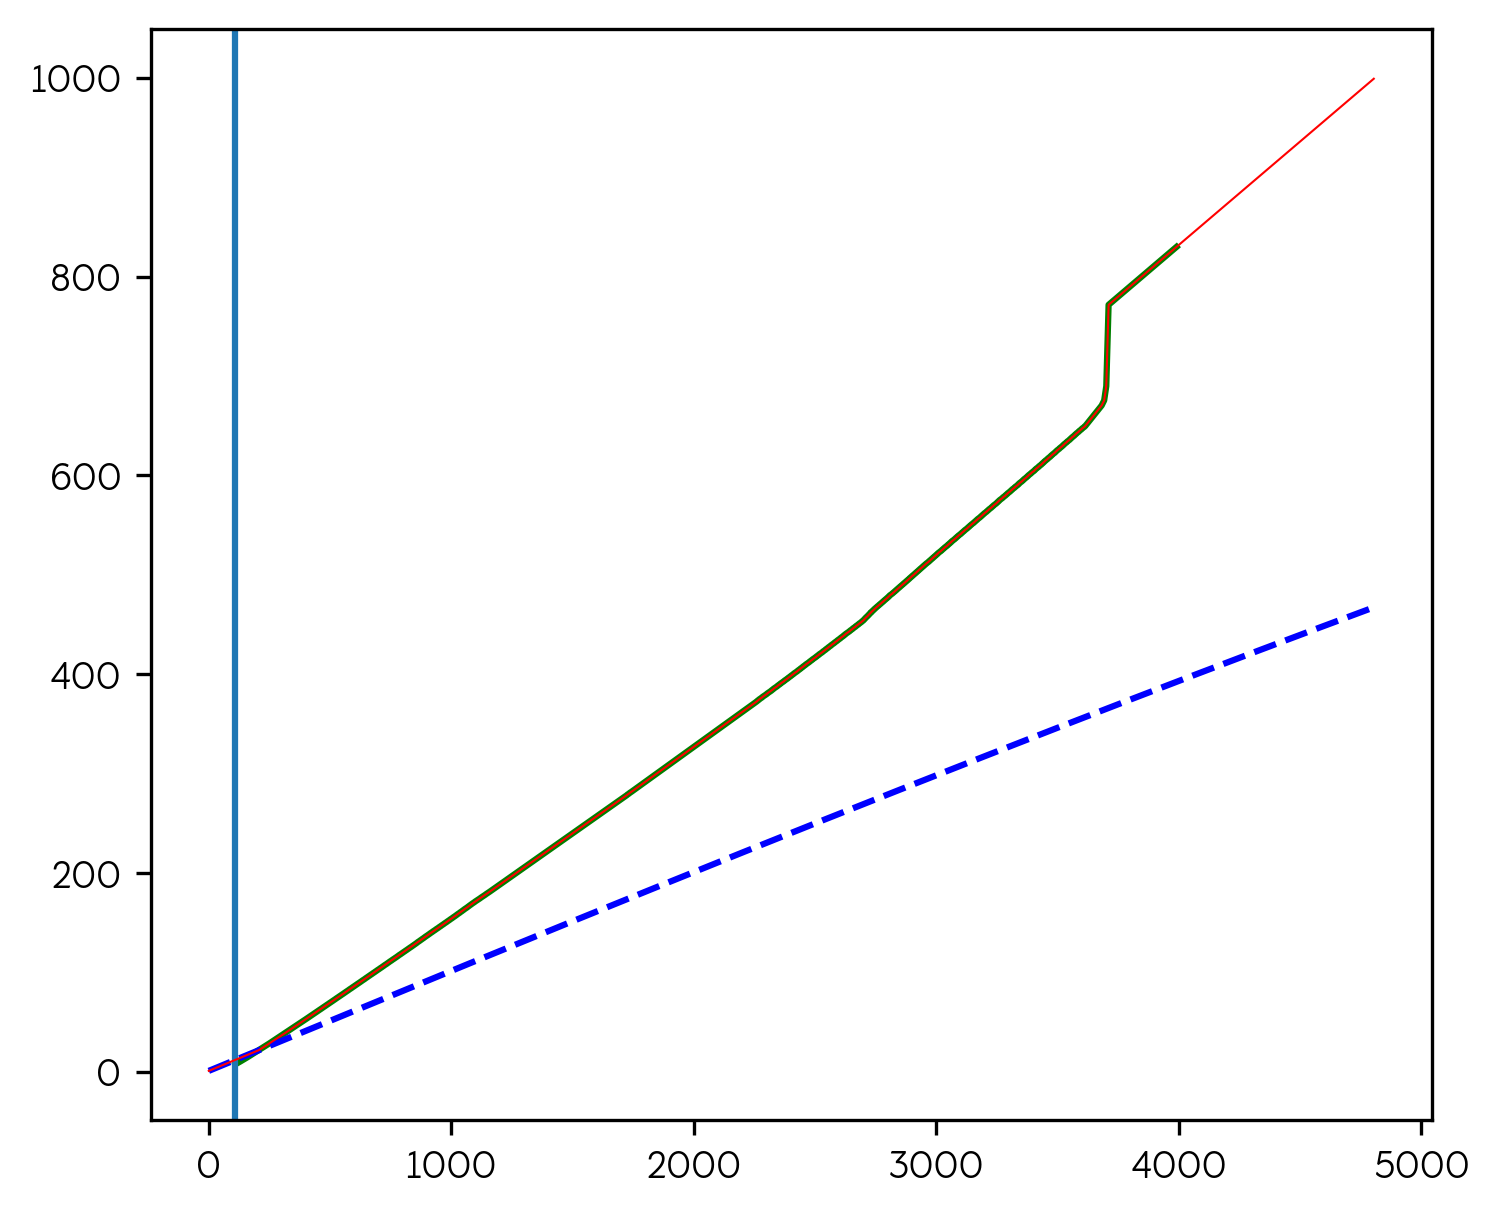

In [228]:
# Assuming depth_list and shmin_list are your lists of depth and Shmin values, respectively.
depth_list = gudrun_shmin['depth']-62.8  # Example depth values
shmin_list = gudrun_shmin['shmin_p']    # Corresponding Shmin values

ip_shmin_data = np.column_stack((depth_list, shmin_list))



my_pressure2 = Pressure(sf_depth_msl=171.8 - 62.8,
                       well_td_rkb=4369.2,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False,
                       ip_shmin_data = ip_shmin_data)


# my_pressure2.add_scenario('saline1', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 0)    
# my_pressure2.add_scenario('saline2', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 100)  
# my_pressure2.add_scenario('depleted', fluid_type='pure_co2', from_resrvr=True,  z_fluid_contact=3700, p_delta= -80)  



fig, ax = plt.subplots(1,1, figsize=(width, height))


# fig, ax = plt.subplots()

# ax.plot(data['depthAxis'], data['shMin'], label='Shmin SG', color='black')
# ax.plot(gudrun_shmin_exp['depth']-62.8, gudrun_shmin_exp['shmin_p'], label='Gudrun SHMIN EXP', color='red')
ax.plot(gudrun_shmin['depth']-62.8, gudrun_shmin['shmin_p'], label='Gudrun SHMIN EXP', color='green')
ax.plot(my_pressure2.init_curves['depth'], my_pressure2.init_curves['min_horizontal_stress'], label='IP Shmin', color='red', lw=0.5, zorder=100)
ax.plot(my_pressure2.init_curves['depth'], my_pressure2.init_curves['hydrostatic_pressure'], label='IP Shmin', color='blue', linestyle='--')

ax.axvline(x=171.8-62.8)


In [ ]:
my_pressure2.init_curves['min_horizontal_stress'] < my_pressure2.init_curves['min_horizontal_stress']

depth  temperature  hydrostatic_pressure  min_horizontal_stress
0        0.0         4.00              1.013250             343.564443
1        1.0         4.00              1.113848             340.522396
2        2.0         4.00              1.214446             337.480349
3        3.0         4.00              1.315045             334.438302
4        4.0         4.00              1.415644             331.396255
...      ...          ...                   ...                    ...
4801  4801.0       191.68            466.852961             998.132551
4802  4802.0       191.72            466.943462             998.340452
4803  4803.0       191.76            467.033959             998.548353
4804  4804.0       191.80            467.124452             998.756254
4805  4805.0       191.84            467.214940             998.964155

[4806 rows x 4 columns]

In [ ]:

plot_pressure(my_pressure2, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )

ax.axhline(y=171.8-62.8, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=4200)
ax.set_xlim(right=900)


In [163]:
my_pressure.init_curves.loc[3990]

depth                    3990.000000
temperature               159.240000
hydrostatic_pressure      392.209821
min_horizontal_stress     669.810815
Name: 3990, dtype: float64

saline1
saline2
depleted
saline1
saline2
depleted


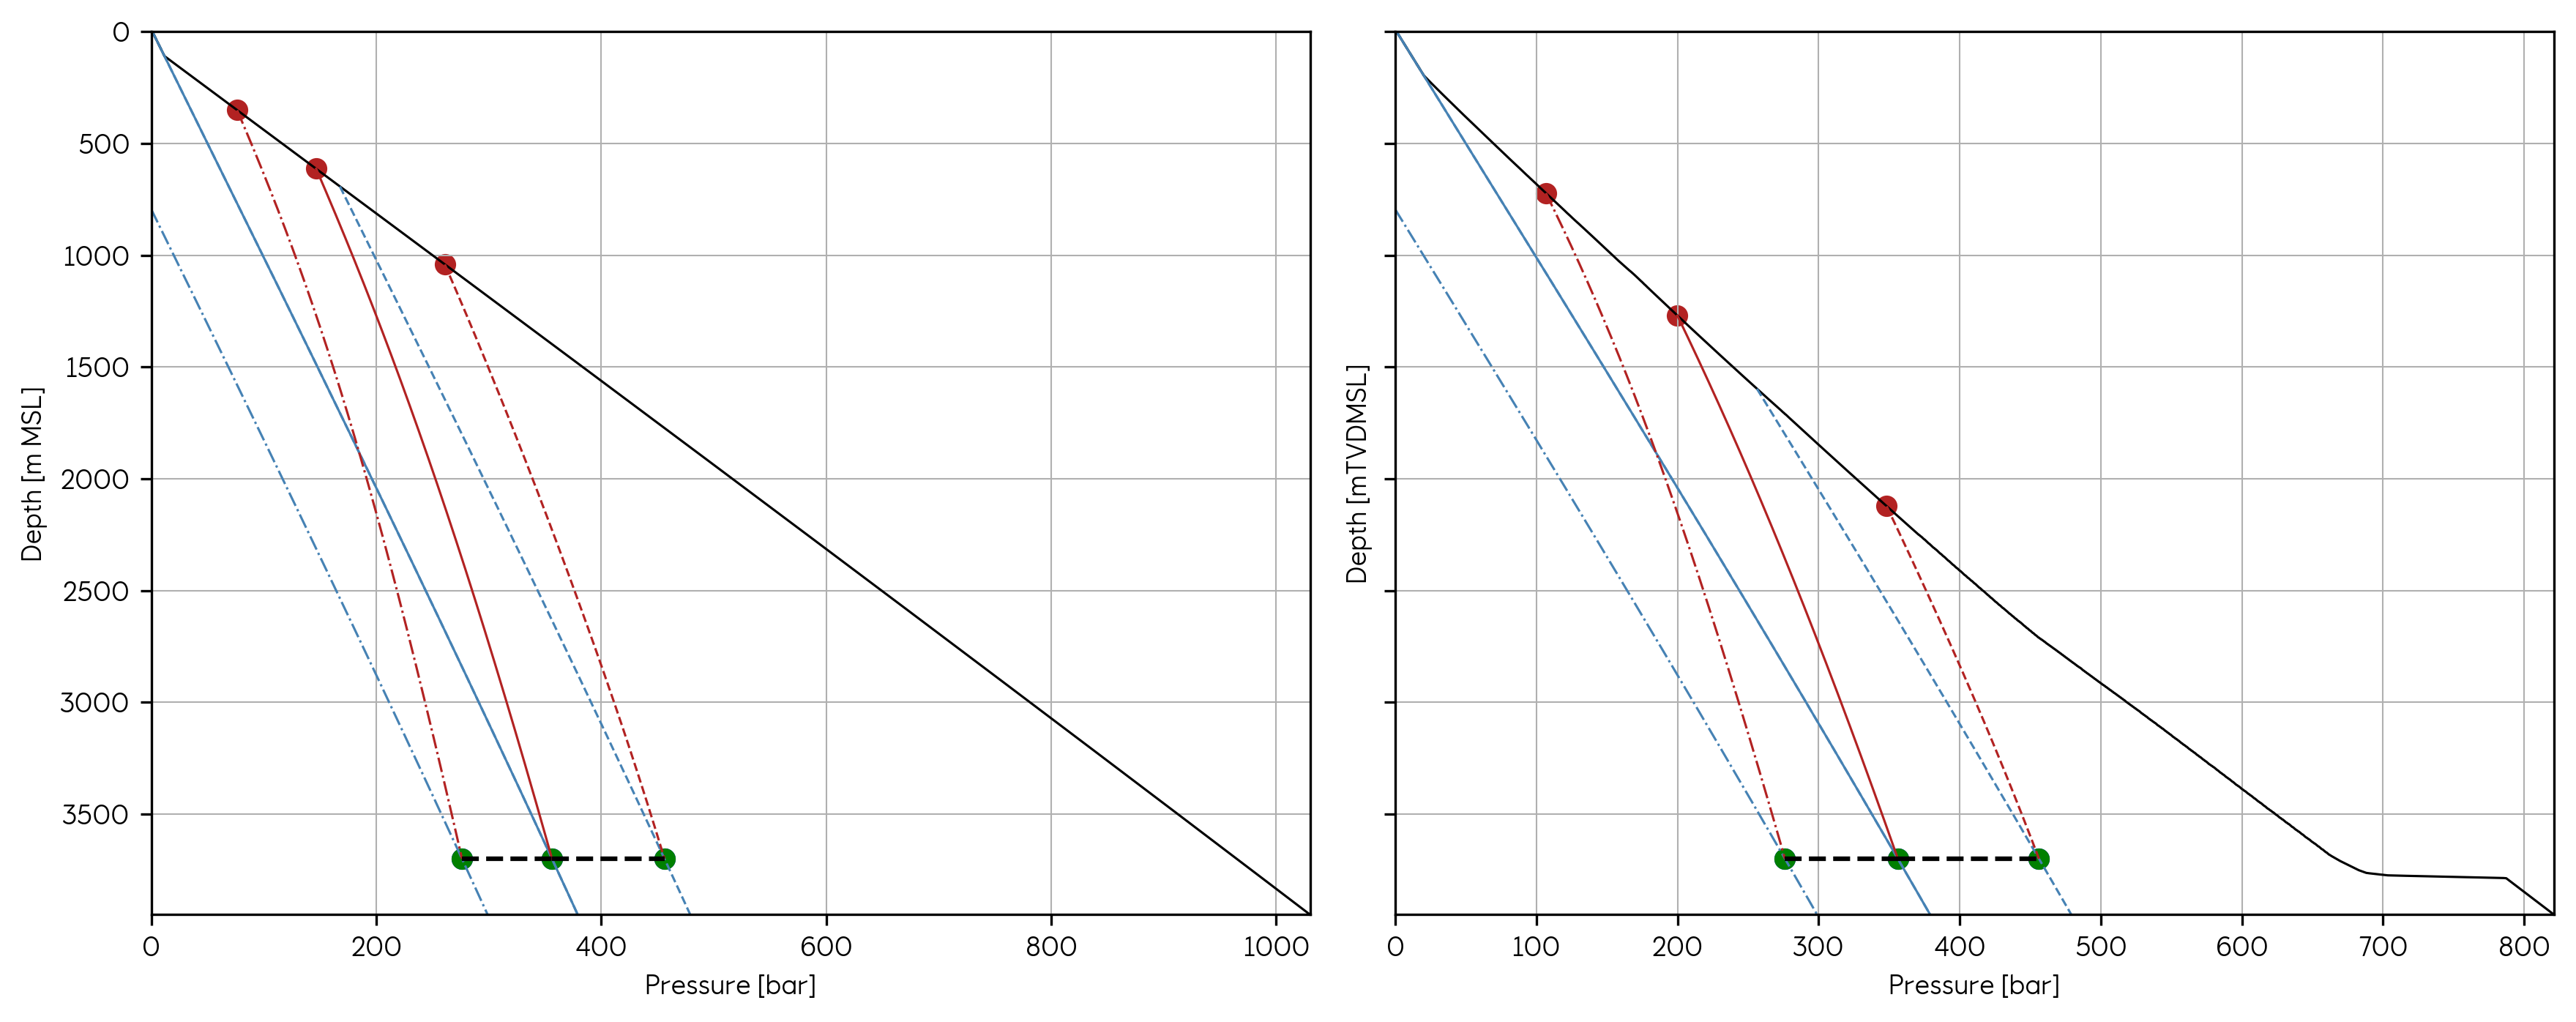

In [102]:
width_cm = 30 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(width, height), sharey=True)

plot_pressure(my_pressure, ax=ax1, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

plot_pressure(my_pressure2, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

ax1.set_ylabel('Depth [m MSL]')

fig.tight_layout()

T

To compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

### Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $P = \rho \cdot g \cdot h$ where:
- $P$ is the pressure in Pascals (Pa).
- $\rho$ is the density of the fluid (in kg/m³).
- $g$ is the acceleration due to gravity (9.81 m/s²).
- $h$ is the depth in meters (m).

### Calculate Density:

The density ($\rho$) can be derived from the specific gravity (SG) using the formula: $\rho = \text{SG} \cdot \rho_{\text{water}}$ where:
- $\rho_{\text{water}}$ is the density of water (approximately 1000 kg/m³).

### Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.

### Convert to Bars:

To convert Pascals to bars, use the conversion factor: $1 \text{ bar} = 100,000 \text{ Pa}$

### Here's a sample calculation:

Given:
- Depth ($h$) = 1000 meters
- Specific Gravity (SG) = 1.2

### Steps:

1. Calculate density: $\rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3$
2. Calculate pressure in Pascals: $P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa}$
3. Convert to bars: $P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars}$

You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!o compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $[ P = \rho \cdot g \cdot h ]$ where:
( $P$ ) is the pressure in Pascals (Pa).

( $\rho$ ) is the density of the fluid (in kg/m³).
( $g$ ) is the acceleration due to gravity (9.81 m/s²).
( h ) is the depth in meters (m).
Calculate Density:

The density (( \rho )) can be derived from the specific gravity (SG) using the formula: [ \rho = \text{SG} \cdot \rho_{\text{water}} ] where:
( \rho_{\text{water}} ) is the density of water (approximately 1000 kg/m³).
Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.
Convert to Bars:

To convert Pascals to bars, use the conversion factor: [ 1 \text{ bar} = 100,000 \text{ Pa} ]
Here's a sample calculation:

Given:

Depth (( h )) = 1000 meters
Specific Gravity (SG) = 1.2
Steps:

Calculate density: [ \rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3 ]
Calculate pressure in Pascals: [ P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa} ]
Convert to bars: [ P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars} ]
You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!